# Initialization

Importing relevant libraries and datas. Excel files that are used in this project are directly from "https://www.tuik.gov.tr/", Turkish Statistical Institute. Our main hypothesis is "Age has no significance on the likelihood of committing violent crimes amng adult people in Turkey.

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import warnings
import numpy as np

# Read the Excel file into a dataframe
xls = pd.ExcelFile('data.xls')
print(xls.sheet_names)


['1_t20']


# Data Preprocessing

Initial data is being cleaned and unnecessary, duplicate rows/columns are dropped. NAN values are cleared. Data got cleared for easy use in later applications.

In [ ]:
#DATA PREPROCESSING

# Load the specific sheet into a dataframe, skipping the first 5 rows
df = pd.read_excel('data.xls', sheet_name='1_t20', skiprows=5)

# Drop the "Unnamed-4" column, which is unnecessary (NaN values for the whole column)
df = df.drop("Unnamed: 4", axis=1)

# Define the column numbers to be dropped
columns_to_drop = [6, 9, 12, 15, 18, 21, 24, 27]

# Drop the columns
df = df.drop(df.columns[columns_to_drop], axis=1)

#First 4 rows are extra, they do not have any info so we drop them
df = df.iloc[4:]
# Rename the first column (actually the name of the table)
df = df.rename(columns={"Unnamed: 0": "Crime Types - Suç Türleri"})
#Remaining columns are also labeled incorrectly because of the formatting of the excel file, so we change the column labels to the true ones from the excel table
df = df.rename(columns={"Unnamed: 2": "Toplam: Erkek - Male"})
df = df.rename(columns={"Unnamed: 3": "Toplam: Kadın - Female"})

# Define the mapping dictionary for column renaming
mapping_dict = {}
for i in [5, 7, 9, 11, 13, 15, 17, 19, 21]:
    mapping_dict[df.columns[i]] = df.columns[i - 1] + " Kadın - Female"  
    mapping_dict[df.columns[i-1]] = df.columns[i - 1] + " Erkek - Male"

# Rename the columns
df = df.rename(columns=mapping_dict)

#Some rows represent the same thing (but they do not fit to one row, so they are in seperate rows e.g. Turkish-English versions of the same crime or a crime
# with a long definition) so we merge them into one row

# Drop the rows that are for the Turkish versions which have NaN values, or for continuation of the rows 
df = df.drop(8)
df = df.drop(14)
df = df.drop(15)
df = df.drop(17)
df = df.drop(18)
df = df.drop(27)
df = df.drop(28)
df = df.drop(30)
df = df.drop(31)
df = df.drop(33)
df = df.drop(34)
df = df.drop(38)
df = df.drop(40)

# Reset the row indexes
df = df.reset_index(drop=True)

# Keep only the rows up to the 26th row (get the data for only 2020)
df = df[:26]

#Setting the "Crime Types - Suç Türleri" column as the index of the dataframe"
df.set_index("Crime Types - Suç Türleri", inplace=True)



# Remove dash symbol and preceding characters from row names (for better visualization)
df.index = [row.split('-')[-1].strip() for row in df.index]

df.rename(index={"firearms and knifes"	: "Crimes related with firearms and knifes"}, inplace=True)
df.rename(index={"Enforcement Law"	: "Opposition to the Bankruptcy and Enforcement Law"}, inplace=True)
df.rename(index={"Criminal Law"	: "Opposition to the Military Criminal Law"}, inplace=True)

# Drop the rows that are not needed since we only need age data
df.drop(["Bilinmeyen - Unknown Erkek - Male"], axis=1, inplace=True)
df.drop(["Bilinmeyen - Unknown Kadın - Female"], axis=1, inplace=True)

# Changing - with 0 since it indicates no crime for that age group
df.replace('-', 0, inplace=True)


df.head()



,Toplam - Total,Toplam: Erkek - Male,Toplam: Kadın - Female,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Total,258401,247883,10518,1528,74,8374,258,61782,2443,83871,3645,56812,2576,26091,1114,7960,334,1446,73
Homicide,6080,5916,164,32,1,320,2,1580,44,1817,56,1203,38,619,18,272,3,71,2
Assault,40445,39413,1032,19,0,329,11,9105,191,15037,388,9413,285,4087,114,1197,38,223,5
Sexual crimes,4890,4861,29,174,1,393,4,1073,6,1273,7,952,7,618,4,289,0,88,0
Kidnapping,4749,4580,169,69,0,281,8,1481,39,1583,59,769,34,295,21,76,8,26,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, Total to Other crimes
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Toplam - Total          26 non-null     int64
 1   Toplam: Erkek - Male    26 non-null     int64
 2   Toplam: Kadın - Female  26 non-null     int64
 3   12 - 14 Erkek - Male    26 non-null     int64
 4   12 - 14 Kadın - Female  26 non-null     int64
 5   15 - 17 Erkek - Male    26 non-null     int64
 6   15 - 17 Kadın - Female  26 non-null     int64
 7   18 - 24 Erkek - Male    26 non-null     int64
 8   18 - 24 Kadın - Female  26 non-null     int64
 9   25 - 34 Erkek - Male    26 non-null     int64
 10  25 - 34 Kadın - Female  26 non-null     int64
 11  35 - 44 Erkek - Male    26 non-null     int64
 12  35 - 44 Kadın - Female  26 non-null     int64
 13  45 - 54 Erkek - Male    26 non-null     int64
 14  45 - 54 Kadın - Female  26 non-null     int64
 15  55 - 64 Erkek - 

In [ ]:
# Drop the first three columns since they represent total values
df_age_gender = df.drop(df.columns[:3], axis=1)

df_age_gender.head()

,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Total,1528,74,8374,258,61782,2443,83871,3645,56812,2576,26091,1114,7960,334,1446,73
Homicide,32,1,320,2,1580,44,1817,56,1203,38,619,18,272,3,71,2
Assault,19,0,329,11,9105,191,15037,388,9413,285,4087,114,1197,38,223,5
Sexual crimes,174,1,393,4,1073,6,1273,7,952,7,618,4,289,0,88,0
Kidnapping,69,0,281,8,1481,39,1583,59,769,34,295,21,76,8,26,0


In [ ]:
# Drop all rows except the first one
df_only_total_age_gender = df_age_gender.drop(df.index[1:])

# Print the updated DataFrame
df_only_total_age_gender.head()


,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Total,1528,74,8374,258,61782,2443,83871,3645,56812,2576,26091,1114,7960,334,1446,73


In [ ]:
def table_by_year(num , space): 
  df_year = pd.read_excel('data.xls', sheet_name='1_t20', skiprows=space)
  
  df_year.columns
  df_year.dropna(axis=1,how='all', inplace=True)
  # df_year.dropna(axis=0,how='all', inplace=True)
  # Define the column numbers to be dropped (extra lines including NaN values)
  
  df_year = df_year.drop(4)
  df_year = df_year.drop(10)
  df_year = df_year.drop(11)
  df_year = df_year.drop(13)
  df_year = df_year.drop(14)
  df_year = df_year.drop(23)
  df_year = df_year.drop(24)
  df_year = df_year.drop(26)
  df_year = df_year.drop(27)
  df_year = df_year.drop(29)
  df_year = df_year.drop(30)
  df_year = df_year.drop(34)
  df_year = df_year.drop(36)

  # Reset the row indexes
  df_year = df_year.reset_index(drop=True)
  # Keep only the rows up to the 26th row (get the data for only the corresponding year)
  df_year = df_year[:26]

  # Set the dataframes indices as crime types
  df_year.set_index(num, inplace=True)
  
  

  # Remove dash symbol and preceding characters from row names (for better visualization)
  df_year.index = [row.split('-')[-1].strip() for row in df_year.index]

  df_year.rename(index={"firearms and knifes"	: "Crimes related with firearms and knifes"}, inplace=True)
  df_year.rename(index={"Enforcement Law"	: "Opposition to the Bankruptcy and Enforcement Law"}, inplace=True)
  df_year.rename(index={"Criminal Law"	: "Opposition to the Military Criminal Law"}, inplace=True)
  
  # Drop total crime columns (first 2)
  df_year.drop(columns=df_year.columns[-2:], axis=0, inplace=True)
  
  # Drop unknown age columns (last 3)
  df_year.drop(columns=df_year.columns[:3], axis=0, inplace=True)
  
  # Getting the row labels from 2020 data
  df_year.columns = df.iloc[:,3:].columns.tolist()
  
  # Changing - with 0 since it indicates no crime for that age group
  df_year.replace('-', 0, inplace=True)
  
  return df_year



In [ ]:
#Getting the excel tables into dataframes for all years
df2020 = df.drop(columns=df.columns[:3], axis=0)
df2019 =  table_by_year(2019, 51 )
df2018 =  table_by_year(2018, 93 )
df2017 =  table_by_year(2017, 135 )
df2016 =  table_by_year(2016, 176 )
df2015 =  table_by_year(2015, 217 )
df2014 =  table_by_year(2014, 258 )
df2013 =  table_by_year(2013, 299 )

df2019.head()

,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Total,1997,71,10647,300,69629.0,2768,90591.0,3771,60174.0,2733,27568.0,1248,8169,384,1458,68
Homicide,62,4,608,11,2689.0,75,3129.0,71,1616.0,45,821.0,22,339,5,74,2
Assault,46,2,413,2,7958.0,184,12123.0,358,8351.0,250,3745.0,117,1123,32,184,8
Sexual crimes,245,0,624,6,1325.0,3,1520.0,13,1059.0,12,575.0,4,296,2,110,2
Kidnapping,29,0,128,6,999.0,25,1108.0,32,493.0,34,207.0,16,65,5,26,0


In [ ]:

# Create separate datasets for male and female
df_male = df_only_total_age_gender.iloc[:, 0::2]  # Select columns at even positions (0, 2, 4, ...)
df_female = df_only_total_age_gender.iloc[:, 1::2]  # Select columns at odd positions (1, 3, 5, ...)

# Transpose the DataFrame
df_female_transposed = df_female.T
df_male_transposed = df_male.T

#Cast to numerical values since object type cannot be used in violin graph
df_female_transposed['Total'] = df_female_transposed['Total'].astype(int)
df_male_transposed['Total'] = df_male_transposed['Total'].astype(int)



# Descriptive Statistics of the Initial Data

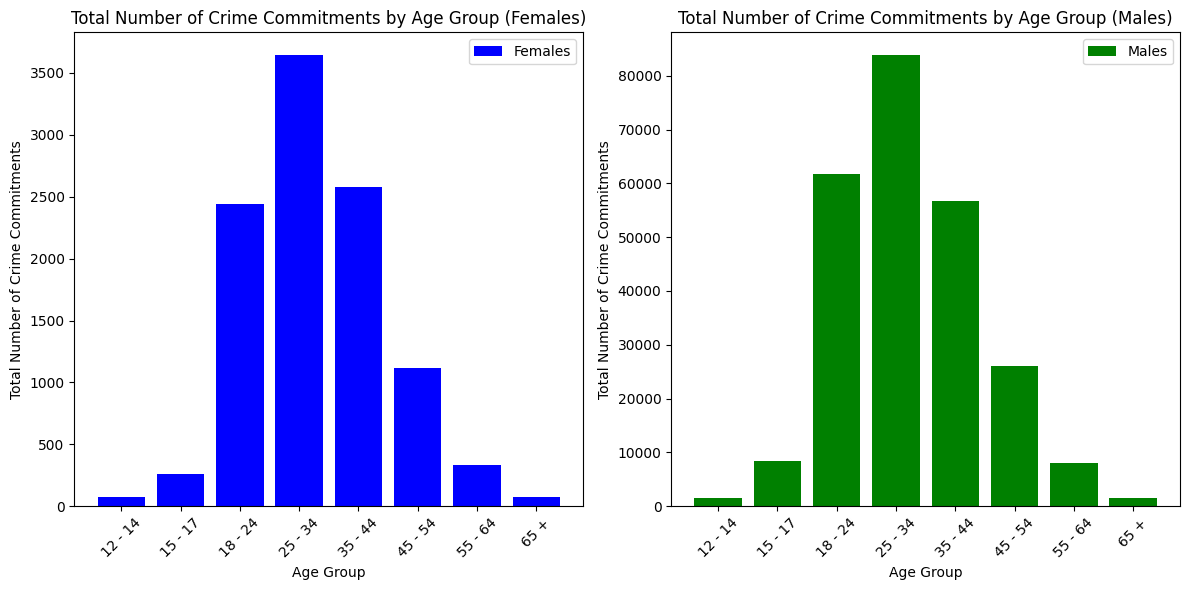

In [ ]:


# Assuming you have the data in DataFrames named 'df_female_transposed' and 'df_male_transposed'

# Extract the age groups and total number of crime commitments for females and males
#Because this increases the readibility of the graph
age_groups_female = df_female_transposed.index.str.replace(' Kadın - Female', '')
totals_female = df_female_transposed['Total']

age_groups_male = df_male_transposed.index.str.replace(' Erkek - Male', '')
totals_male = df_male_transposed['Total']

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot for females
plt.subplot(1, 2, 1)
plt.bar(age_groups_female, totals_female, label='Females', color='blue')
plt.title('Total Number of Crime Commitments by Age Group (Females)')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Crime Commitments')
plt.xticks(rotation=45)
plt.legend()

# Plot for males
plt.subplot(1, 2, 2)
plt.bar(age_groups_male, totals_male, label='Males', color='green')
plt.title('Total Number of Crime Commitments by Age Group (Males)')
plt.xlabel('Age Group')
plt.ylabel('Total Number of Crime Commitments')
plt.xticks(rotation=45)
plt.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:
#SECOND DATAFRAME: EDUCATION
# Read the Excel file into a dataframe
xls = pd.ExcelFile('education_level_crime_commitment.xls')
print(xls.sheet_names)

['1_t21']


In [ ]:
#First 5 rows are irrelevant
df_education = pd.read_excel('education_level_crime_commitment.xls', sheet_name='1_t21', skiprows=11)

# Drop rows and columns with NaN values in all cells
df_education = df_education.dropna(how='all')
df_education = df_education.dropna(axis=1, how='all')

df_education.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Okuma,Unnamed: 6,Literate but,Unnamed: 9,Unnamed: 11,Unnamed: 12,Unnamed: 14,Unnamed: 15,high school,Unnamed: 18,High school,Unnamed: 21,Yüksek,Unnamed: 24,Unnamed: 26,Unnamed: 27
0,NaN,NaN,NaN,NaN,yazma,NaN,not graduated,NaN,İlkokul,NaN,İlköğretim,NaN,and vocational,NaN,and vocational,NaN,öğretim,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,bilmeyen,NaN,from a,NaN,Primary,NaN,Primary,NaN,school at junior,NaN,school at high,NaN,Higher,NaN,Bilinmeyen,NaN
2,NaN,Toplam - Total,NaN,NaN,Illiterate,NaN,school,NaN,school,NaN,education,NaN,high school level,NaN,school level,NaN,education,NaN,Unknown,NaN
3,Suç türü,Toplam,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın,Erkek,Kadın
4,Type of crime,Total,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female


In [ ]:
# Merge rows 0, 1, and 2 into a single row and assign it to the "index" column for all columns
df_education.iloc[0:6] = df_education.iloc[0:6].apply(lambda x: ' '.join(x.dropna().astype(str)))
df_education.columns = df_education.iloc[0]

# Remove the merged rows
df_education = df_education.iloc[6:]




df_education.head(3)

,Suç türü Type of crime 2020,Toplam - Total Toplam Total,Erkek Male,Kadın Female,yazma bilmeyen Illiterate Erkek Male,Kadın Female,not graduated from a school Erkek Male,Kadın Female,İlkokul Primary school Erkek Male,Kadın Female,İlköğretim Primary education Erkek Male,Kadın Female,and vocational school at junior high school level Erkek Male,Kadın Female,and vocational school at high school level Erkek Male,Kadın Female,öğretim Higher education Erkek Male,Kadın Female,Bilinmeyen Unknown Erkek Male,Kadın Female
8,Toplam - Total,258401,247883,10518,1288,367,7774,893,33592,1796,44973,1324,78629,2412,60492,2241,18972,1361,2163,124
9,Öldürme - Homicide,6080,5916,164,30,1,121,4,867,29,893,10,1715,35,1724,51,481,28,85,6
10,Yaralama - Assault,40445,39413,1032,161,28,1031,54,5644,196,8485,171,11834,276,10266,232,1800,68,192,7


In [ ]:
df_education.set_index('Suç türü Type of crime 2020', inplace=True)

df_education.head(10)

,Toplam - Total Toplam Total,Erkek Male,Kadın Female,yazma bilmeyen Illiterate Erkek Male,Kadın Female,not graduated from a school Erkek Male,Kadın Female,İlkokul Primary school Erkek Male,Kadın Female,İlköğretim Primary education Erkek Male,Kadın Female,and vocational school at junior high school level Erkek Male,Kadın Female,and vocational school at high school level Erkek Male,Kadın Female,öğretim Higher education Erkek Male,Kadın Female,Bilinmeyen Unknown Erkek Male,Kadın Female
Suç türü Type of crime 2020,,,,,,,,,,,,,,,,,,,
Toplam - Total,258401,247883,10518,1288,367,7774,893,33592,1796,44973,1324,78629,2412,60492,2241,18972,1361,2163,124
Öldürme - Homicide,6080,5916,164,30,1,121,4,867,29,893,10,1715,35,1724,51,481,28,85,6
Yaralama - Assault,40445,39413,1032,161,28,1031,54,5644,196,8485,171,11834,276,10266,232,1800,68,192,7
Cinsel suçlar - Sexual crimes,4890,4861,29,38,-,105,5,683,9,924,3,1544,6,1182,3,351,2,34,1
Kişiyi hürriyetinden yoksun kılma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidnapping,4749,4580,169,34,9,102,5,588,39,826,27,1446,32,1237,47,273,9,74,1
Hakaret - Defamation,4334,4112,222,8,3,80,12,640,34,857,32,1052,55,1183,65,261,21,31,-
Hırsızlık - Theft,39279,36673,2606,238,180,2163,456,3950,479,6525,372,17157,663,5770,357,621,76,249,23
Yağma(Gasp) - Robbery,7349,7087,262,59,7,318,35,799,45,1082,18,3087,75,1432,66,189,13,121,3


In [ ]:
# Drop rows with NaN values in all cells
df_education.dropna(axis=0, how='all', inplace=True)

# Replace "-" values with 0
df_education.replace('-', 0, inplace=True)

df_education.head()

,Toplam - Total Toplam Total,Erkek Male,Kadın Female,yazma bilmeyen Illiterate Erkek Male,Kadın Female,not graduated from a school Erkek Male,Kadın Female,İlkokul Primary school Erkek Male,Kadın Female,İlköğretim Primary education Erkek Male,Kadın Female,and vocational school at junior high school level Erkek Male,Kadın Female,and vocational school at high school level Erkek Male,Kadın Female,öğretim Higher education Erkek Male,Kadın Female,Bilinmeyen Unknown Erkek Male,Kadın Female
Suç türü Type of crime 2020,,,,,,,,,,,,,,,,,,,
Toplam - Total,258401,247883,10518,1288.0,367,7774,893,33592,1796,44973,1324,78629,2412,60492,2241,18972,1361,2163,124
Öldürme - Homicide,6080,5916,164,30.0,1,121,4,867,29,893,10,1715,35,1724,51,481,28,85,6
Yaralama - Assault,40445,39413,1032,161.0,28,1031,54,5644,196,8485,171,11834,276,10266,232,1800,68,192,7
Cinsel suçlar - Sexual crimes,4890,4861,29,38.0,0,105,5,683,9,924,3,1544,6,1182,3,351,2,34,1
Kidnapping,4749,4580,169,34.0,9,102,5,588,39,826,27,1446,32,1237,47,273,9,74,1


In [ ]:

new_column_names = ['Total','Total Male','Total Female','Illiterate Male','Illiterate Female','Literate but not graduated Male','Literate but not graduated Female','Primary School Male',
                    'Primary School Female','Primary Education Male','Primary Education Female','Junior highschool Level Male','Junior highschool Level Female',
                    'Highschool Level Male','Highschool Level Female','Higher Education Male','Higher Education Female','Unknown Male','Unknown MFemale']
with warnings.catch_warnings():
    # This will ignore all warning messages
    warnings.simplefilter("ignore")
    # Loop over the crime types
    def rename_columns(df, new_column_names):
        # Check if the number of new column names matches the number of columns in the DataFrame
        if len(new_column_names) != len(df.columns):
            raise ValueError("Number of new column names does not match the number of columns in the DataFrame.")
        
        # Rename the columns using the new column names
        df.columns = new_column_names
        
        return df

    # Example usage
    df_education_renamed = rename_columns(df_education, new_column_names)

    df_education_renamed.rename(index={"firearms and knifes"	: "Crimes related with firearms and knifes"}, inplace=True)
    df_education_renamed.rename(index={"Enforcement Law"	: "Opposition to the Bankruptcy and Enforcement Law"}, inplace=True)
    df_education_renamed.rename(index={"Criminal Law"	: "Opposition to the Military Criminal Law"}, inplace=True)

    # Iterate over the index values
    for i, index_value in enumerate(df_education_renamed.index):
        # Split the index value by the hyphen and get the last part
        new_index_value = index_value.split("-")[-1].strip()
        
        # Update the index value in the DataFrame
        df_education_renamed.rename(index={index_value: new_index_value}, inplace=True)

df_education_renamed.head()

,Total,Total Male,Total Female,Illiterate Male,Illiterate Female,Literate but not graduated Male,Literate but not graduated Female,Primary School Male,Primary School Female,Primary Education Male,Primary Education Female,Junior highschool Level Male,Junior highschool Level Female,Highschool Level Male,Highschool Level Female,Higher Education Male,Higher Education Female,Unknown Male,Unknown MFemale
Suç türü Type of crime 2020,,,,,,,,,,,,,,,,,,,
Total,258401,247883,10518,1288.0,367,7774,893,33592,1796,44973,1324,78629,2412,60492,2241,18972,1361,2163,124
Homicide,6080,5916,164,30.0,1,121,4,867,29,893,10,1715,35,1724,51,481,28,85,6
Assault,40445,39413,1032,161.0,28,1031,54,5644,196,8485,171,11834,276,10266,232,1800,68,192,7
Sexual crimes,4890,4861,29,38.0,0,105,5,683,9,924,3,1544,6,1182,3,351,2,34,1
Kidnapping,4749,4580,169,34.0,9,102,5,588,39,826,27,1446,32,1237,47,273,9,74,1


In [ ]:
# Retrieve the names of the indexes
index_names = df_education_renamed.index.tolist()

# Check for indexes named "Unknown"
unknown_indexes = [index for index in index_names if index == "Unknown"]

# Drop rows with "Unknown" index
df_education_renamed = df_education_renamed.drop(unknown_indexes)

# Change the index header value to "Crime Type"
df_education_renamed.index.name = "Crime Type"


# Drop the last two columns from the DataFrame (Unknown info is not needed)
df_education_renamed = df_education_renamed.drop(df_education_renamed.columns[-2:], axis=1)

df_education_renamed.head()

,Total,Total Male,Total Female,Illiterate Male,Illiterate Female,Literate but not graduated Male,Literate but not graduated Female,Primary School Male,Primary School Female,Primary Education Male,Primary Education Female,Junior highschool Level Male,Junior highschool Level Female,Highschool Level Male,Highschool Level Female,Higher Education Male,Higher Education Female
Crime Type,,,,,,,,,,,,,,,,,
Total,258401,247883,10518,1288.0,367,7774,893,33592,1796,44973,1324,78629,2412,60492,2241,18972,1361
Homicide,6080,5916,164,30.0,1,121,4,867,29,893,10,1715,35,1724,51,481,28
Assault,40445,39413,1032,161.0,28,1031,54,5644,196,8485,171,11834,276,10266,232,1800,68
Sexual crimes,4890,4861,29,38.0,0,105,5,683,9,924,3,1544,6,1182,3,351,2
Kidnapping,4749,4580,169,34.0,9,102,5,588,39,826,27,1446,32,1237,47,273,9


In [ ]:
count = 0  # Counter variable

# Iterate over the index and its corresponding number
for i, index_value in enumerate(df_education_renamed.index):
    # Check if the index value is "Total"
    if index_value == "Total":
        print("Index number of 'Total':", i)
        count += 1  # Increment the counter

    if count == 9: #Because we want to get data for years 2013...2020
        break  # Break the loop when count reaches 8


Index number of 'Total': 0
Index number of 'Total': 26
Index number of 'Total': 52
Index number of 'Total': 78
Index number of 'Total': 104
Index number of 'Total': 130
Index number of 'Total': 156
Index number of 'Total': 182
Index number of 'Total': 208


In [ ]:
#Depending on the last cell's output, we get the smaller chunks of dataframes for years from 2013 to 2020


df_education_2020 = df_education_renamed[0:26]
df_education_2019 = df_education_renamed[26:52]
df_education_2018 = df_education_renamed[52:78]
df_education_2017 = df_education_renamed[78:104]
df_education_2016 = df_education_renamed[104:130]
df_education_2015 = df_education_renamed[130:156]
df_education_2014 = df_education_renamed[156:182]
df_education_2013 = df_education_renamed[182:208]

#TESTING ONE YEAR
df_education_2017.head()

,Total,Total Male,Total Female,Illiterate Male,Illiterate Female,Literate but not graduated Male,Literate but not graduated Female,Primary School Male,Primary School Female,Primary Education Male,Primary Education Female,Junior highschool Level Male,Junior highschool Level Female,Highschool Level Male,Highschool Level Female,Higher Education Male,Higher Education Female
Crime Type,,,,,,,,,,,,,,,,,
Total,215761,207475,8286,1223.0,356,10918,1080,39784,1971,76155,2007,24237,724,44057,1451,9293,564
Homicide,8048,7887,161,32.0,0,273,10,1524,24,2347,37,1062,24,2207,43,374,23
Assault,26539,25872,667,145.0,27,964,56,5059,191,9643,190,3105,70,5753,101,1082,28
Sexual crimes,5176,5123,53,37.0,2,188,2,948,27,2014,10,586,4,1055,6,260,2
Kidnapping,2944,2834,110,13.0,10,83,10,504,27,1020,27,357,11,686,18,130,7


In [ ]:
df_education_2020_total_only = df_education_2020.drop(df_education_2020.index[1:])

In [ ]:
df_education_2020_total_only = df_education_2020_total_only.iloc[:, 3:]
df_education_2020_total_only.head()

,Illiterate Male,Illiterate Female,Literate but not graduated Male,Literate but not graduated Female,Primary School Male,Primary School Female,Primary Education Male,Primary Education Female,Junior highschool Level Male,Junior highschool Level Female,Highschool Level Male,Highschool Level Female,Higher Education Male,Higher Education Female
Crime Type,,,,,,,,,,,,,,
Total,1288.0,367,7774,893,33592,1796,44973,1324,78629,2412,60492,2241,18972,1361


In [ ]:
#for combining info
def combine_gender_edu(df_age_gender):
    df_return = df_age_gender.copy()
    age_ranges = ['Illiterate', 'Illiterate',
       'Literate but not graduated', 'Literate but not graduated',
       'Primary School', 'Primary School',
       'Primary Education', 'Primary Education',
       'Junior highschool Level', 'Junior highschool Level',
       'Highschool Level', 'Highschool Level',
       'Higher Education', 'Higher Education']
    
    for age in age_ranges:
        male_column = f'{age} Male'
        female_column = f'{age} Female'
        
        if male_column in df_return.columns and female_column in df_return.columns:
            df_return[age] = df_return[male_column] + df_return[female_column]
            df_return.drop([male_column, female_column], axis=1, inplace=True)

    return df_return

In [ ]:
df_education_2020_total_only = combine_gender_edu(df_education_2020_total_only)
df_education_2020_total_only.head()

,Illiterate,Literate but not graduated,Primary School,Primary Education,Junior highschool Level,Highschool Level,Higher Education
Crime Type,,,,,,,
Total,1655.0,8667,35388,46297,81041,62733,20333


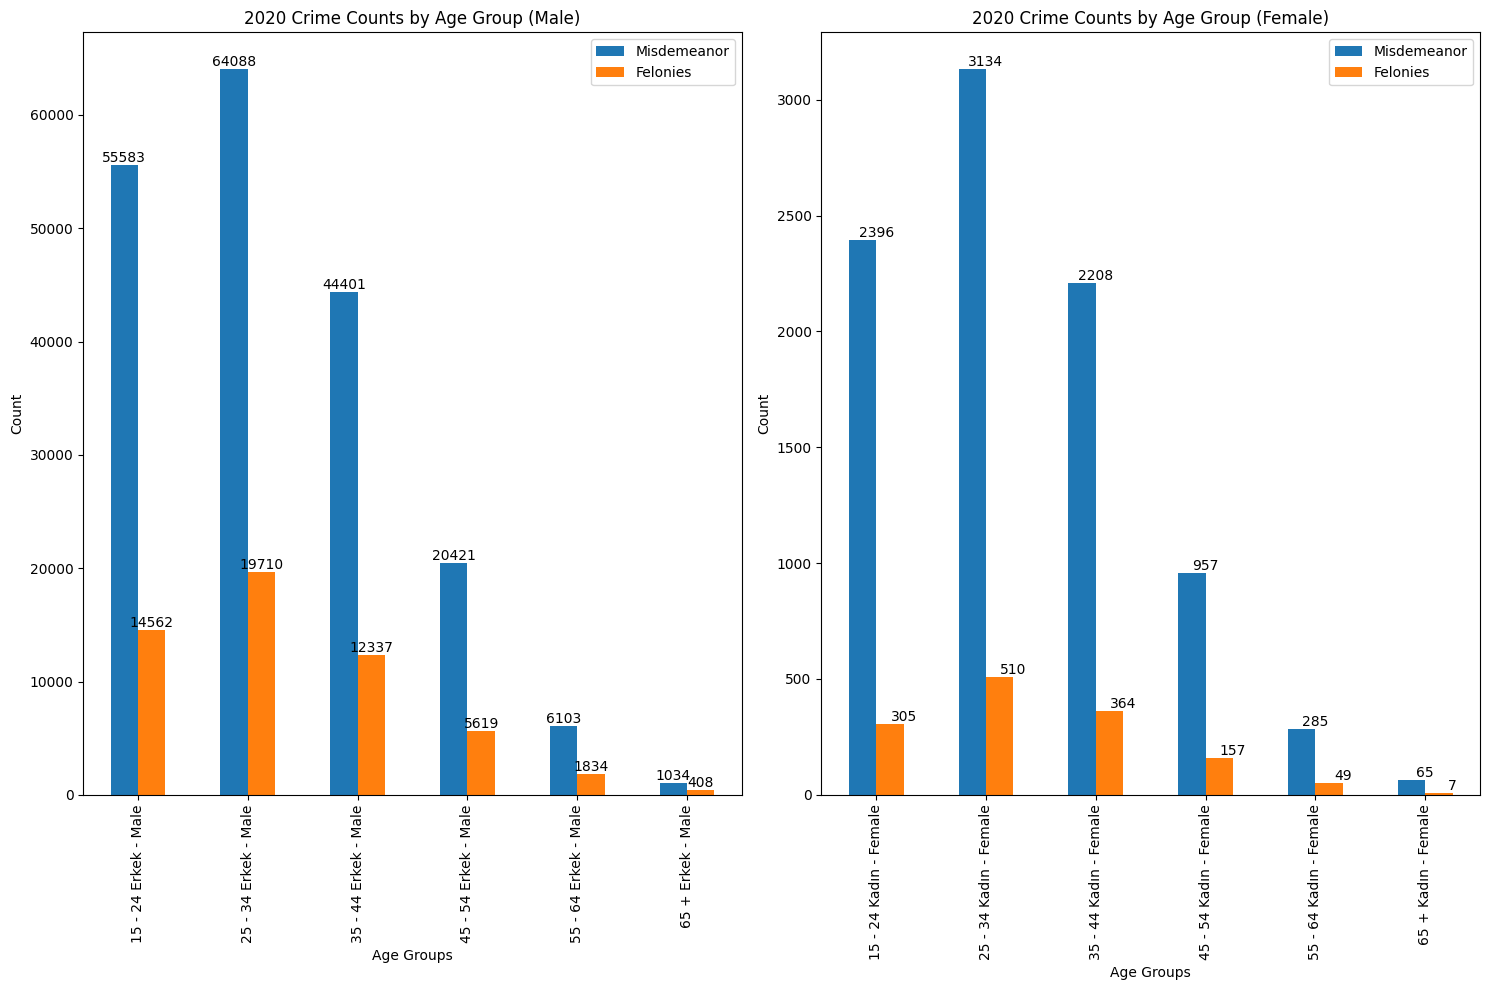

In [ ]:
import matplotlib.pyplot as plt

df_copy = df_age_gender
df_copy = df_copy.drop(df_copy.columns[[0, 1]], axis=1)
df_copy.loc['Felonies'] = df_copy.iloc[1:5, :].sum()
df_copy.loc['Misdemeanor'] = df_copy.iloc[5:26, :].sum()

new_df = df_copy.loc[['Misdemeanor', 'Felonies']]

# Add third column to the first column
new_df.iloc[:, 0] = new_df.iloc[:, 0] + new_df.iloc[:, 2]
# Rename the first column
new_df.rename(columns={new_df.columns[0]: '15 - 24 Erkek - Male'}, inplace=True)
# Add fourth column to the second column
new_df.iloc[:, 1] = new_df.iloc[:, 1] + new_df.iloc[:, 3]
# Rename the second column
new_df.rename(columns={new_df.columns[1]: '15 - 24 Kadın - Female'}, inplace=True)
# Remove the fourth and second columns
#new_df = new_df.drop(new_df.columns[[1, 3]], axis=1)
new_df = new_df.drop(new_df.columns[3], axis=1)
new_df = new_df.drop(new_df.columns[2], axis=1)

# Get Male
SUC1 = new_df.iloc[:, 0::2]

# Transpose the DataFrame
SUC1 = SUC1.T

# Plotting a bar graph
ax1 = plt.subplot(1, 2, 1)
SUC1.plot.bar(ax=ax1)

# Set the labels and title
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("2020 Crime Counts by Age Group (Male)")

# Add data labels to the bars
for p in ax1.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax1.annotate(f"{y}", (x, y), ha='center', va='bottom')

# Adjust the size of the plot
plt.rcParams["figure.figsize"] = (15, 10)

# Code 2

# Get Female
SUC2 = new_df.iloc[:, 1::2]

# Transpose the DataFrame
SUC2 = SUC2.T

# Plotting a bar graph
ax2 = plt.subplot(1, 2, 2)
SUC2.plot.bar(ax=ax2)

# Set the labels and title
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.title("2020 Crime Counts by Age Group (Female)")

# Add data labels to the bars
for p in ax2.patches:
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax2.annotate(f"{y}", (x, y), ha='center', va='bottom')

# Adjust the size of the plot
plt.rcParams["figure.figsize"] = (15, 10)

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
def combine_gender_cols(df_age_gender):
    df_return = df_age_gender.copy()
    age_ranges = ['12 - 14', '15 - 17', '18 - 24', '25 - 34', '35 - 44', '45 - 54', '55 - 64', '65 +']
    
    for age in age_ranges:
        male_column = f'{age} Erkek - Male'
        female_column = f'{age} Kadın - Female'
        
        if male_column in df_return.columns and female_column in df_return.columns:
            df_return[age] = df_return[male_column] + df_return[female_column]
            df_return.drop([male_column, female_column], axis=1, inplace=True)

    return df_return


df_age = combine_gender_cols(df_age_gender)
# Drop all rows except the first one
df_without_total_age_gender = df_age_gender.drop(df.index[:1])

# Print the updated DataFrame
df_age.head()



,12 - 14,15 - 17,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 +
Total,1602,8632,64225,87516,59388,27205,8294,1519
Homicide,33,322,1624,1873,1241,637,275,73
Assault,19,340,9296,15425,9698,4201,1235,228
Sexual crimes,175,397,1079,1280,959,622,289,88
Kidnapping,69,289,1520,1642,803,316,84,26


In [ ]:
df_age_for_heatmap = df_age.copy()
df_age_for_heatmap.head()

,12 - 14,15 - 17,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 +
Total,1602,8632,64225,87516,59388,27205,8294,1519
Homicide,33,322,1624,1873,1241,637,275,73
Assault,19,340,9296,15425,9698,4201,1235,228
Sexual crimes,175,397,1079,1280,959,622,289,88
Kidnapping,69,289,1520,1642,803,316,84,26


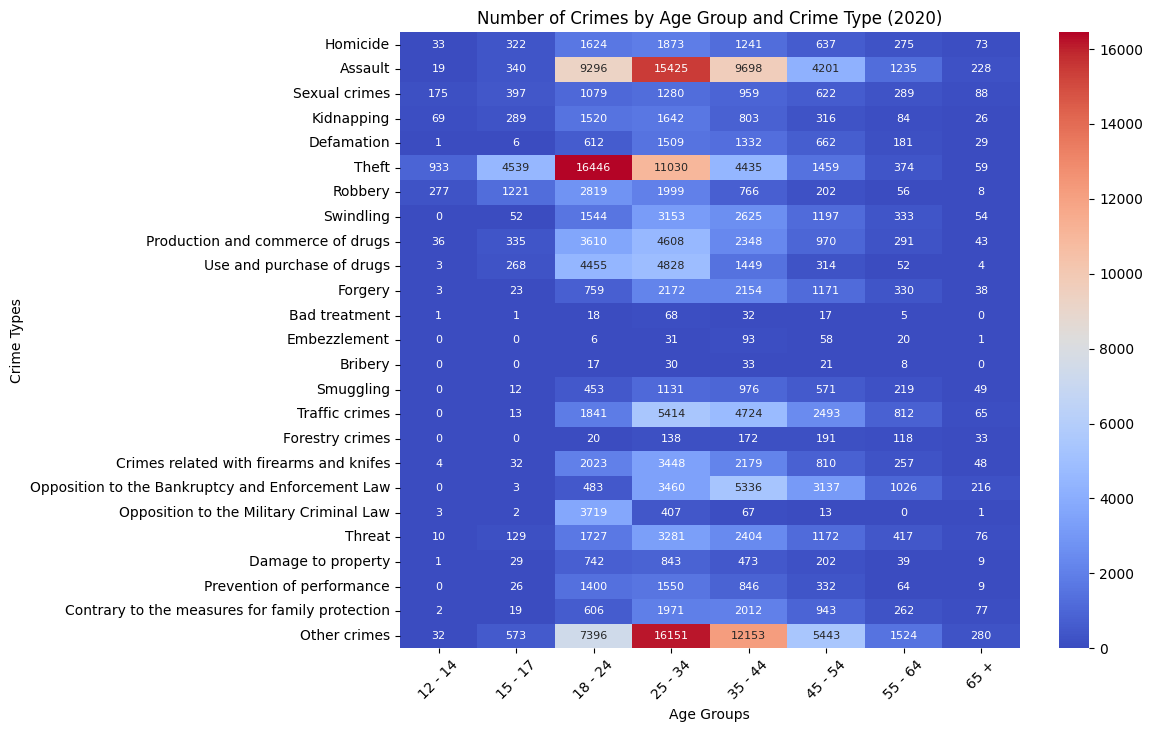

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_age.drop(['Total']), annot=True, cmap='coolwarm', fmt='.0f', annot_kws={"size": 8})

# Set the axis labels and title
plt.xlabel("Age Groups")
plt.ylabel("Crime Types")
plt.title("Number of Crimes by Age Group and Crime Type (2020)")

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



In [ ]:
# Print the male dataset

df_male.head()

,12 - 14 Erkek - Male,15 - 17 Erkek - Male,18 - 24 Erkek - Male,25 - 34 Erkek - Male,35 - 44 Erkek - Male,45 - 54 Erkek - Male,55 - 64 Erkek - Male,65 + Erkek - Male
Total,1528,8374,61782,83871,56812,26091,7960,1446


# Adjusting the Data for a Better Analysis

Since the amount of crime types are overwhelming and hard to analyze, we will categorize the crimes in 2 categories: **Violent Crimes** (consists of *Homicide*, *Assault*, *Sexual Assault*, *Kidnapping*) and **Other Crimes** (rest of them) to gain a better insight into different patterns, motivations, and societal interpretations. This categorization can also help in analyzing the relationship between age and the likelihood of committing each type of crime separately, considering their differences in nature (where violent crimes have a spesific intent to harm) allowing for a more nuanced understanding of the impact of age on different crime categories. Understanding these relationships can help us get to the root of the problem within the Turkish society, and possibly offering us new ways to overcome these problems.

We also keep track of the crimes by each sex seperately to keep the analysis detailed. When an overall data is required, they will be combined.

In [ ]:

def compose_year(df_year):
    # df_copy created to store the whole dataframe
    df_copy = df_year.copy()

    # Dropped unnecessary df_copy columns
    df_copy = df_year.drop(df_copy.columns[[0, 1]], axis=1)

    # Created 'Felonies' and 'Misdemeanor' in df_copy
    df_copy.loc['Felonies'] = df_copy.iloc[1:5, :].sum()
    df_copy.loc['Misdemeanor'] = df_copy.iloc[5:26, :].sum()

    # In new_df, only 'Misdemeanor' and 'Felonies' are stored 
    new_df = df_copy.loc[['Misdemeanor', 'Felonies']]

    # Add third column to the first column
    new_df.iloc[:, 0] = new_df.iloc[:, 0] + new_df.iloc[:, 2]
    # Rename the first column
    new_df.rename(columns={new_df.columns[0]: '15 - 24 Erkek - Male'}, inplace=True)
    # Add fourth column to the second column
    new_df.iloc[:, 1] = new_df.iloc[:, 1] + new_df.iloc[:, 3]
    # Rename the second column
    new_df.rename(columns={new_df.columns[1]: '15 - 24 Kadın - Female'}, inplace=True)
    # Remove the fourth and second columns
    new_df = new_df.drop(new_df.columns[3], axis=1)
    new_df = new_df.drop(new_df.columns[2], axis=1)

    return new_df
  

In [ ]:
# CREATE MALE AND FEMALE DATAFRAMES FOR ALL OF THE YEARS


# CREATE male2013 AND female2013
# Dropping total count of male and female
df2013FM = df2013.drop(df2013.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2013age = df2013FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2013age = df2013FM.iloc[:, 1::2]
composed2013 = compose_year(df2013)

# CREATE male2014 AND female2014
# Dropping total count of male and female
df2014FM = df2014.drop(df2014.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2014age = df2014FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2014age = df2014FM.iloc[:, 1::2]
composed2014 = compose_year(df2014)

# CREATE male2013 AND female2013
# Dropping total count of male and female
df2015FM = df2015.drop(df2015.columns[:4], axis=1)
# elect columns at even positions (0, 2, 4, ...) to get only male
male2015age = df2015FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2015age = df2015FM.iloc[:, 1::2]
composed2015 = compose_year(df2015)

# CREATE male2013 AND female2013
# Dropping total count of male and female
df2016FM = df2016.drop(df2016.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2016age = df2016FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2016age = df2016FM.iloc[:, 1::2]
composed2016 = compose_year(df2016)

# CREATE male2013 AND female2013
# Dropping total count of male and female
df2017FM = df2017.drop(df2017.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2017age = df2017FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2017age = df2017FM.iloc[:, 1::2]
composed2017 = compose_year(df2017)

# CREATE male2013 AND female2013
# Dropping total count of male and female
df2018FM = df2018.drop(df2018.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2018age = df2018FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2018age = df2018FM.iloc[:, 1::2]
composed2018 = compose_year(df2018)

# CREATE male2013 AND female2013
# Dropping total count of male and female
df2019FM = df2019.drop(df2019.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2019age = df2019FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2019age = df2019FM.iloc[:, 1::2]
composed2019 = compose_year(df2019)

# CREATE male2013 AND female2013
# Dropping total count of male and female
df2020FM = df2020.drop(df2020.columns[:4], axis=1)
# Select columns at even positions (0, 2, 4, ...) to get only male
male2020age = df2020FM.iloc[:, 0::2] 
# Select columns at even positions (0, 2, 4, ...) to get only female
female2020age = df2020FM.iloc[:, 1::2]
composed2020 = compose_year(df2020)


In [ ]:
# Function to compare female and male age group counts in specific year
# Example usage plot_crime_counts(df_part, male2018age, female2018age, 2018)
import matplotlib.pyplot as plt

def plot_crime_counts(df_part_FM, SUC1, SUC2, year):
    # df_copy created to store the whole dataframe
    df_copy = df_part_FM.copy()

    # Dropped unnecessary df_copy columns
    df_copy = df_copy.drop(df_copy.columns[[0, 1]], axis=1)

    # Created 'Felonies' and 'Misdemeanor' in df_copy
    df_copy.loc['Felonies'] = df_copy.iloc[1:5, :].sum()
    df_copy.loc['Misdemeanor'] = df_copy.iloc[5:26, :].sum()

    # In new_df, only 'Misdemeanor' and 'Felonies' are stored 
    new_df = df_copy.loc[['Misdemeanor', 'Felonies']]

    # Add third column to the first column
    new_df.iloc[:, 0] = new_df.iloc[:, 0] + new_df.iloc[:, 2]
    # Rename the first column
    new_df.rename(columns={new_df.columns[0]: '15 - 24 Erkek - Male'}, inplace=True)
    # Add fourth column to the second column
    new_df.iloc[:, 1] = new_df.iloc[:, 1] + new_df.iloc[:, 3]
    # Rename the second column
    new_df.rename(columns={new_df.columns[1]: '15 - 24 Kadın - Female'}, inplace=True)
    # Remove the fourth and second columns
    new_df = new_df.drop(new_df.columns[3], axis=1)
    new_df = new_df.drop(new_df.columns[2], axis=1)

    # SUC1 only gets males in new_df 
    SUC1 = new_df.iloc[:, 0::2]

    # Transpose the DataFrame
    SUC1 = SUC1.T

    # Plotting a bar graph
    ax1 = plt.subplot(1, 2, 1)
    SUC1.plot.bar(ax=ax1)

    # Set the labels and title
    plt.xlabel("Age Groups")
    plt.ylabel("Count")
    plt.title(f"{year} Crime Counts by Age Group (Male)")

    # Add data labels to the bars
    for p in ax1.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax1.annotate(f"{y}", (x, y), ha='center', va='bottom')

    # Adjust the size of the plot
    plt.rcParams["figure.figsize"] = (15, 10)

    # Code 2

    # SUC2 only gets females in new_df 
    SUC2 = new_df.iloc[:, 1::2]

    # Transpose the DataFrame
    SUC2 = SUC2.T

    # Plotting a bar graph
    ax2 = plt.subplot(1, 2, 2)
    SUC2.plot.bar(ax=ax2)

    # Set the labels and title
    plt.xlabel("Age Groups")
    plt.ylabel("Count")
    plt.title(f"{year} Crime Counts by Age Group (Female)")

    # Add data labels to the bars
    for p in ax2.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax2.annotate(f"{y}", (x, y), ha='center', va='bottom')

    # Adjust the size of the plot
    plt.rcParams["figure.figsize"] = (15, 10)

    # Display the plots
    plt.tight_layout()
    plt.show()

In [ ]:
new_df.head()

,15 - 24 Erkek - Male,15 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Misdemeanor,55583,2396,64088,3134,44401,2208,20421,957,6103,285,1034,65
Felonies,14562,305,19710,510,12337,364,5619,157,1834,49,408,7


## Violent and Other Crimes by Age Group (by Each Sex) Graphs from 2013 to 2020 

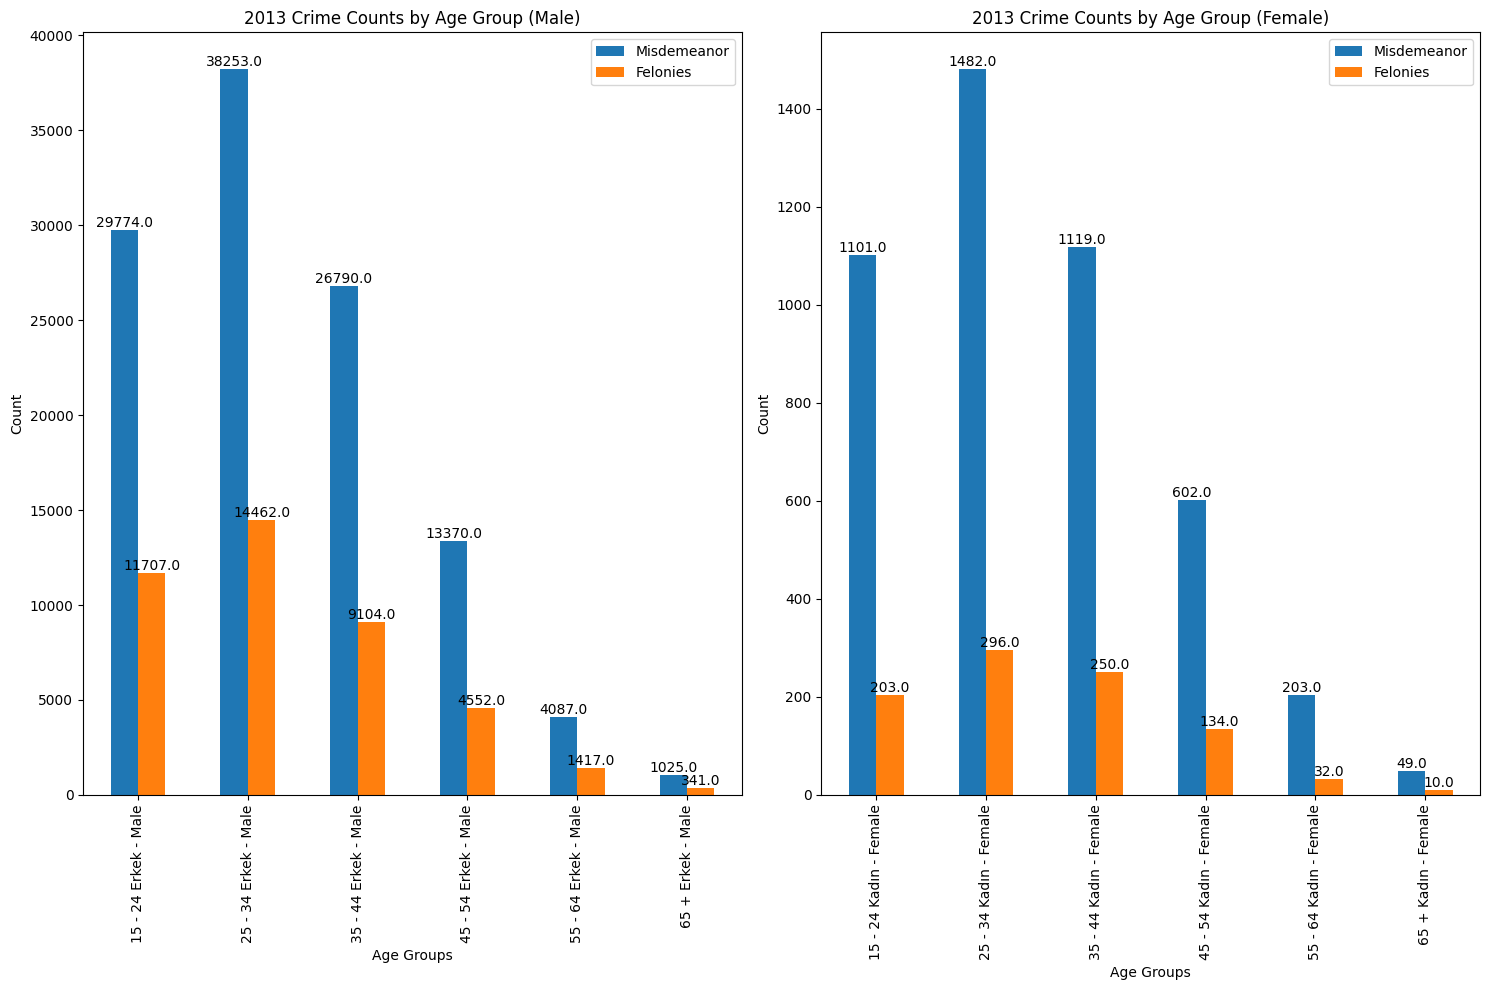

In [ ]:
plot_crime_counts(df2013, male2013age, female2013age, 2013)

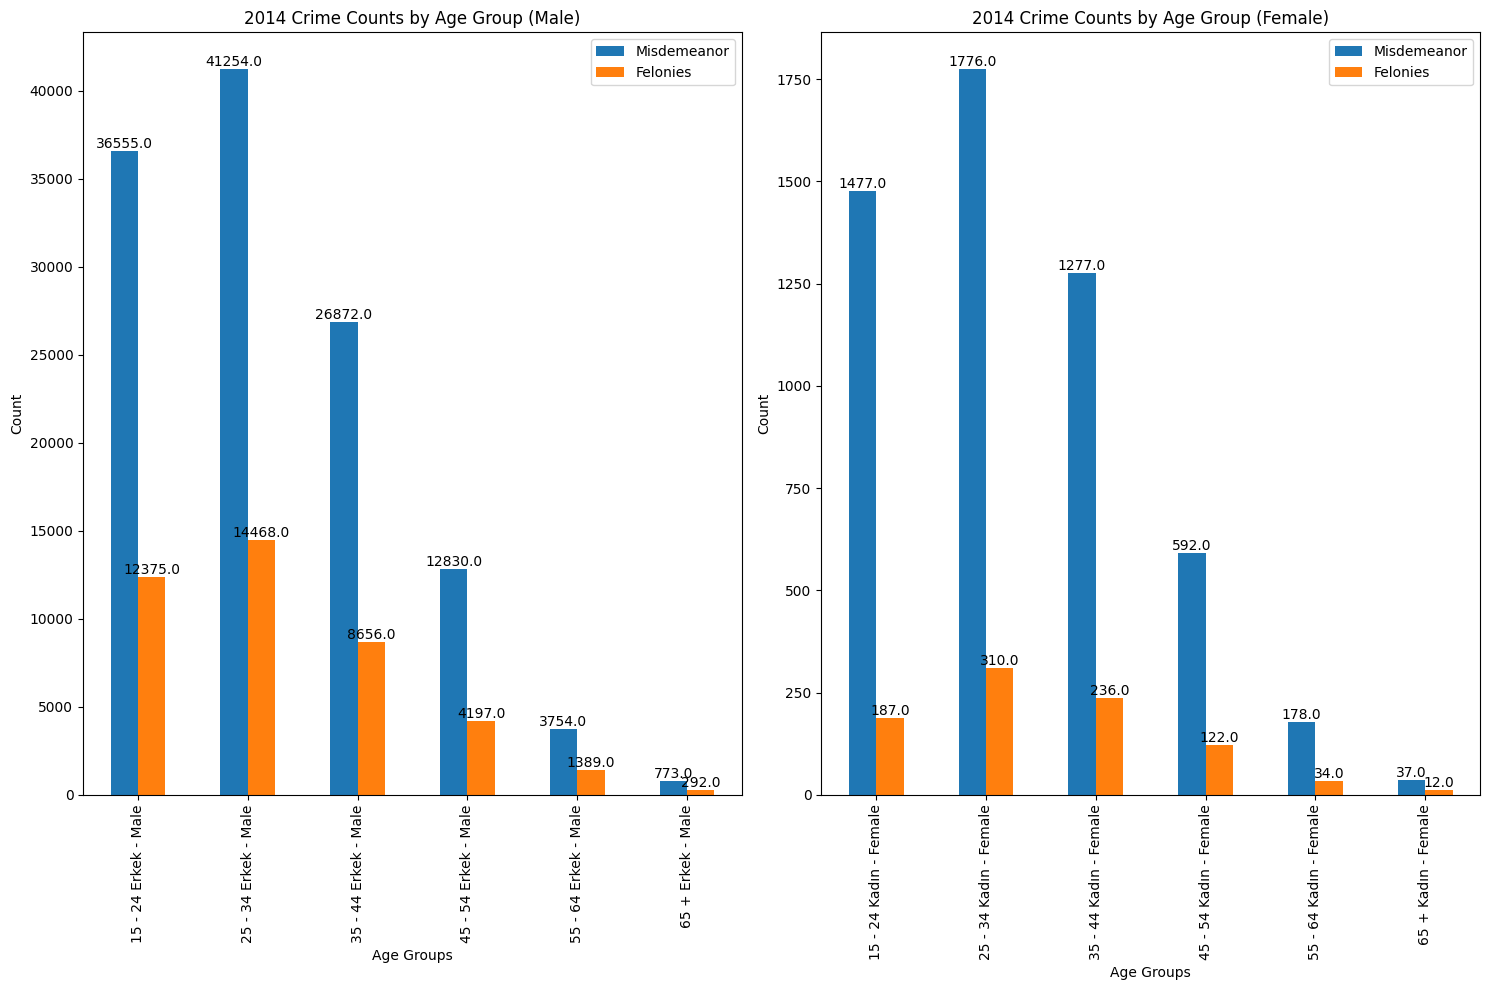

In [ ]:
plot_crime_counts(df2014, male2014age, female2014age, 2014)

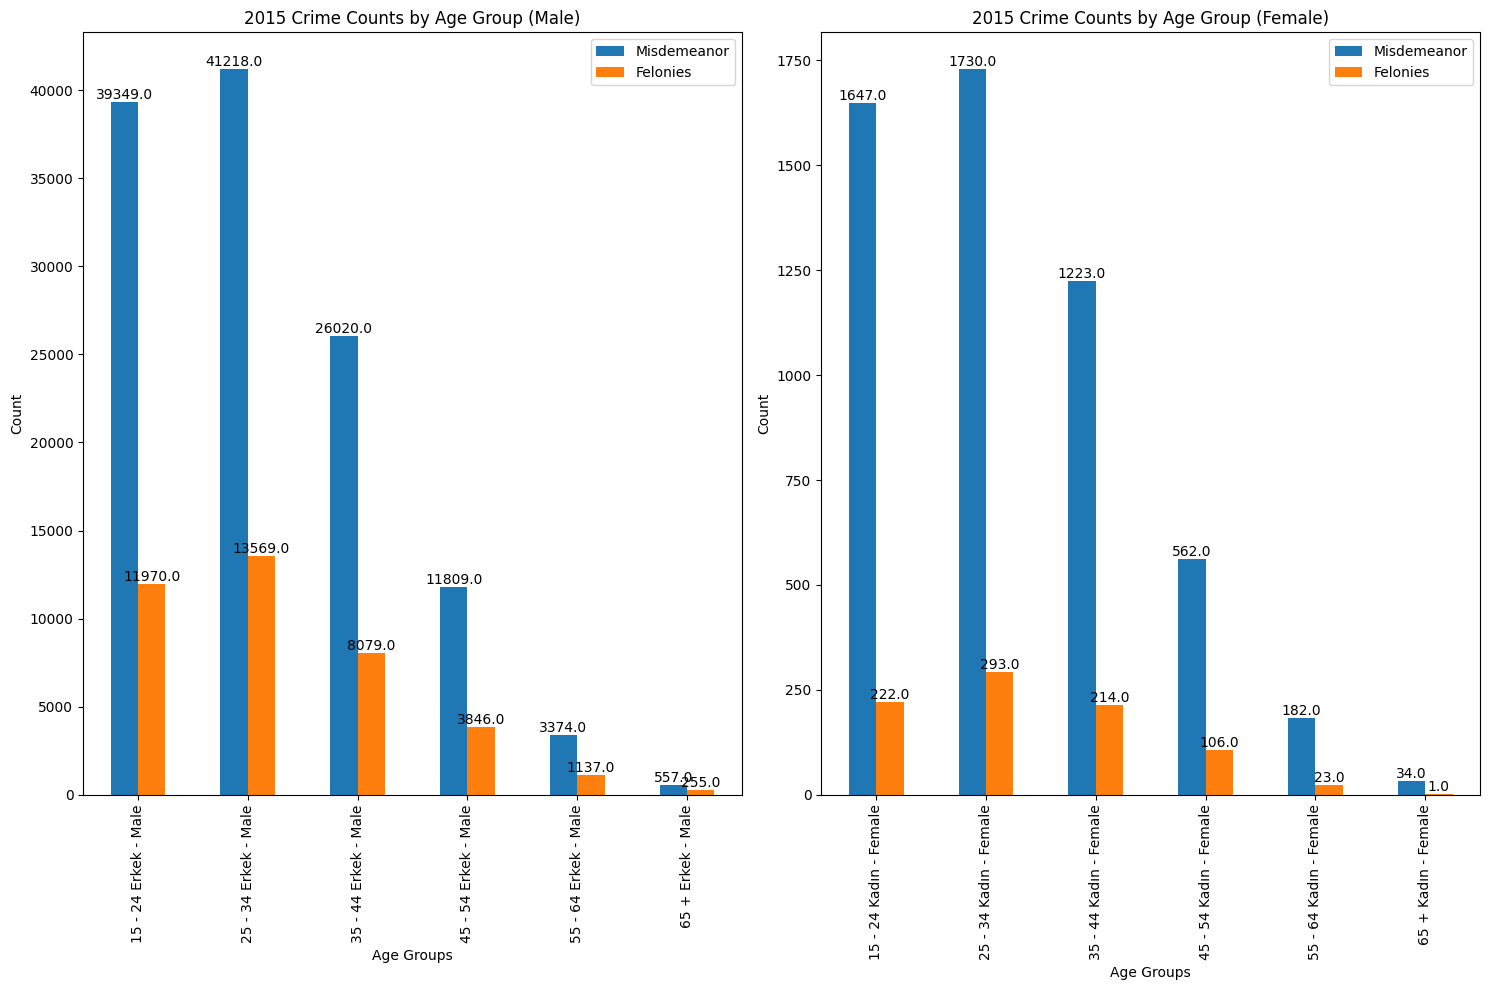

In [ ]:
plot_crime_counts(df2015, male2015age, female2015age, 2015)

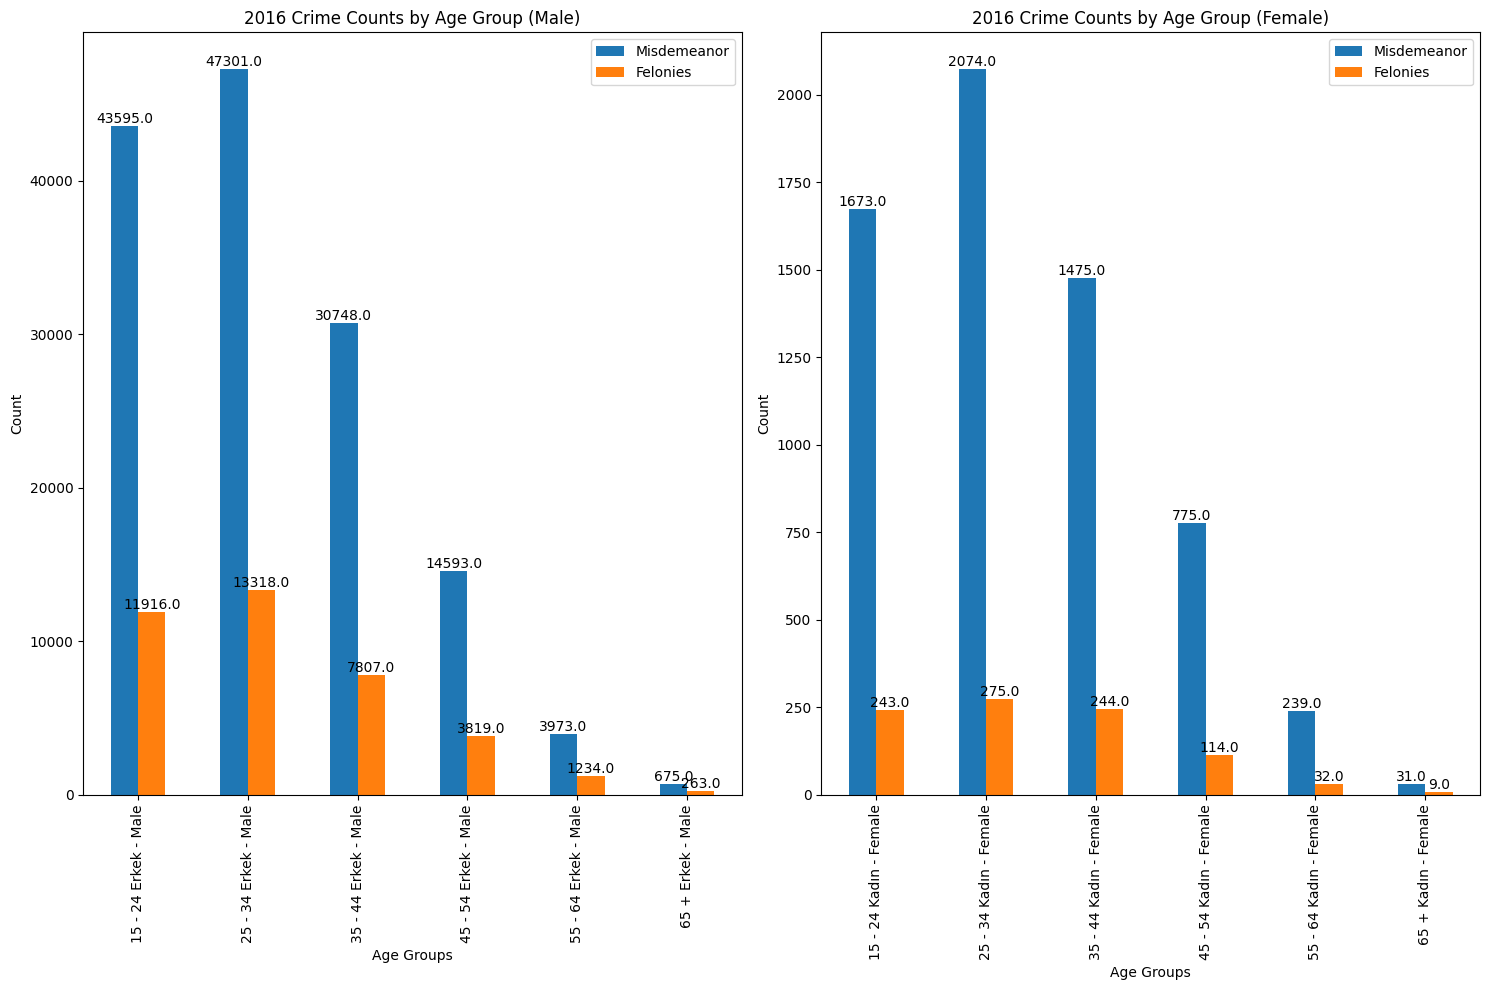

In [ ]:
plot_crime_counts(df2016, male2016age, female2016age, 2016)

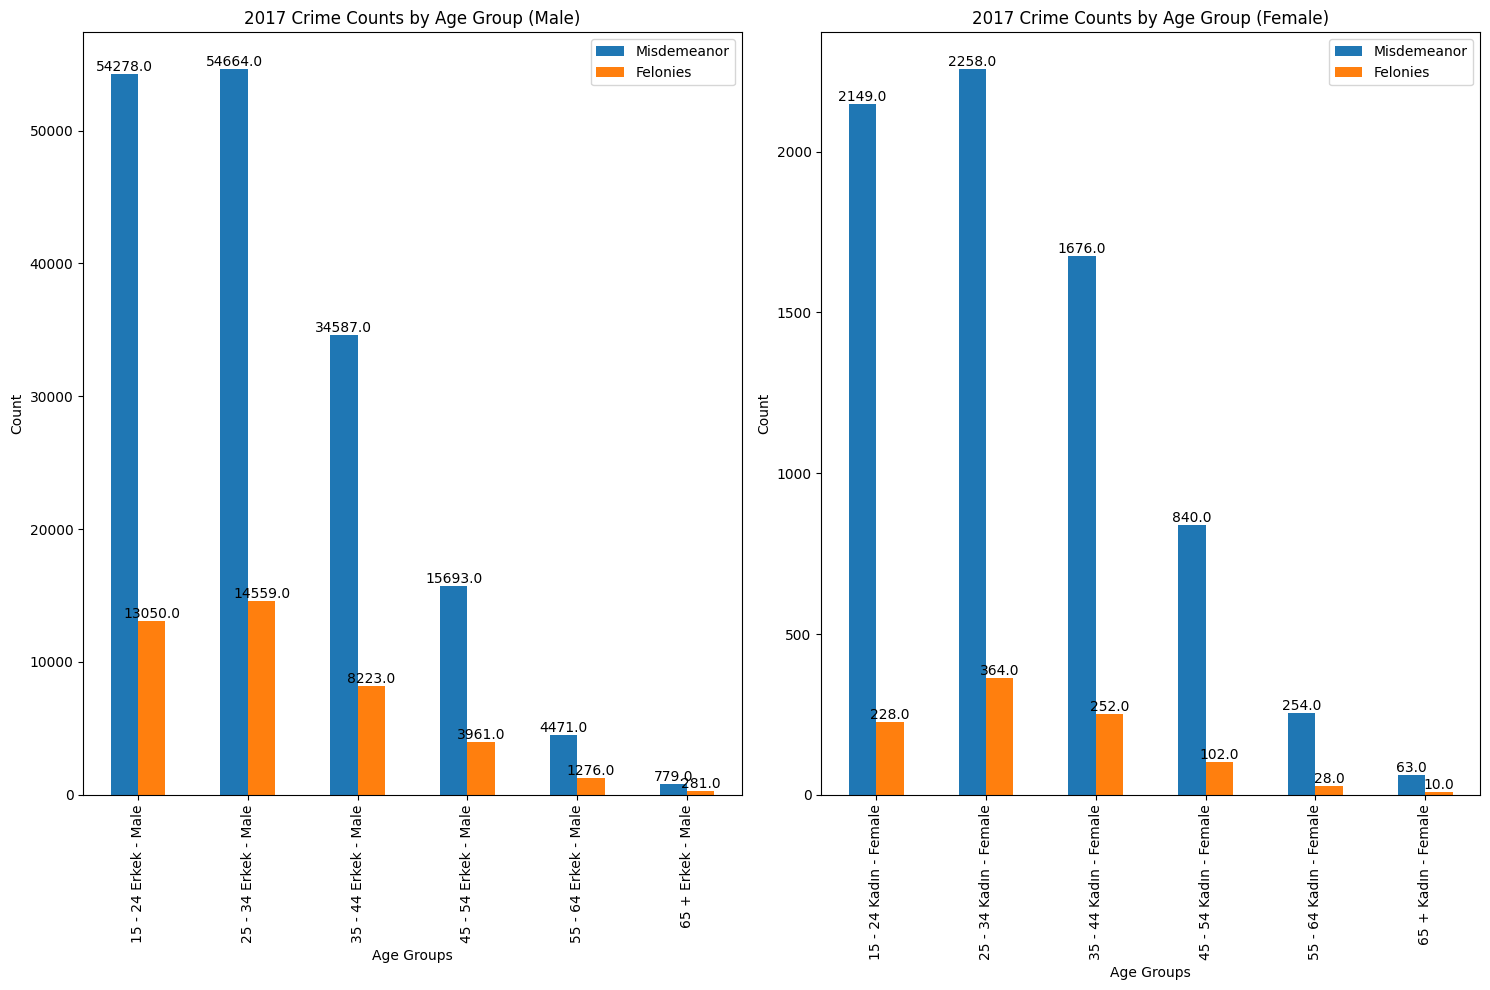

In [ ]:
plot_crime_counts(df2017, male2017age, female2017age, 2017)

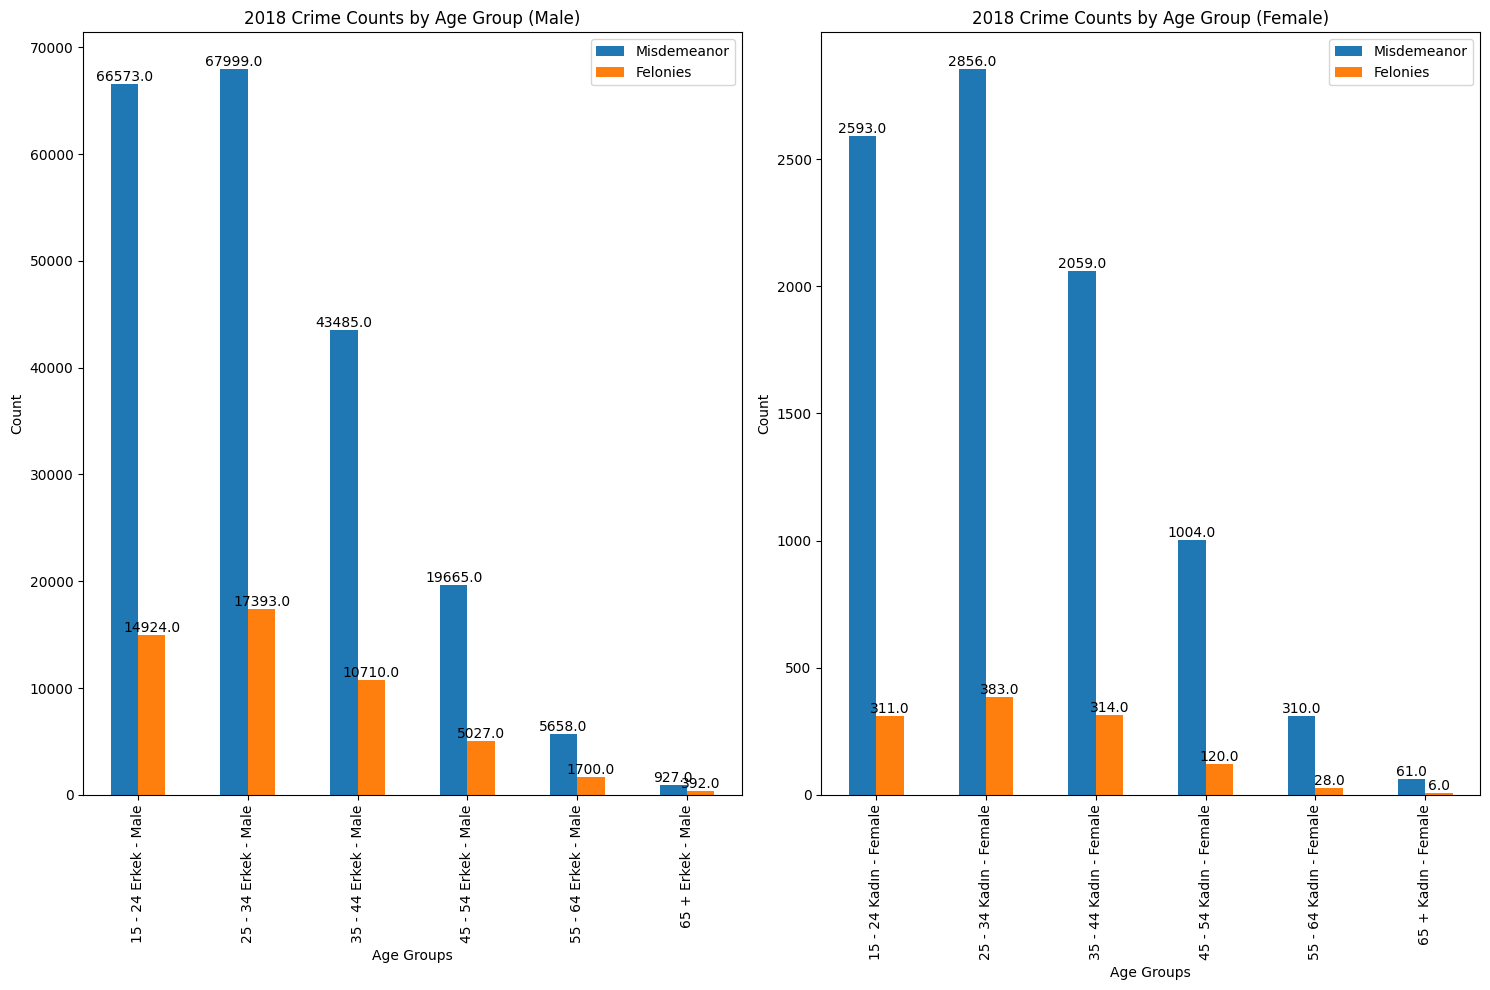

In [ ]:
plot_crime_counts(df2018, male2018age, female2018age, 2018)

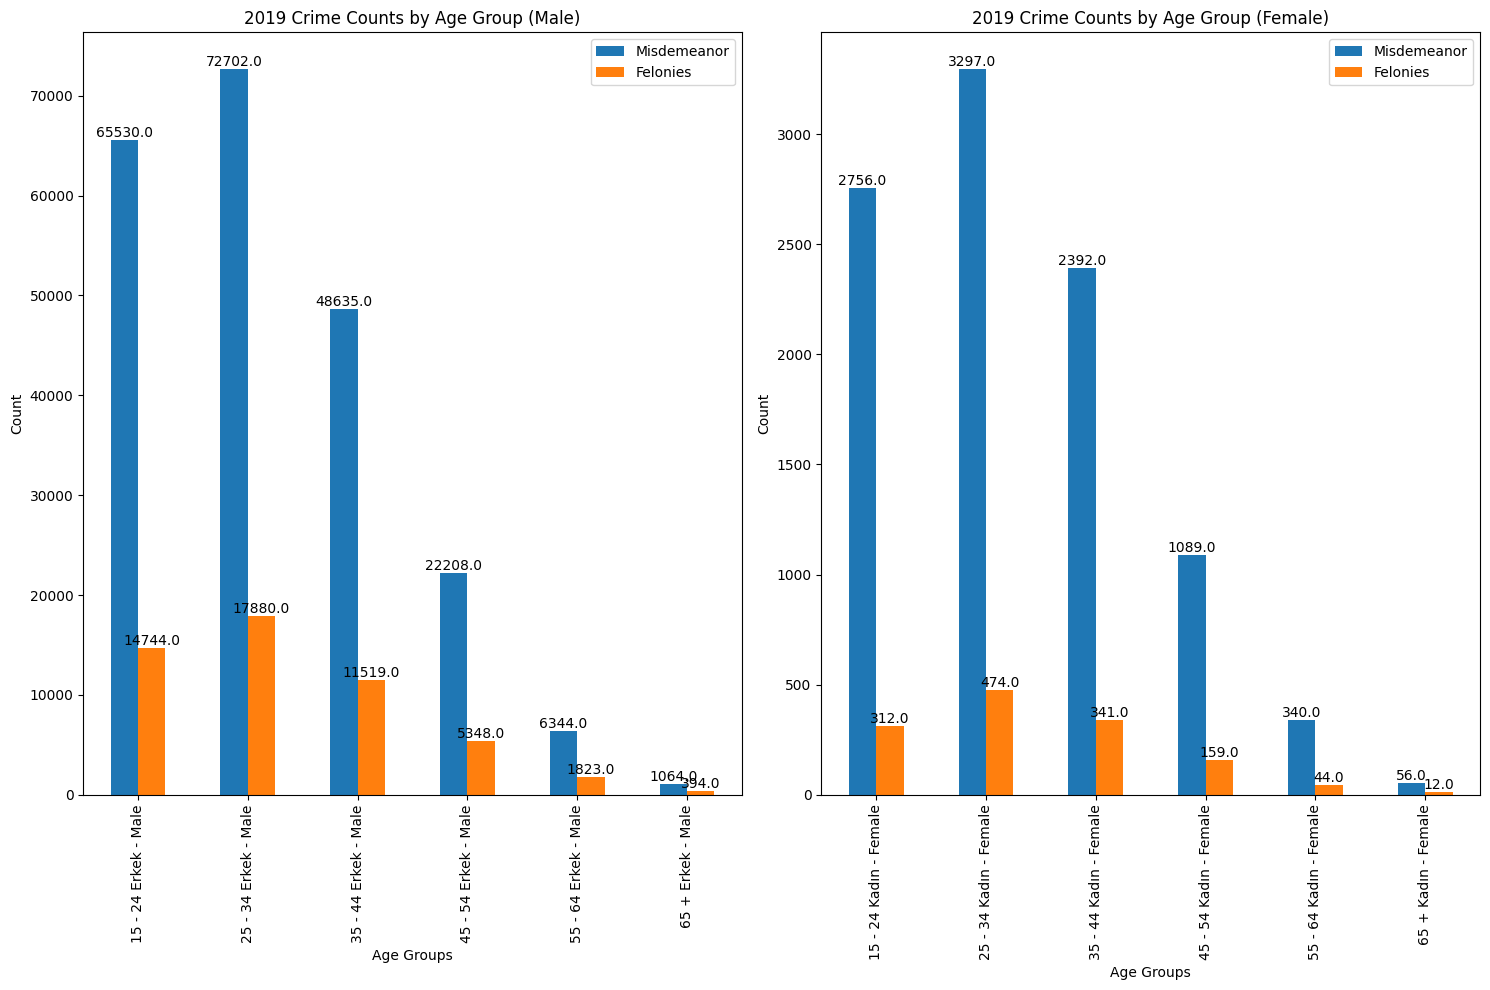

In [ ]:
plot_crime_counts(df2019, male2019age, female2019age, 2019)

In [ ]:
df2019.head()

,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Total,1997,71,10647,300,69629.0,2768,90591.0,3771,60174.0,2733,27568.0,1248,8169,384,1458,68
Homicide,62,4,608,11,2689.0,75,3129.0,71,1616.0,45,821.0,22,339,5,74,2
Assault,46,2,413,2,7958.0,184,12123.0,358,8351.0,250,3745.0,117,1123,32,184,8
Sexual crimes,245,0,624,6,1325.0,3,1520.0,13,1059.0,12,575.0,4,296,2,110,2
Kidnapping,29,0,128,6,999.0,25,1108.0,32,493.0,34,207.0,16,65,5,26,0


## Overall Violent and Other Crimes by Age Intervals

In [ ]:
df2013FM = df2013.iloc[1:]
df2014FM = df2014.iloc[1:]
df2015FM = df2015.iloc[1:]
df2016FM = df2016.iloc[1:]
df2017FM = df2017.iloc[1:]
df2018FM = df2018.iloc[1:]
df2019FM = df2019.iloc[1:]




df2013FM.loc['Felonies'] = df2013.iloc[:4, :].sum()
df2013FM.loc['Misdemeanor'] = df2013.iloc[4:-1, :].sum()
df2014FM.loc['Felonies'] = df2014.iloc[:4, :].sum()
df2014FM.loc['Misdemeanor'] = df2014.iloc[4:-1, :].sum()
df2015FM.loc['Felonies'] = df2015.iloc[:4, :].sum()
df2015FM.loc['Misdemeanor'] = df2015.iloc[4:-1, :].sum()
df2016FM.loc['Felonies'] = df2016.iloc[:4, :].sum()
df2016FM.loc['Misdemeanor'] = df2016.iloc[4:-1, :].sum()
df2017FM.loc['Felonies'] = df2017.iloc[:4, :].sum()
df2017FM.loc['Misdemeanor'] = df2017.iloc[4:-1, :].sum()
df2018FM.loc['Felonies'] = df2018.iloc[:4, :].sum()
df2018FM.loc['Misdemeanor'] = df2018.iloc[4:-1, :].sum()
df2019FM.loc['Felonies'] = df2019.iloc[:4, :].sum()
df2019FM.loc['Misdemeanor'] = df2019.iloc[4:-1, :].sum()

df2013_new=df2013FM.tail(2)
df2014_new=df2014FM.tail(2)
df2015_new=df2015FM.tail(2)
df2016_new=df2016FM.tail(2)
df2017_new=df2017FM.tail(2)
df2018_new=df2018FM.tail(2)
df2019_new=df2019FM.tail(2)

In [ ]:
df2013FM=df2013_new.sum(axis=1)
df2014FM=df2014_new.sum(axis=1)
df2015FM=df2015_new.sum(axis=1)
df2016FM=df2016_new.sum(axis=1)
df2017FM=df2017_new.sum(axis=1)
df2018FM=df2018_new.sum(axis=1)
df2019FM=df2019_new.sum(axis=1)

In [ ]:
list2 = {}

for year in range(2013, 2020):
    series = globals().get(f"df{year}FM")

    # Iterate over the items of the Series
    for key, value in series.items():
        if key not in list2:
            list2[key] = []
        list2[key].append(round(value, 2))

# Print the lists
for key, values in list2.items():
    print(f"{key}: {values}")


Felonies: [201982.0, 209901.0, 206040.0, 224253.0, 255491.0, 314972.0, 331841.0]
Misdemeanor: [103369.0, 110532.0, 112649.0, 128541.0, 146328.0, 178552.0, 183785.0]


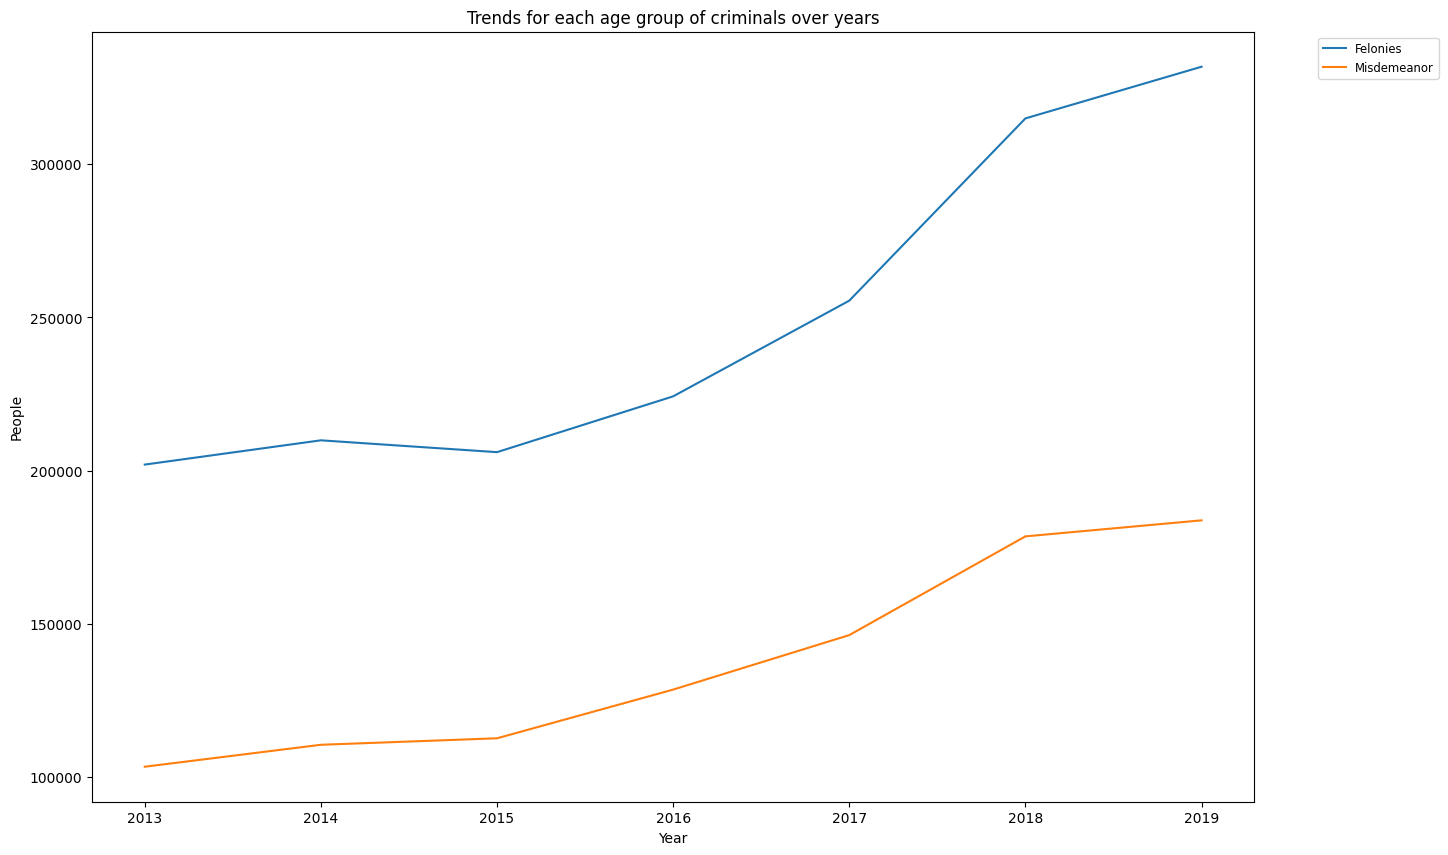

In [ ]:
years = list(range(2013, 2020))

# Iterate over the keys and plot the values
for key, values in list2.items():
    plt.plot(years, values, label=key)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('People')

# Set the title of the plot
plt.title('Trends for each age group of criminals over years')

# Add a legend
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
new_df2013=df2013_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]
new_df2014=df2014_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]
new_df2015=df2015_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]
new_df2016=df2016_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]
new_df2017=df2017_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]
new_df2018=df2018_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]
new_df2019=df2019_new[['25 - 34 Erkek - Male', '25 - 34 Kadın - Female']]

new_df2019.head()

,25 - 34 Erkek - Male,25 - 34 Kadın - Female
Felonies,107363.0,4213.0
Misdemeanor,57496.0,2357.0


In [ ]:
felonies_list_men = []
felonies_list_men.append(new_df2013.loc['Felonies','25 - 34 Erkek - Male'])
felonies_list_men.append(new_df2014.loc['Felonies','25 - 34 Erkek - Male'])
felonies_list_men.append(new_df2015.loc['Felonies','25 - 34 Erkek - Male'])
felonies_list_men.append(new_df2016.loc['Felonies','25 - 34 Erkek - Male'])
felonies_list_men.append(new_df2017.loc['Felonies','25 - 34 Erkek - Male'])
felonies_list_men.append(new_df2018.loc['Felonies','25 - 34 Erkek - Male'])
felonies_list_men.append(new_df2019.loc['Felonies','25 - 34 Erkek - Male'])

misdemeanor_list_men =[]

misdemeanor_list_men.append(new_df2013.loc['Misdemeanor','25 - 34 Erkek - Male'])
misdemeanor_list_men.append(new_df2014.loc['Misdemeanor','25 - 34 Erkek - Male'])
misdemeanor_list_men.append(new_df2015.loc['Misdemeanor','25 - 34 Erkek - Male'])
misdemeanor_list_men.append(new_df2016.loc['Misdemeanor','25 - 34 Erkek - Male'])
misdemeanor_list_men.append(new_df2017.loc['Misdemeanor','25 - 34 Erkek - Male'])
misdemeanor_list_men.append(new_df2018.loc['Misdemeanor','25 - 34 Erkek - Male'])
misdemeanor_list_men.append(new_df2019.loc['Misdemeanor','25 - 34 Erkek - Male'])

felonies_list_women = []
felonies_list_women.append(new_df2013.loc['Felonies','25 - 34 Kadın - Female'])
felonies_list_women.append(new_df2014.loc['Felonies','25 - 34 Kadın - Female'])
felonies_list_women.append(new_df2015.loc['Felonies','25 - 34 Kadın - Female'])
felonies_list_women.append(new_df2016.loc['Felonies','25 - 34 Kadın - Female'])
felonies_list_women.append(new_df2017.loc['Felonies','25 - 34 Kadın - Female'])
felonies_list_women.append(new_df2018.loc['Felonies','25 - 34 Kadın - Female'])
felonies_list_women.append(new_df2019.loc['Felonies','25 - 34 Kadın - Female'])

misdemeanor_list_women =[]
misdemeanor_list_women.append(new_df2013.loc['Misdemeanor','25 - 34 Kadın - Female'])
misdemeanor_list_women.append(new_df2014.loc['Misdemeanor','25 - 34 Kadın - Female'])
misdemeanor_list_women.append(new_df2015.loc['Misdemeanor','25 - 34 Kadın - Female'])
misdemeanor_list_women.append(new_df2016.loc['Misdemeanor','25 - 34 Kadın - Female'])
misdemeanor_list_women.append(new_df2017.loc['Misdemeanor','25 - 34 Kadın - Female'])
misdemeanor_list_women.append(new_df2018.loc['Misdemeanor','25 - 34 Kadın - Female'])
misdemeanor_list_women.append(new_df2019.loc['Misdemeanor','25 - 34 Kadın - Female'])

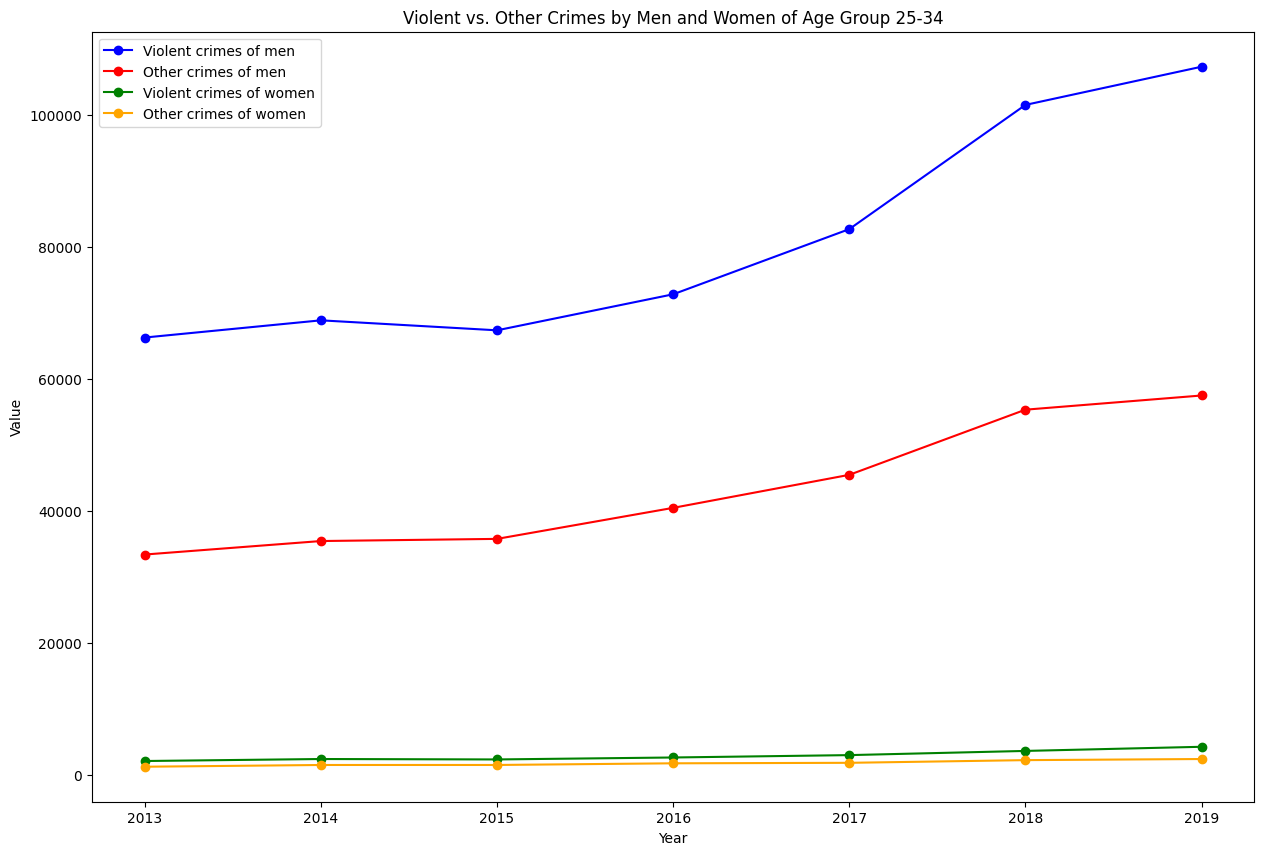

In [ ]:
plt.plot(years, felonies_list_men, marker='o', linestyle='-', color='blue', label='Violent crimes of men')
plt.plot(years, misdemeanor_list_men, marker='o', linestyle='-', color='red', label='Other crimes of men')
plt.plot(years, felonies_list_women, marker='o', linestyle='-', color='green', label='Violent crimes of women')
plt.plot(years, misdemeanor_list_women, marker='o', linestyle='-', color='orange', label='Other crimes of women')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Violent vs. Other Crimes by Men and Women of Age Group 25-34')

# Adding legend
plt.legend()

# Displaying the plot
plt.show()

# Inclusion of the Population by Gender and Age Group Data

Inclusion of the population within each age interval is important because the population size within each bin is different. We will obtain a new dataset from the formula:
(crime committed between ages x-(x+9))/(population size) = **crime ratio between ages x-(x+9)** for x = {15, 25, 35, 45, 55, 65}

We will then use this new dataset that shows *'crime ratio by age group'* for a more accurate analysis.

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the Excel file into a dataframe
xls = pd.ExcelFile('data2.xls')
print(xls.sheet_names)


['t3']


In [ ]:
#DATA PREPROCESSING

# Load the specific sheet into a dataframe, skipping the first 5 rows
df_population = pd.read_excel('data2.xls', sheet_name='t3', skiprows=3)

# Drop the "Unnamed-4" column, which is unnecessary (NaN values for the whole column)
df_population = df_population.drop("Unnamed: 2", axis=1)

# Define the column numbers to be dropped
columns_to_drop = [2,3,4]

# Drop the columns
df_population = df_population.drop(df_population.columns[columns_to_drop], axis=1)

df_population = df_population.rename(columns={"Unnamed: 1": "Type"})
df_population = df_population.rename(columns={"Unnamed: 0": "Year"})


# Add 20-25 column to the 15-19 column
df_population.iloc[:, 2] = df_population.iloc[:, 2] + df_population.iloc[:, 3]
# Rename the first column
df_population.rename(columns={df_population.columns[2]: '15 - 24 '}, inplace=True)
# Add 30-34 column to the 25-29 column
df_population.iloc[:, 4] = df_population.iloc[:, 4] + df_population.iloc[:, 6]
# Rename the first column
df_population.rename(columns={df_population.columns[4]: '25 - 34 '}, inplace=True)
# Add 40-44 column to the 35-39 column
df_population.iloc[:, 6] = df_population.iloc[:, 6] + df_population.iloc[:, 7]
# Rename the first column
df_population.rename(columns={df_population.columns[6]: '35 - 44 '}, inplace=True)
# Add 50-54 column to the 45-49 column
df_population.iloc[:, 8] = df_population.iloc[:, 8] + df_population.iloc[:, 9]
# Rename the first column
df_population.rename(columns={df_population.columns[8]: '45 - 54 '}, inplace=True)
# Add 60-64 column to the 55-59 column
df_population.iloc[:, 10] = df_population.iloc[:, 10] + df_population.iloc[:, 11]
# Rename the first column
df_population.rename(columns={df_population.columns[10]: '55 - 64 '}, inplace=True)

# Add 85+ column, 80-84 column, 75-79 column, 70-74 column, to the 65-69 column
df_population.iloc[:, 12] = df_population.iloc[:, 12] + df_population.iloc[:, 13] + df_population.iloc[:, 14] + df_population.iloc[:, 15]+ df_population.iloc[:, 16]
# Rename the first column
df_population.rename(columns={df_population.columns[12]: '65+ '}, inplace=True)

# Remove the fourth and second columns
#new_df = new_df.drop(new_df.columns[[1, 3]], axis=1)
#new_df = new_df.drop(new_df.columns[3], axis=1)
df_population = df_population.drop(df_population.columns[3], axis=1)
df_population = df_population.drop(df_population.columns[4], axis=1)
df_population = df_population.drop(df_population.columns[5], axis=1)
df_population = df_population.drop(df_population.columns[6], axis=1)
df_population = df_population.drop(df_population.columns[7], axis=1)
df_population = df_population.drop(df_population.columns[8], axis=1)
df_population = df_population.drop(df_population.columns[8], axis=1)
df_population = df_population.drop(df_population.columns[8], axis=1)
df_population = df_population.drop(df_population.columns[8], axis=1)

df_population.replace('-', 0, inplace=True)
df_population.fillna('-', inplace=True)

df2011_population = df_population[51:54].set_index(['Type']).reset_index().assign(Year='2011')
df2012_population = df_population[54:57].set_index(['Type']).reset_index().assign(Year='2012')
df2013_population = df_population[57:60].set_index(['Type']).reset_index().assign(Year='2013')
df2014_population = df_population[60:63].set_index(['Type']).reset_index().assign(Year='2014')
df2015_population = df_population[63:66].set_index(['Type']).reset_index().assign(Year='2015')
df2016_population = df_population[66:69].set_index(['Type']).reset_index().assign(Year='2016')
df2017_population = df_population[69:72].set_index(['Type']).reset_index().assign(Year='2017')
df2018_population = df_population[72:75].set_index(['Type']).reset_index().assign(Year='2018')
df2019_population = df_population[75:78].set_index(['Type']).reset_index().assign(Year='2019')
df2020_population = df_population[78:81].set_index(['Type']).reset_index().assign(Year='2020')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_bar_graph(df_population, year):
    # Transpose the DataFrame
    df_transposed = df_population.transpose()

    # Drop the first two rows
    df_transposed = df_transposed.drop(df_transposed.index[:2])

    # Drop the first column
    df_transposed = df_transposed.drop(df_transposed.columns[0], axis=1)

    # Rename the columns
    df_transposed = df_transposed.rename(columns={df_transposed.columns[0]: 'Male', df_transposed.columns[1]: 'Female'})

    # Plotting a bar graph
    ax1 = plt.subplot(1, 2, 1)
    df_transposed.plot.bar(ax=ax1)

    # Set the labels and title
    plt.xlabel("Age Groups")
    plt.ylabel("Count")
    plt.title(f"{year} Population by Gender and Age Group")

    # Add data labels to the bars
    for p in ax1.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax1.annotate(f"{y}", (x, y), ha='center', va='bottom')

    # Adjust the size of the plot
    plt.rcParams["figure.figsize"] = (30, 10)

    # Show the plot
    plt.show()

## Population by Gender and Age Group Graphs from 2012-2020

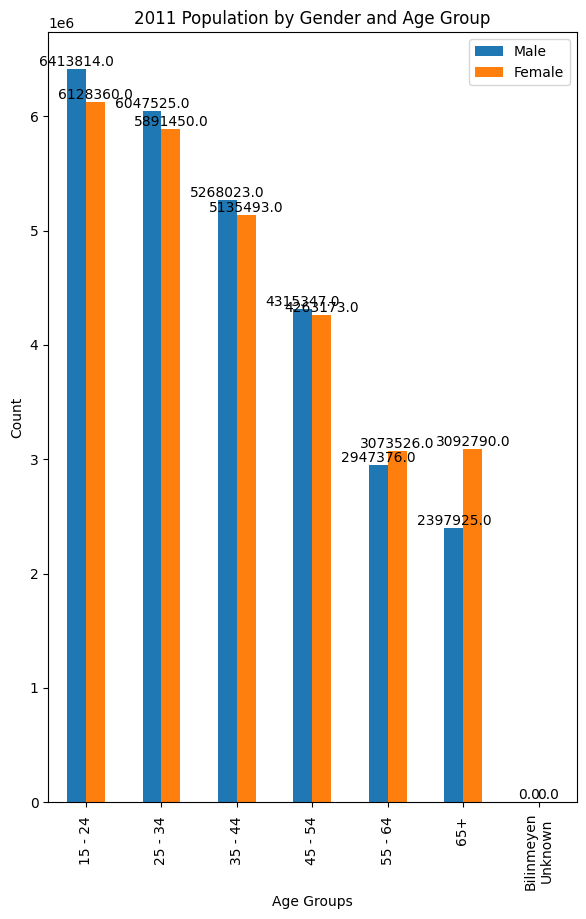

In [ ]:
 # Population by Gender and Age Group in 2011
plot_bar_graph(df2011_population, 2011)

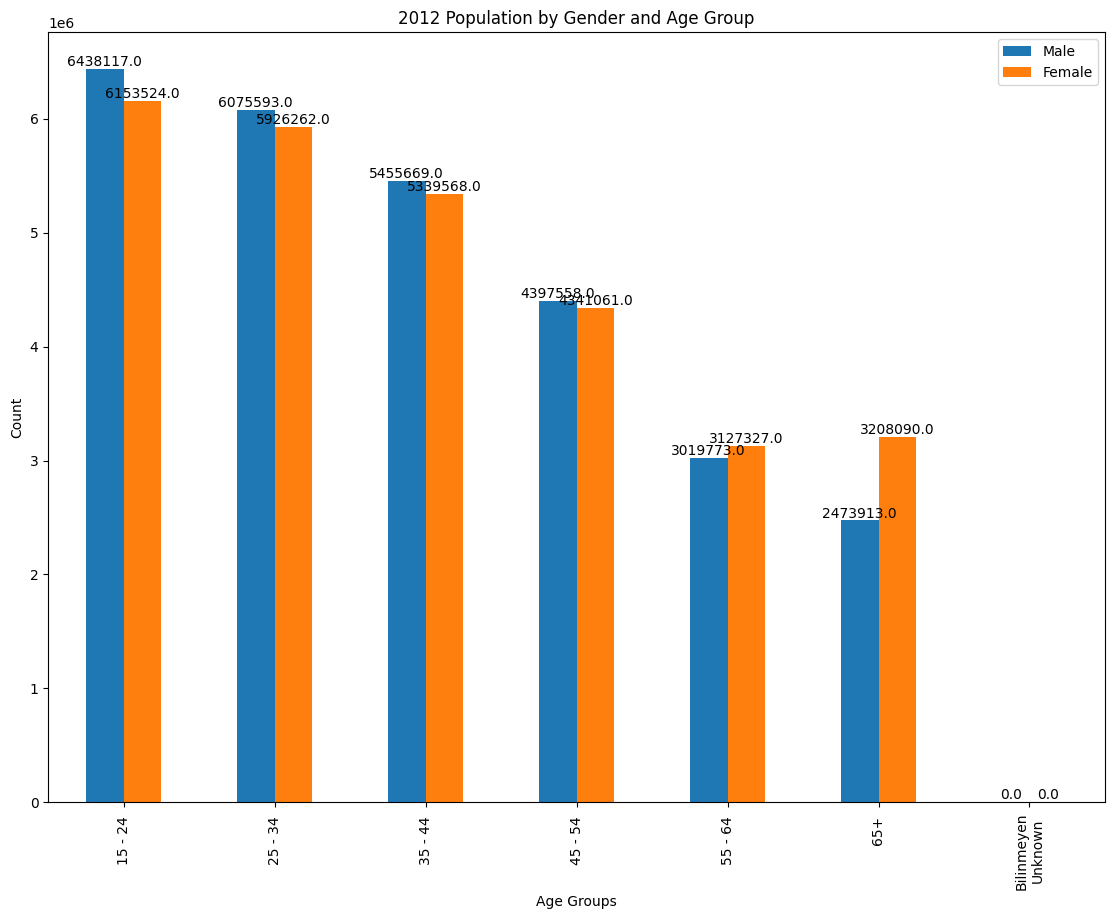

In [ ]:
# Population by Gender and Age Group in 2012
plot_bar_graph(df2012_population, 2012)

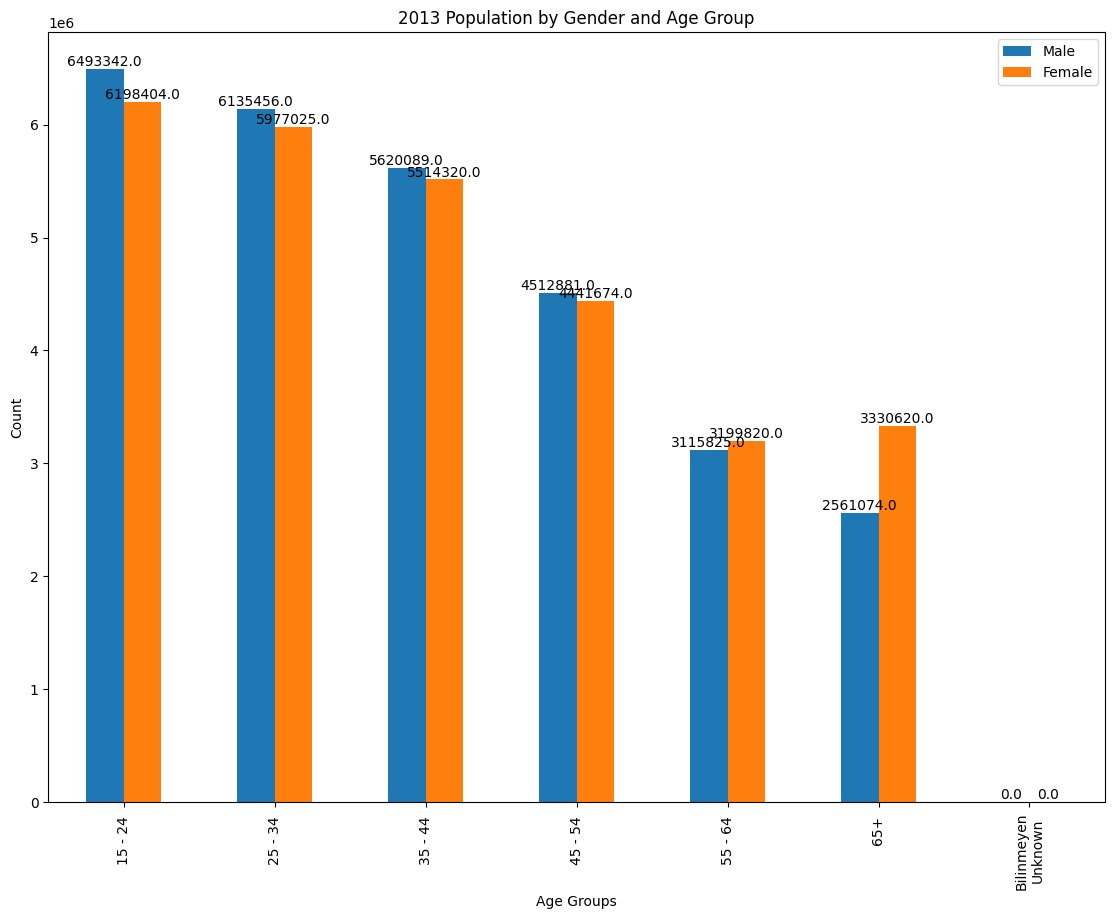

In [ ]:
 # Population by Gender and Age Group in 2013
plot_bar_graph(df2013_population, 2013)

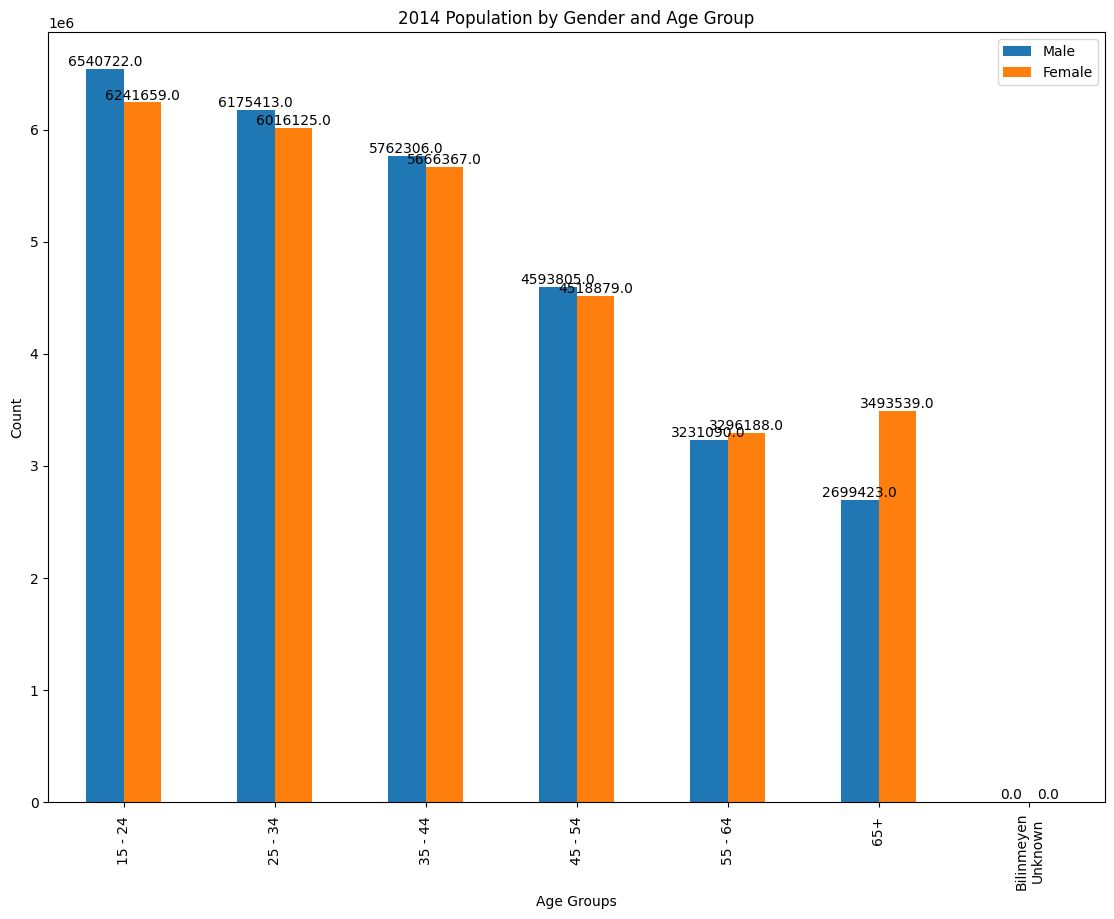

In [ ]:
 # Population by Gender and Age Group in 2014
plot_bar_graph(df2014_population, 2014)

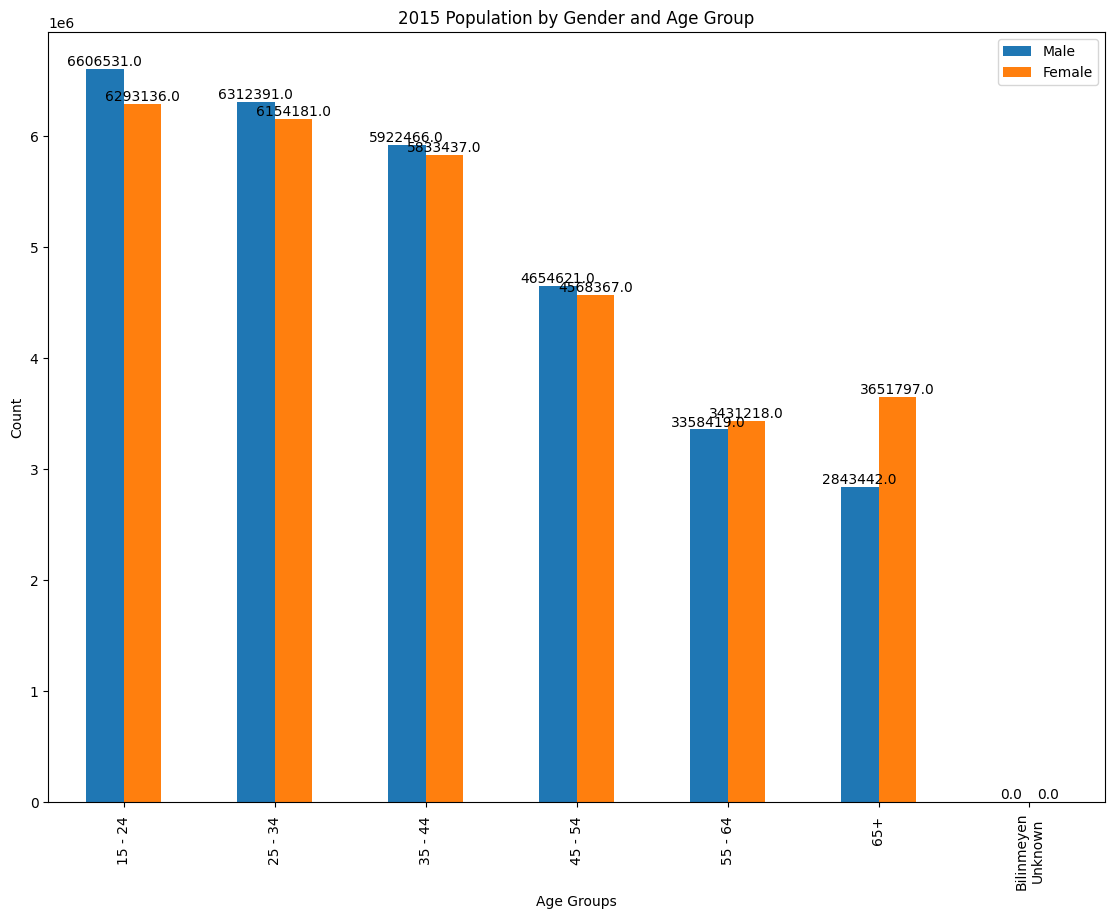

In [ ]:
 # Population by Gender and Age Group in 2015
plot_bar_graph(df2015_population, 2015)

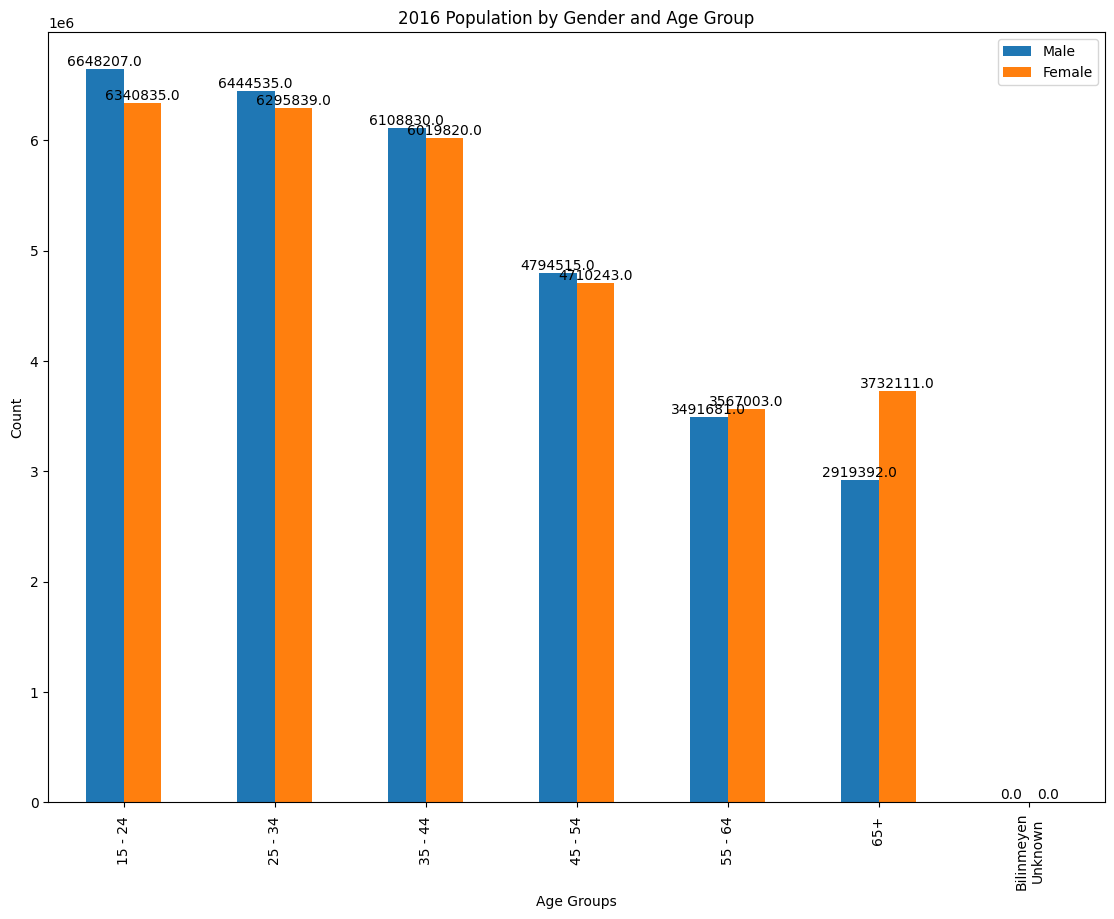

In [ ]:
 # Population by Gender and Age Group in 2016
plot_bar_graph(df2016_population, 2016)

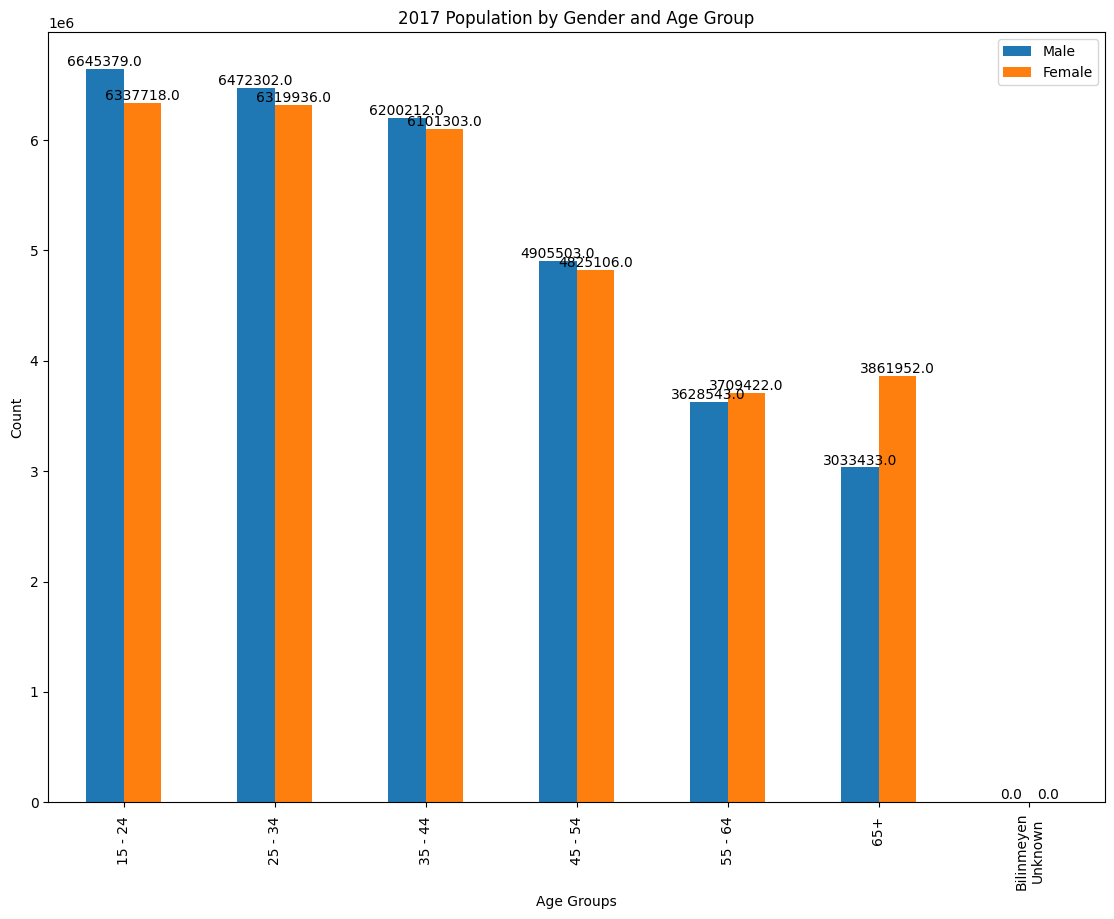

In [ ]:
 # Population by Gender and Age Group in 2017
plot_bar_graph(df2017_population, 2017)

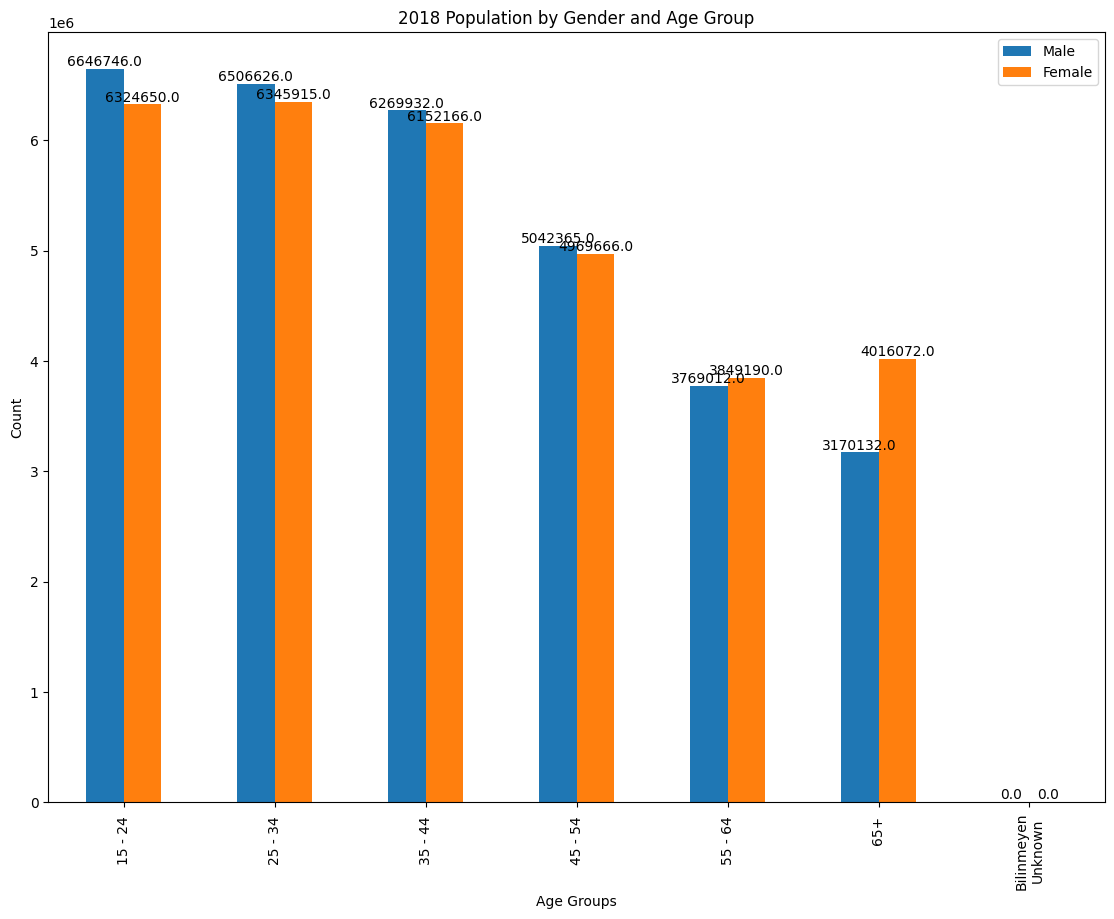

In [ ]:
 # Population by Gender and Age Group in 2018
plot_bar_graph(df2018_population, 2018)

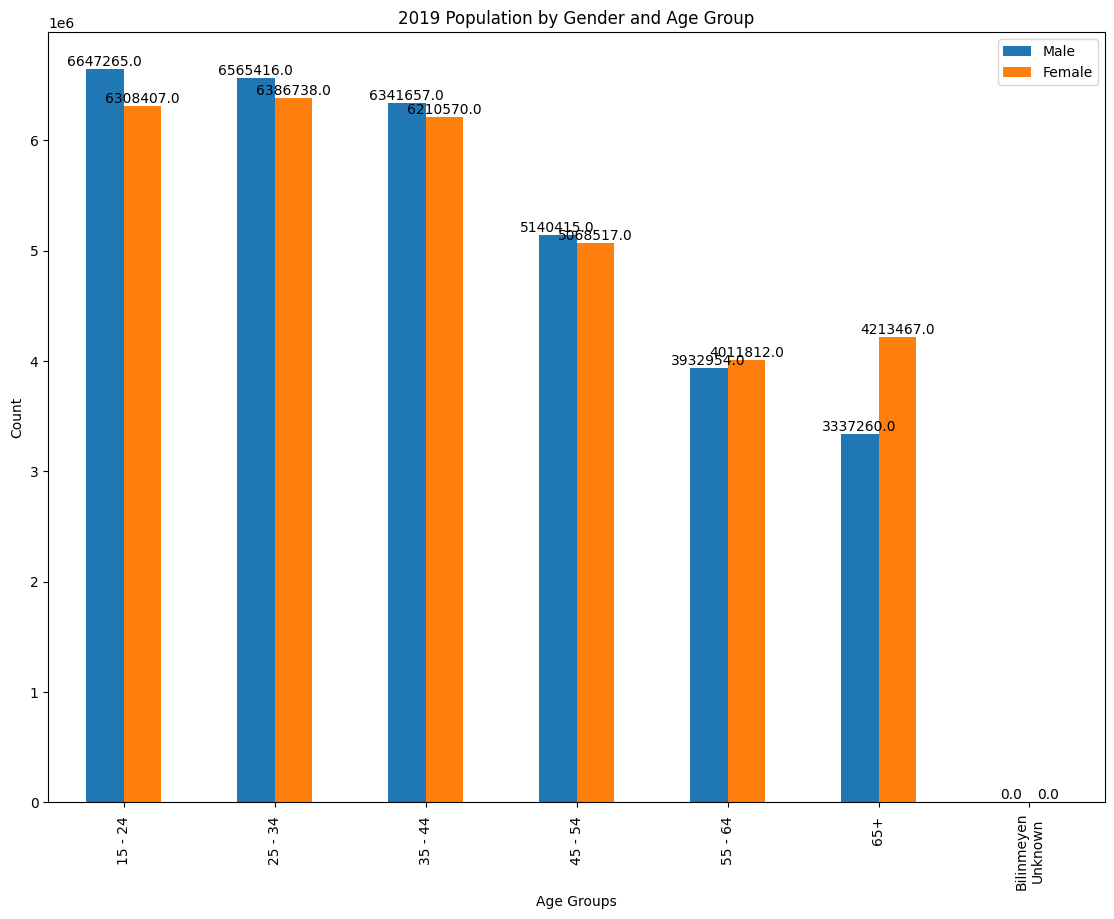

In [ ]:
 # Population by Gender and Age Group in 2019
plot_bar_graph(df2019_population, 2019)

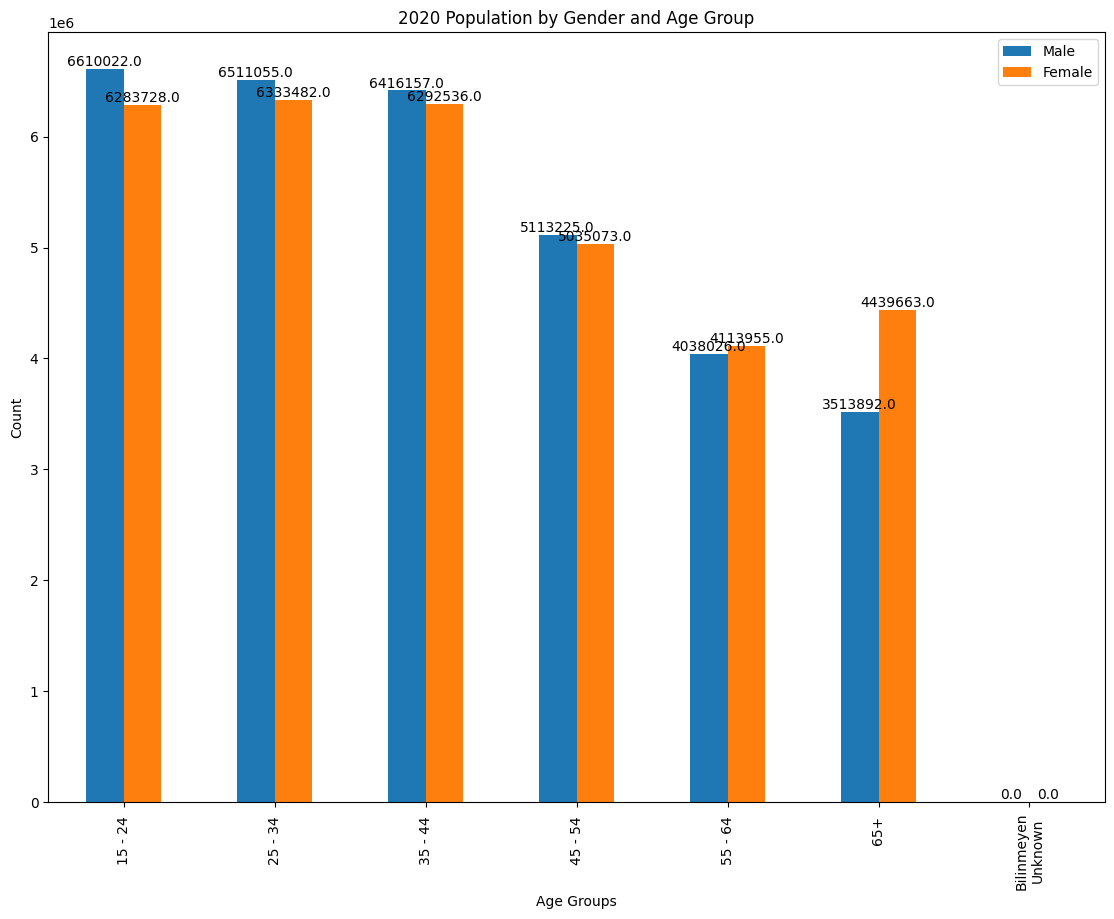

In [ ]:
 # Population by Gender and Age Group in 2020
plot_bar_graph(df2020_population, 2020)

# Forming the New Dataframe

Forming the **crime ratio by age group and crime type** dataframe with the application of aforementioned formula.

## Calculating the Crime Rates for Age Group

In [ ]:
#Calculating the crime rate values for males


#YEAR: 2020

c_value = composed2020.loc['Misdemeanor', '15 - 24 Erkek - Male']
pop_value = df2020_population.loc[1, '15 - 24 ']
cr_value_1MO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '25 - 34 Erkek - Male']
pop_value = df2020_population.loc[1, '25 - 34 ']
cr_value_2MO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '35 - 44 Erkek - Male']
pop_value = df2020_population.loc[1, '35 - 44 ']
cr_value_3MO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '45 - 54 Erkek - Male']
pop_value = df2020_population.loc[1, '45 - 54 ']
cr_value_4MO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '55 - 64 Erkek - Male']
pop_value = df2020_population.loc[1, '55 - 64 ']
cr_value_5MO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '65 + Erkek - Male']
pop_value = df2020_population.loc[1, '65+ ']
cr_value_6MO20 = c_value/pop_value *1000



c_value = composed2020.loc['Felonies', '15 - 24 Erkek - Male']
pop_value = df2020_population.loc[1, '15 - 24 ']
cr_value_1MV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '25 - 34 Erkek - Male']
pop_value = df2020_population.loc[1, '25 - 34 ']
cr_value_2MV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '35 - 44 Erkek - Male']
pop_value = df2020_population.loc[1, '35 - 44 ']
cr_value_3MV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '45 - 54 Erkek - Male']
pop_value = df2020_population.loc[1, '45 - 54 ']
cr_value_4MV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '55 - 64 Erkek - Male']
pop_value = df2020_population.loc[1, '55 - 64 ']
cr_value_5MV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '65 + Erkek - Male']
pop_value = df2020_population.loc[1, '65+ ']
cr_value_6MV20 = c_value/pop_value *1000



#YEAR: 2019

c_value = composed2019.loc['Misdemeanor', '15 - 24 Erkek - Male']
pop_value = df2019_population.loc[1, '15 - 24 ']
cr_value_1MO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '25 - 34 Erkek - Male']
pop_value = df2019_population.loc[1, '25 - 34 ']
cr_value_2MO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '35 - 44 Erkek - Male']
pop_value = df2019_population.loc[1, '35 - 44 ']
cr_value_3MO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '45 - 54 Erkek - Male']
pop_value = df2019_population.loc[1, '45 - 54 ']
cr_value_4MO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '55 - 64 Erkek - Male']
pop_value = df2019_population.loc[1, '55 - 64 ']
cr_value_5MO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '65 + Erkek - Male']
pop_value = df2019_population.loc[1, '65+ ']
cr_value_6MO19 = c_value/pop_value *1000



c_value = composed2019.loc['Felonies', '15 - 24 Erkek - Male']
pop_value = df2019_population.loc[1, '15 - 24 ']
cr_value_1MV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '25 - 34 Erkek - Male']
pop_value = df2019_population.loc[1, '25 - 34 ']
cr_value_2MV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '35 - 44 Erkek - Male']
pop_value = df2019_population.loc[1, '35 - 44 ']
cr_value_3MV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '45 - 54 Erkek - Male']
pop_value = df2019_population.loc[1, '45 - 54 ']
cr_value_4MV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '55 - 64 Erkek - Male']
pop_value = df2019_population.loc[1, '55 - 64 ']
cr_value_5MV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '65 + Erkek - Male']
pop_value = df2019_population.loc[1, '65+ ']
cr_value_6MV19 = c_value/pop_value *1000



#YEAR: 2018

c_value = composed2018.loc['Misdemeanor', '15 - 24 Erkek - Male']
pop_value = df2018_population.loc[1, '15 - 24 ']
cr_value_1MO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '25 - 34 Erkek - Male']
pop_value = df2018_population.loc[1, '25 - 34 ']
cr_value_2MO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '35 - 44 Erkek - Male']
pop_value = df2018_population.loc[1, '35 - 44 ']
cr_value_3MO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '45 - 54 Erkek - Male']
pop_value = df2018_population.loc[1, '45 - 54 ']
cr_value_4MO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '55 - 64 Erkek - Male']
pop_value = df2018_population.loc[1, '55 - 64 ']
cr_value_5MO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '65 + Erkek - Male']
pop_value = df2018_population.loc[1, '65+ ']
cr_value_6MO18 = c_value/pop_value *1000



c_value = composed2018.loc['Felonies', '15 - 24 Erkek - Male']
pop_value = df2018_population.loc[1, '15 - 24 ']
cr_value_1MV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '25 - 34 Erkek - Male']
pop_value = df2018_population.loc[1, '25 - 34 ']
cr_value_2MV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '35 - 44 Erkek - Male']
pop_value = df2018_population.loc[1, '35 - 44 ']
cr_value_3MV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '45 - 54 Erkek - Male']
pop_value = df2018_population.loc[1, '45 - 54 ']
cr_value_4MV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '55 - 64 Erkek - Male']
pop_value = df2018_population.loc[1, '55 - 64 ']
cr_value_5MV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '65 + Erkek - Male']
pop_value = df2018_population.loc[1, '65+ ']
cr_value_6MV18 = c_value/pop_value *1000



#YEAR: 2017

c_value = composed2017.loc['Misdemeanor', '15 - 24 Erkek - Male']
pop_value = df2017_population.loc[1, '15 - 24 ']
cr_value_1MO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '25 - 34 Erkek - Male']
pop_value = df2017_population.loc[1, '25 - 34 ']
cr_value_2MO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '35 - 44 Erkek - Male']
pop_value = df2017_population.loc[1, '35 - 44 ']
cr_value_3MO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '45 - 54 Erkek - Male']
pop_value = df2017_population.loc[1, '45 - 54 ']
cr_value_4MO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '55 - 64 Erkek - Male']
pop_value = df2017_population.loc[1, '55 - 64 ']
cr_value_5MO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '65 + Erkek - Male']
pop_value = df2017_population.loc[1, '65+ ']
cr_value_6MO17 = c_value/pop_value *1000



c_value = composed2017.loc['Felonies', '15 - 24 Erkek - Male']
pop_value = df2017_population.loc[1, '15 - 24 ']
cr_value_1MV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '25 - 34 Erkek - Male']
pop_value = df2017_population.loc[1, '25 - 34 ']
cr_value_2MV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '35 - 44 Erkek - Male']
pop_value = df2017_population.loc[1, '35 - 44 ']
cr_value_3MV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '45 - 54 Erkek - Male']
pop_value = df2017_population.loc[1, '45 - 54 ']
cr_value_4MV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '55 - 64 Erkek - Male']
pop_value = df2017_population.loc[1, '55 - 64 ']
cr_value_5MV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '65 + Erkek - Male']
pop_value = df2017_population.loc[1, '65+ ']
cr_value_6MV17 = c_value/pop_value *1000



#YEAR: 2016

c_value = composed2016.loc['Misdemeanor', '15 - 24 Erkek - Male']
pop_value = df2016_population.loc[1, '15 - 24 ']
cr_value_1MO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '25 - 34 Erkek - Male']
pop_value = df2016_population.loc[1, '25 - 34 ']
cr_value_2MO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '35 - 44 Erkek - Male']
pop_value = df2016_population.loc[1, '35 - 44 ']
cr_value_3MO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '45 - 54 Erkek - Male']
pop_value = df2016_population.loc[1, '45 - 54 ']
cr_value_4MO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '55 - 64 Erkek - Male']
pop_value = df2016_population.loc[1, '55 - 64 ']
cr_value_5MO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '65 + Erkek - Male']
pop_value = df2016_population.loc[1, '65+ ']
cr_value_6MO16 = c_value/pop_value *1000



c_value = composed2016.loc['Felonies', '15 - 24 Erkek - Male']
pop_value = df2016_population.loc[1, '15 - 24 ']
cr_value_1MV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '25 - 34 Erkek - Male']
pop_value = df2016_population.loc[1, '25 - 34 ']
cr_value_2MV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '35 - 44 Erkek - Male']
pop_value = df2016_population.loc[1, '35 - 44 ']
cr_value_3MV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '45 - 54 Erkek - Male']
pop_value = df2016_population.loc[1, '45 - 54 ']
cr_value_4MV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '55 - 64 Erkek - Male']
pop_value = df2016_population.loc[1, '55 - 64 ']
cr_value_5MV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '65 + Erkek - Male']
pop_value = df2016_population.loc[1, '65+ ']
cr_value_6MV16 = c_value/pop_value *1000


print(c_value, pop_value, cr_value_2MO20, cr_value_2MV20)

263.0 2919392.0 9.842951718269926 3.0271591930954354


In [ ]:
#Calculating the crime rate values for females


#YEAR: 2020

c_value = composed2020.loc['Misdemeanor', '15 - 24 Kadın - Female']
pop_value = df2020_population.loc[1, '15 - 24 ']
cr_value_1FO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '25 - 34 Kadın - Female']
pop_value = df2020_population.loc[1, '25 - 34 ']
cr_value_2FO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '35 - 44 Kadın - Female']
pop_value = df2020_population.loc[1, '35 - 44 ']
cr_value_3FO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '45 - 54 Kadın - Female']
pop_value = df2020_population.loc[1, '45 - 54 ']
cr_value_4FO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '55 - 64 Kadın - Female']
pop_value = df2020_population.loc[1, '55 - 64 ']
cr_value_5FO20 = c_value/pop_value *1000

c_value = composed2020.loc['Misdemeanor', '65 + Kadın - Female']
pop_value = df2020_population.loc[1, '65+ ']
cr_value_6FO20 = c_value/pop_value *1000



c_value = composed2020.loc['Felonies', '15 - 24 Kadın - Female']
pop_value = df2020_population.loc[1, '15 - 24 ']
cr_value_1FV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '25 - 34 Kadın - Female']
pop_value = df2020_population.loc[1, '25 - 34 ']
cr_value_2FV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '35 - 44 Kadın - Female']
pop_value = df2020_population.loc[1, '35 - 44 ']
cr_value_3FV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '45 - 54 Kadın - Female']
pop_value = df2020_population.loc[1, '45 - 54 ']
cr_value_4FV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '55 - 64 Kadın - Female']
pop_value = df2020_population.loc[1, '55 - 64 ']
cr_value_5FV20 = c_value/pop_value *1000

c_value = composed2020.loc['Felonies', '65 + Kadın - Female']
pop_value = df2020_population.loc[1, '65+ ']
cr_value_6FV20 = c_value/pop_value *1000



#YEAR: 2019

c_value = composed2019.loc['Misdemeanor', '15 - 24 Kadın - Female']
pop_value = df2019_population.loc[1, '15 - 24 ']
cr_value_1FO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '25 - 34 Kadın - Female']
pop_value = df2019_population.loc[1, '25 - 34 ']
cr_value_2FO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '35 - 44 Kadın - Female']
pop_value = df2019_population.loc[1, '35 - 44 ']
cr_value_3FO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '45 - 54 Kadın - Female']
pop_value = df2019_population.loc[1, '45 - 54 ']
cr_value_4FO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '55 - 64 Kadın - Female']
pop_value = df2019_population.loc[1, '55 - 64 ']
cr_value_5FO19 = c_value/pop_value *1000

c_value = composed2019.loc['Misdemeanor', '65 + Kadın - Female']
pop_value = df2019_population.loc[1, '65+ ']
cr_value_6FO19 = c_value/pop_value *1000



c_value = composed2019.loc['Felonies', '15 - 24 Kadın - Female']
pop_value = df2019_population.loc[1, '15 - 24 ']
cr_value_1FV19= c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '25 - 34 Kadın - Female']
pop_value = df2019_population.loc[1, '25 - 34 ']
cr_value_2FV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '35 - 44 Kadın - Female']
pop_value = df2019_population.loc[1, '35 - 44 ']
cr_value_3FV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '45 - 54 Kadın - Female']
pop_value = df2019_population.loc[1, '45 - 54 ']
cr_value_4FV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '55 - 64 Kadın - Female']
pop_value = df2019_population.loc[1, '55 - 64 ']
cr_value_5FV19 = c_value/pop_value *1000

c_value = composed2019.loc['Felonies', '65 + Kadın - Female']
pop_value = df2019_population.loc[1, '65+ ']
cr_value_6FV19 = c_value/pop_value *1000



#YEAR: 2018

c_value = composed2018.loc['Misdemeanor', '15 - 24 Kadın - Female']
pop_value = df2018_population.loc[1, '15 - 24 ']
cr_value_1FO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '25 - 34 Kadın - Female']
pop_value = df2018_population.loc[1, '25 - 34 ']
cr_value_2FO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '35 - 44 Kadın - Female']
pop_value = df2018_population.loc[1, '35 - 44 ']
cr_value_3FO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '45 - 54 Kadın - Female']
pop_value = df2018_population.loc[1, '45 - 54 ']
cr_value_4FO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '55 - 64 Kadın - Female']
pop_value = df2018_population.loc[1, '55 - 64 ']
cr_value_5FO18 = c_value/pop_value *1000

c_value = composed2018.loc['Misdemeanor', '65 + Kadın - Female']
pop_value = df2018_population.loc[1, '65+ ']
cr_value_6FO18 = c_value/pop_value *1000



c_value = composed2018.loc['Felonies', '15 - 24 Kadın - Female']
pop_value = df2018_population.loc[1, '15 - 24 ']
cr_value_1FV18= c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '25 - 34 Kadın - Female']
pop_value = df2018_population.loc[1, '25 - 34 ']
cr_value_2FV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '35 - 44 Kadın - Female']
pop_value = df2018_population.loc[1, '35 - 44 ']
cr_value_3FV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '45 - 54 Kadın - Female']
pop_value = df2018_population.loc[1, '45 - 54 ']
cr_value_4FV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '55 - 64 Kadın - Female']
pop_value = df2018_population.loc[1, '55 - 64 ']
cr_value_5FV18 = c_value/pop_value *1000

c_value = composed2018.loc['Felonies', '65 + Kadın - Female']
pop_value = df2018_population.loc[1, '65+ ']
cr_value_6FV18 = c_value/pop_value *1000



#YEAR: 2017

c_value = composed2017.loc['Misdemeanor', '15 - 24 Kadın - Female']
pop_value = df2017_population.loc[1, '15 - 24 ']
cr_value_1FO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '25 - 34 Kadın - Female']
pop_value = df2017_population.loc[1, '25 - 34 ']
cr_value_2FO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '35 - 44 Kadın - Female']
pop_value = df2017_population.loc[1, '35 - 44 ']
cr_value_3FO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '45 - 54 Kadın - Female']
pop_value = df2017_population.loc[1, '45 - 54 ']
cr_value_4FO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '55 - 64 Kadın - Female']
pop_value = df2017_population.loc[1, '55 - 64 ']
cr_value_5FO17 = c_value/pop_value *1000

c_value = composed2017.loc['Misdemeanor', '65 + Kadın - Female']
pop_value = df2017_population.loc[1, '65+ ']
cr_value_6FO17 = c_value/pop_value *1000



c_value = composed2017.loc['Felonies', '15 - 24 Kadın - Female']
pop_value = df2017_population.loc[1, '15 - 24 ']
cr_value_1FV17= c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '25 - 34 Kadın - Female']
pop_value = df2017_population.loc[1, '25 - 34 ']
cr_value_2FV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '35 - 44 Kadın - Female']
pop_value = df2017_population.loc[1, '35 - 44 ']
cr_value_3FV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '45 - 54 Kadın - Female']
pop_value = df2017_population.loc[1, '45 - 54 ']
cr_value_4FV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '55 - 64 Kadın - Female']
pop_value = df2017_population.loc[1, '55 - 64 ']
cr_value_5FV17 = c_value/pop_value *1000

c_value = composed2017.loc['Felonies', '65 + Kadın - Female']
pop_value = df2017_population.loc[1, '65+ ']
cr_value_6FV17 = c_value/pop_value *1000




#YEAR: 2016

c_value = composed2016.loc['Misdemeanor', '15 - 24 Kadın - Female']
pop_value = df2016_population.loc[1, '15 - 24 ']
cr_value_1FO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '25 - 34 Kadın - Female']
pop_value = df2016_population.loc[1, '25 - 34 ']
cr_value_2FO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '35 - 44 Kadın - Female']
pop_value = df2016_population.loc[1, '35 - 44 ']
cr_value_3FO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '45 - 54 Kadın - Female']
pop_value = df2016_population.loc[1, '45 - 54 ']
cr_value_4FO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '55 - 64 Kadın - Female']
pop_value = df2016_population.loc[1, '55 - 64 ']
cr_value_5FO16 = c_value/pop_value *1000

c_value = composed2016.loc['Misdemeanor', '65 + Kadın - Female']
pop_value = df2016_population.loc[1, '65+ ']
cr_value_6FO16 = c_value/pop_value *1000



c_value = composed2016.loc['Felonies', '15 - 24 Kadın - Female']
pop_value = df2016_population.loc[1, '15 - 24 ']
cr_value_1FV16= c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '25 - 34 Kadın - Female']
pop_value = df2016_population.loc[1, '25 - 34 ']
cr_value_2FV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '35 - 44 Kadın - Female']
pop_value = df2016_population.loc[1, '35 - 44 ']
cr_value_3FV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '45 - 54 Kadın - Female']
pop_value = df2016_population.loc[1, '45 - 54 ']
cr_value_4FV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '55 - 64 Kadın - Female']
pop_value = df2016_population.loc[1, '55 - 64 ']
cr_value_5FV16 = c_value/pop_value *1000

c_value = composed2016.loc['Felonies', '65 + Kadın - Female']
pop_value = df2016_population.loc[1, '65+ ']
cr_value_6FV16 = c_value/pop_value *1000




print(c_value, pop_value, cr_value_2FO20, cr_value_2FV20)

9.0 2919392.0 0.48133520604571767 0.07832832006487428


## Filling Out the Dataframe

In [ ]:
c_df_2020 = pd.DataFrame({
    'Crime Type': ['Violent Crimes', 'Other Crimes'],
    'Male (15-24)': [cr_value_1MV20, cr_value_1MO20],
    'Female (15-24)': [cr_value_1FV20, cr_value_1FO20],
    'Male (25-34)': [cr_value_2MV20, cr_value_2MO20],
    'Female (25-34)': [cr_value_2FV20, cr_value_2FO20],
    'Male (35-44)': [cr_value_3MV20, cr_value_3MO20],
    'Female (35-44)': [cr_value_3FV20, cr_value_3FO20],
    'Male (45-54)': [cr_value_4MV20, cr_value_4MO20],
    'Female (45-54)': [cr_value_4FV20, cr_value_4FO20],
    'Male (55-64)': [cr_value_5MV20, cr_value_5MO20],
    'Female (55-64)': [cr_value_5FV20, cr_value_5FO20],
    'Male (65+)': [cr_value_6MV20, cr_value_6MO20],
    'Female (65+)': [cr_value_6FV20, cr_value_6FO20],
}).set_index('Crime Type')



c_df_2019 = pd.DataFrame({
    'Crime Type': ['Violent Crimes', 'Other Crimes'],
    'Male (15-24)': [cr_value_1MV19, cr_value_1MO19],
    'Female (15-24)': [cr_value_1FV19, cr_value_1FO19],
    'Male (25-34)': [cr_value_2MV19, cr_value_2MO19],
    'Female (25-34)': [cr_value_2FV19, cr_value_2FO19],
    'Male (35-44)': [cr_value_3MV19, cr_value_3MO19],
    'Female (35-44)': [cr_value_3FV19, cr_value_3FO19],
    'Male (45-54)': [cr_value_4MV19, cr_value_4MO19],
    'Female (45-54)': [cr_value_4FV19, cr_value_4FO19],
    'Male (55-64)': [cr_value_5MV19, cr_value_5MO19],
    'Female (55-64)': [cr_value_5FV19, cr_value_5FO19],
    'Male (65+)': [cr_value_6MV19, cr_value_6MO19],
    'Female (65+)': [cr_value_6FV19, cr_value_6FO19],
}).set_index('Crime Type')



c_df_2018 = pd.DataFrame({
    'Crime Type': ['Violent Crimes', 'Other Crimes'],
    'Male (15-24)': [cr_value_1MV18, cr_value_1MO18],
    'Female (15-24)': [cr_value_1FV18, cr_value_1FO18],
    'Male (25-34)': [cr_value_2MV18, cr_value_2MO18],
    'Female (25-34)': [cr_value_2FV18, cr_value_2FO18],
    'Male (35-44)': [cr_value_3MV18, cr_value_3MO18],
    'Female (35-44)': [cr_value_3FV18, cr_value_3FO18],
    'Male (45-54)': [cr_value_4MV18, cr_value_4MO18],
    'Female (45-54)': [cr_value_4FV18, cr_value_4FO18],
    'Male (55-64)': [cr_value_5MV18, cr_value_5MO18],
    'Female (55-64)': [cr_value_5FV18, cr_value_5FO18],
    'Male (65+)': [cr_value_6MV18, cr_value_6MO18],
    'Female (65+)': [cr_value_6FV18, cr_value_6FO18],
}).set_index('Crime Type')



c_df_2017 = pd.DataFrame({
    'Crime Type': ['Violent Crimes', 'Other Crimes'],
    'Male (15-24)': [cr_value_1MV17, cr_value_1MO17],
    'Female (15-24)': [cr_value_1FV17, cr_value_1FO17],
    'Male (25-34)': [cr_value_2MV17, cr_value_2MO17],
    'Female (25-34)': [cr_value_2FV17, cr_value_2FO17],
    'Male (35-44)': [cr_value_3MV17, cr_value_3MO17],
    'Female (35-44)': [cr_value_3FV17, cr_value_3FO17],
    'Male (45-54)': [cr_value_4MV17, cr_value_4MO17],
    'Female (45-54)': [cr_value_4FV17, cr_value_4FO17],
    'Male (55-64)': [cr_value_5MV17, cr_value_5MO17],
    'Female (55-64)': [cr_value_5FV17, cr_value_5FO17],
    'Male (65+)': [cr_value_6MV17, cr_value_6MO17],
    'Female (65+)': [cr_value_6FV17, cr_value_6FO17],
}).set_index('Crime Type')



c_df_2016 = pd.DataFrame({
    'Crime Type': ['Violent Crimes', 'Other Crimes'],
    'Male (15-24)': [cr_value_1MV16, cr_value_1MO16],
    'Female (15-24)': [cr_value_1FV16, cr_value_1FO16],
    'Male (25-34)': [cr_value_2MV16, cr_value_2MO16],
    'Female (25-34)': [cr_value_2FV16, cr_value_2FO16],
    'Male (35-44)': [cr_value_3MV16, cr_value_3MO16],
    'Female (35-44)': [cr_value_3FV16, cr_value_3FO16],
    'Male (45-54)': [cr_value_4MV16, cr_value_4MO16],
    'Female (45-54)': [cr_value_4FV16, cr_value_4FO16],
    'Male (55-64)': [cr_value_5MV16, cr_value_5MO16],
    'Female (55-64)': [cr_value_5FV16, cr_value_5FO16],
    'Male (65+)': [cr_value_6MV16, cr_value_6MO16],
    'Female (65+)': [cr_value_6FV16, cr_value_6FO16],
}).set_index('Crime Type')


c_df_2020.head()

,Male (15-24),Female (15-24),Male (25-34),Female (25-34),Male (35-44),Female (35-44),Male (45-54),Female (45-54),Male (55-64),Female (55-64),Male (65+),Female (65+)
Crime Type,,,,,,,,,,,,
Violent Crimes,2.203018,0.046142,3.027159,0.078328,1.922802,0.056732,1.098915,0.030705,0.454182,0.012135,0.116111,0.001992
Other Crimes,8.408898,0.362480,9.842952,0.481335,6.920186,0.344131,3.993761,0.187162,1.511382,0.070579,0.294261,0.018498


In [ ]:
c_df_2019.head()

,Male (15-24),Female (15-24),Male (25-34),Female (25-34),Male (35-44),Female (35-44),Male (45-54),Female (45-54),Male (55-64),Female (55-64),Male (65+),Female (65+)
Crime Type,,,,,,,,,,,,
Violent Crimes,2.218055,0.046937,2.723361,0.072196,1.816402,0.053771,1.040383,0.030931,0.463519,0.011188,0.118061,0.003596
Other Crimes,9.858190,0.414607,11.073480,0.502177,7.669131,0.377188,4.320274,0.211851,1.613037,0.086449,0.318824,0.016780


# Statistical Analysis With the Crime Ratio Data

In [ ]:

import matplotlib.pyplot as plt

def plot_crime_ratios(c_df):
    # df_copy created to store the whole dataframe
    df_copy = c_df.copy()

    # SUC1 only gets males in new_df 
    SUC1 = df_copy.iloc[:, 0::2]

    # Transpose the DataFrame
    SUC1 = SUC1.T

    # Plotting a bar graph
    ax1 = plt.subplot(1, 2, 1)
    SUC1.plot.bar(ax=ax1)

    # Set the labels and title
    plt.xlabel("Age Groups")
    plt.ylabel("Rate")
    plt.title(f"Crime Rates by Age Group (Male)(per 1000 people)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add data labels to the bars
    for p in ax1.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax1.annotate(f"{y:.3f}", (x, y), ha='center', va='bottom')

    # Adjust the size of the plot
    plt.rcParams["figure.figsize"] = (15, 10)

    # Code 2

    # SUC2 only gets females in new_df 
    SUC2 = df_copy.iloc[:, 1::2]

    # Transpose the DataFrame
    SUC2 = SUC2.T

    # Plotting a bar graph
    ax2 = plt.subplot(1, 2, 2)
    SUC2.plot.bar(ax=ax2)

    # Set the labels and title
    plt.xlabel("Age Groups")
    plt.ylabel("Rate")
    plt.title(f"Crime Rates by Age Group (Female)(per 1000 people)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    # Add data labels to the bars
    for p in ax2.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax2.annotate(f"{y:.3f}", (x, y), ha='center', va='bottom')

    # Adjust the size of the plot
    plt.rcParams["figure.figsize"] = (15, 10)

    # Display the plots
    plt.tight_layout()
    plt.show()

## Crime Rate by Gender and Age Group Graphs from 2016-2020

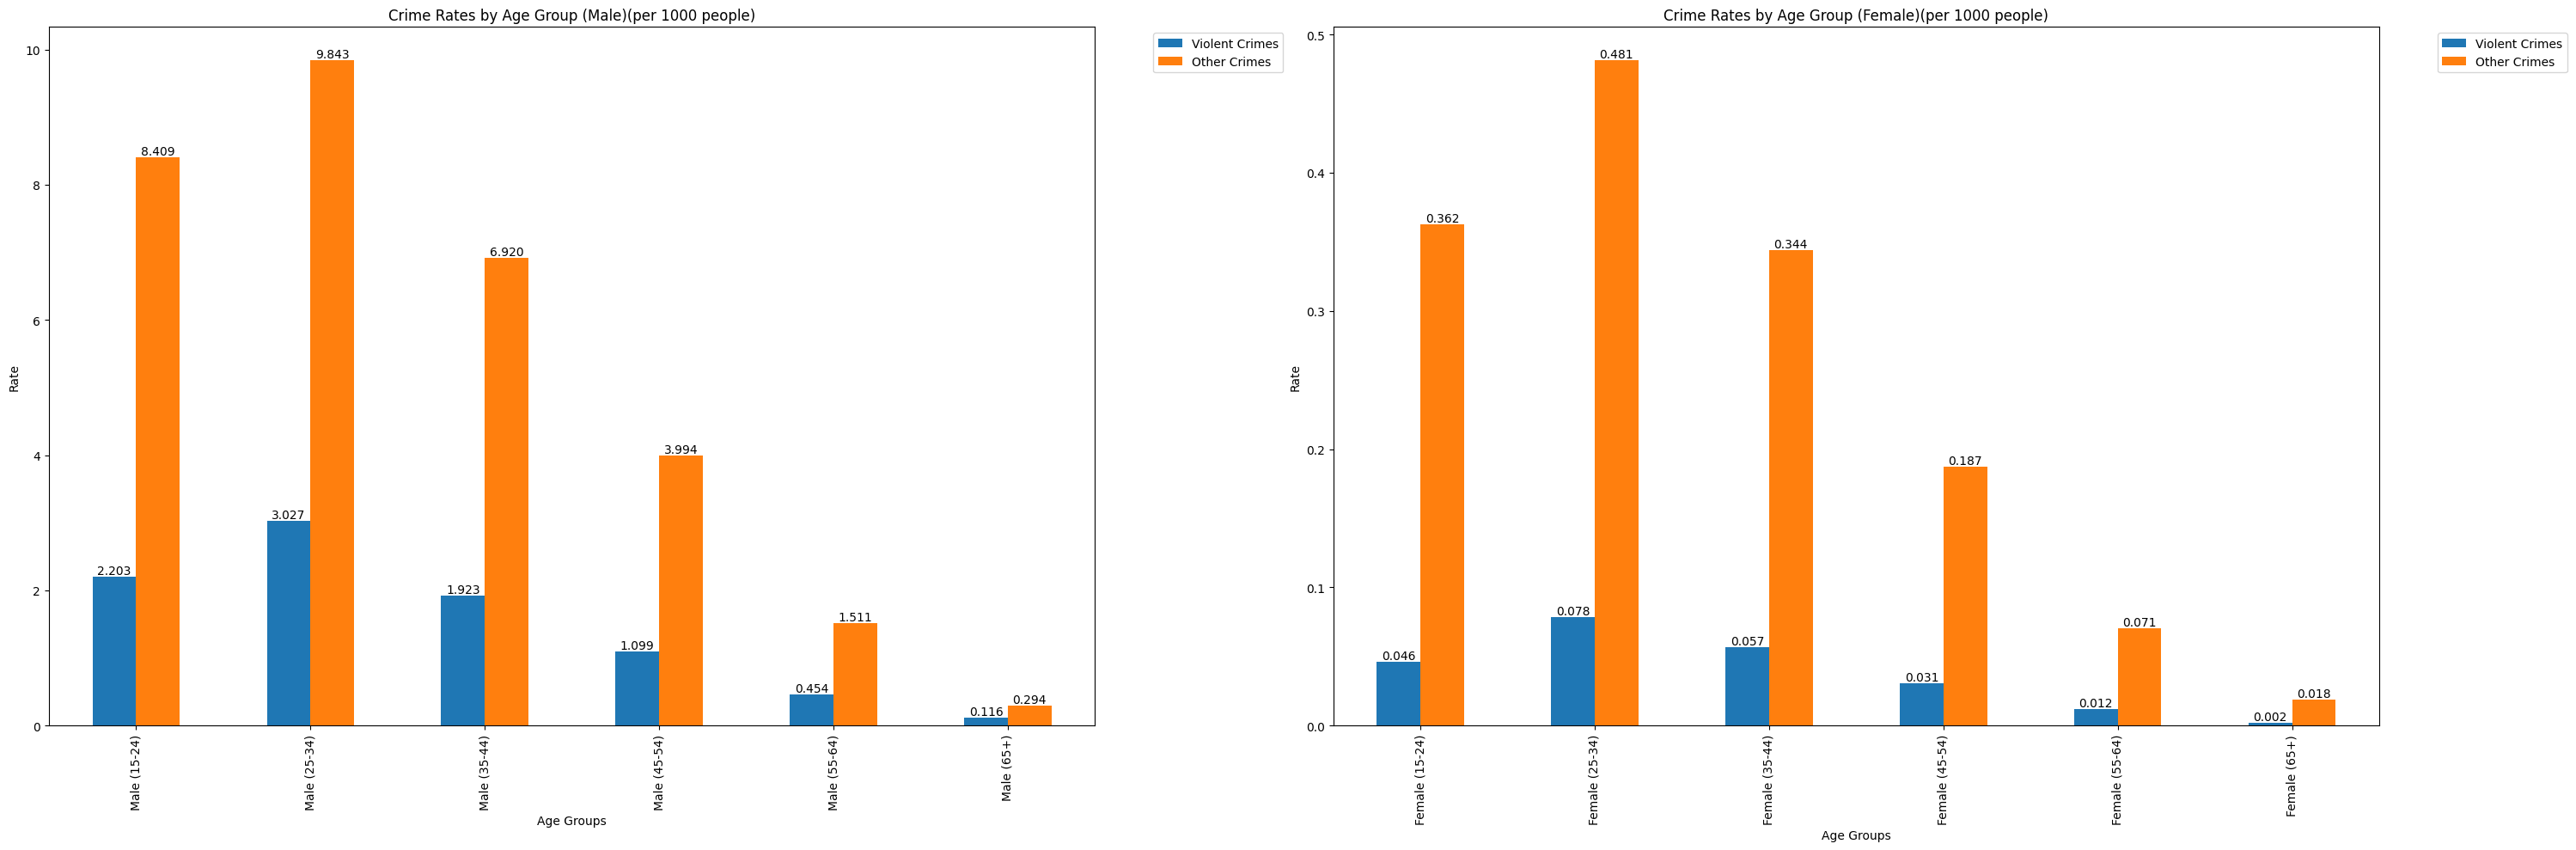

In [ ]:
plot_crime_ratios(c_df_2020)

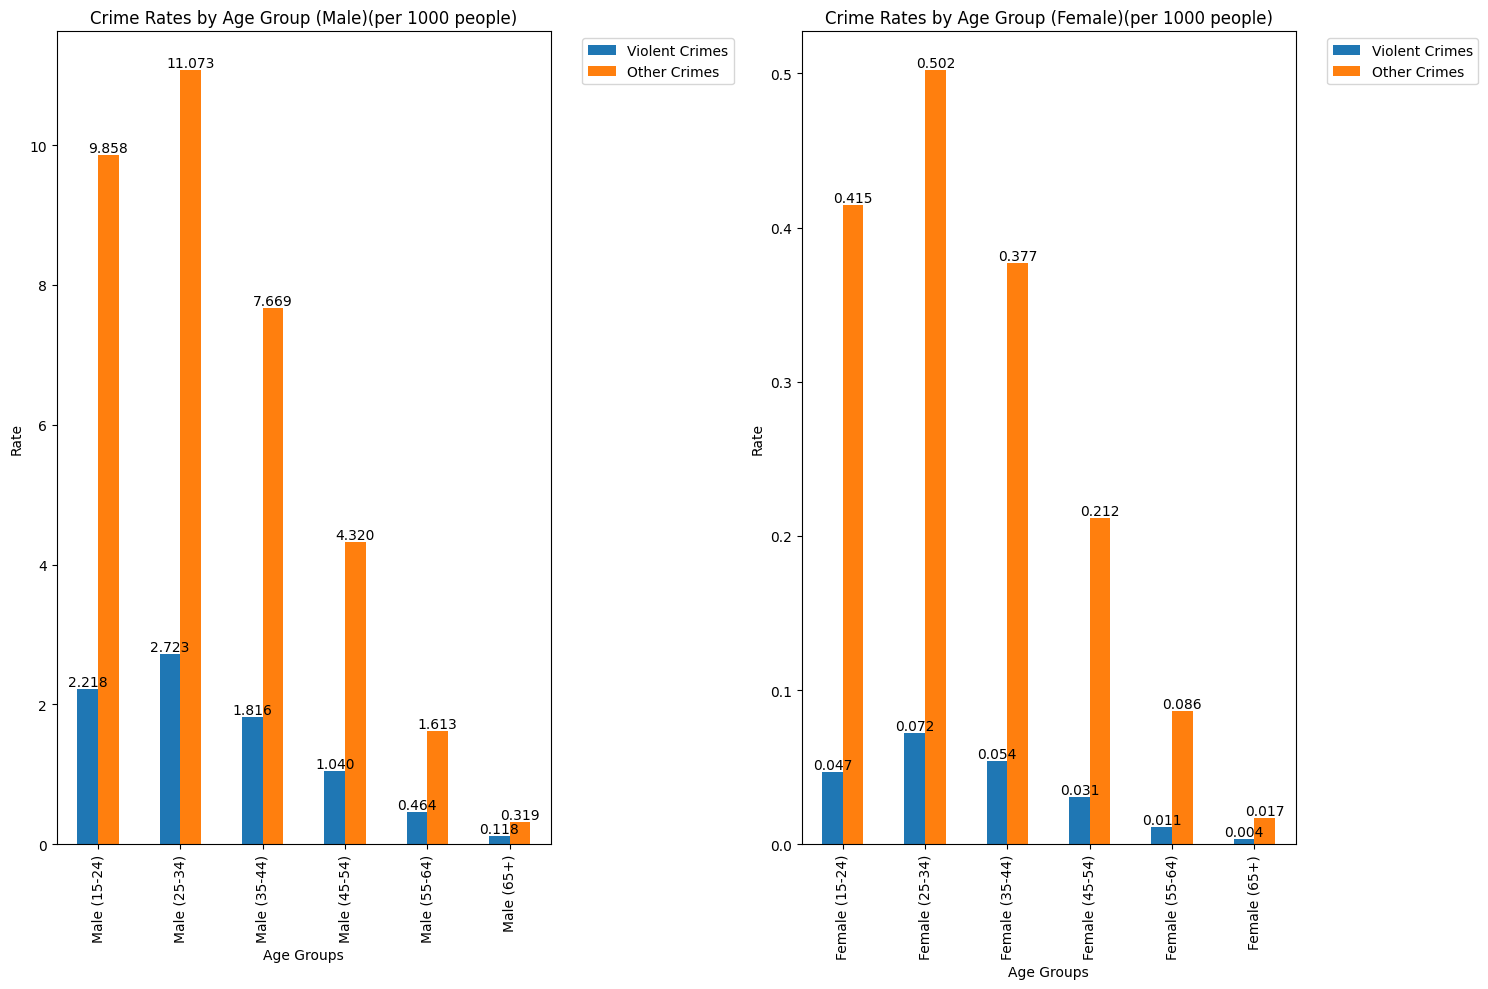

In [ ]:
plot_crime_ratios(c_df_2019)

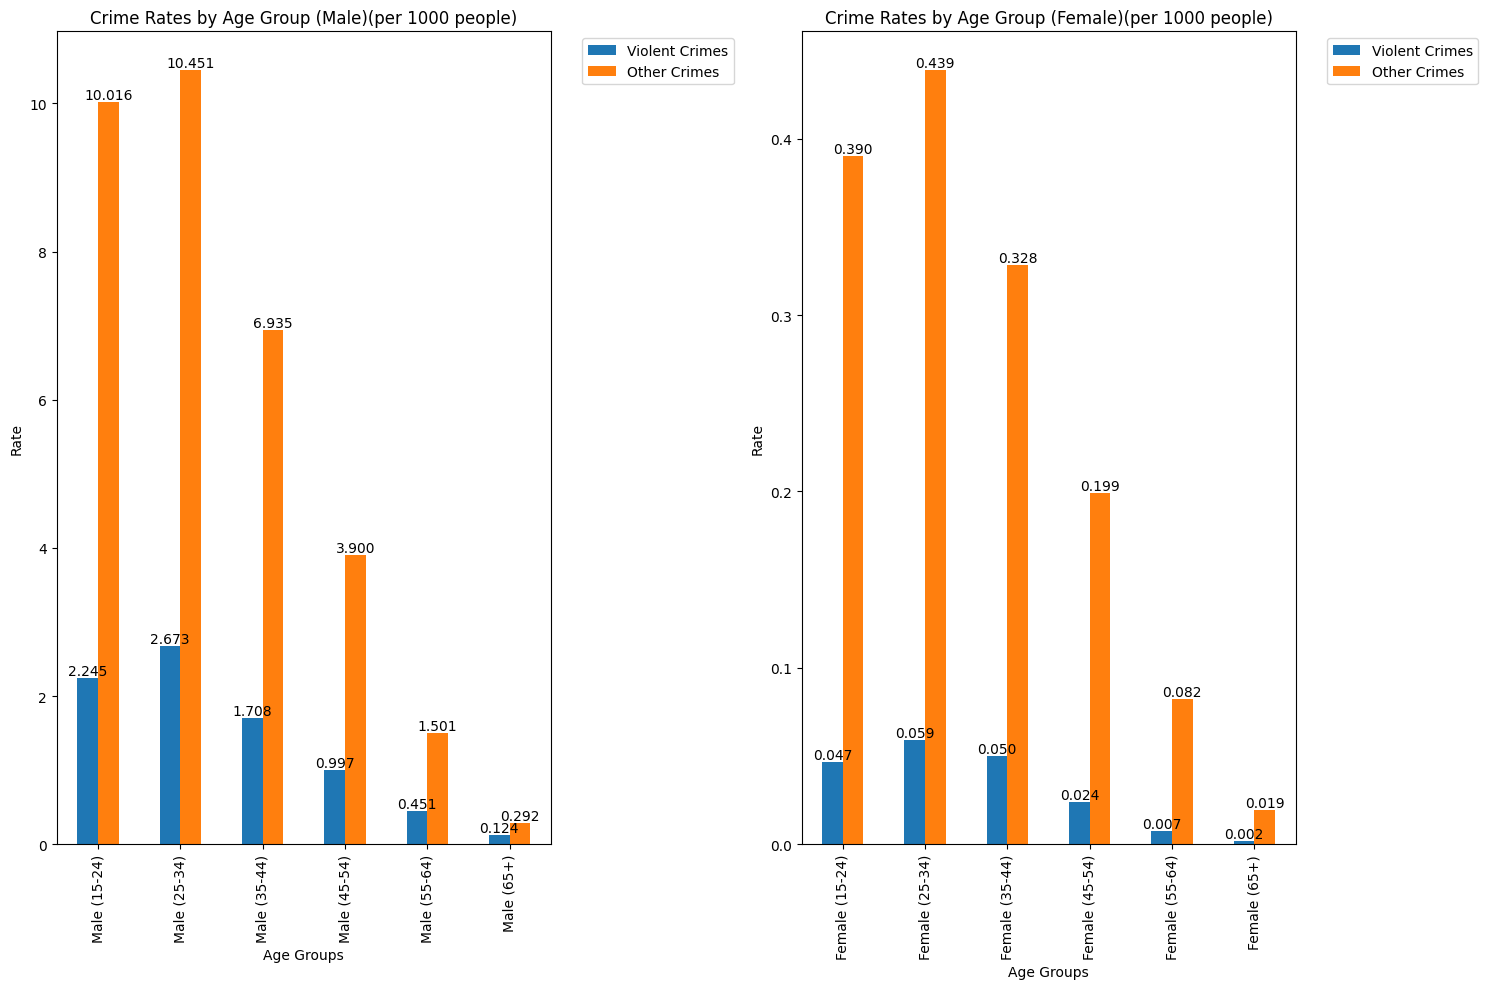

In [ ]:
plot_crime_ratios(c_df_2018)

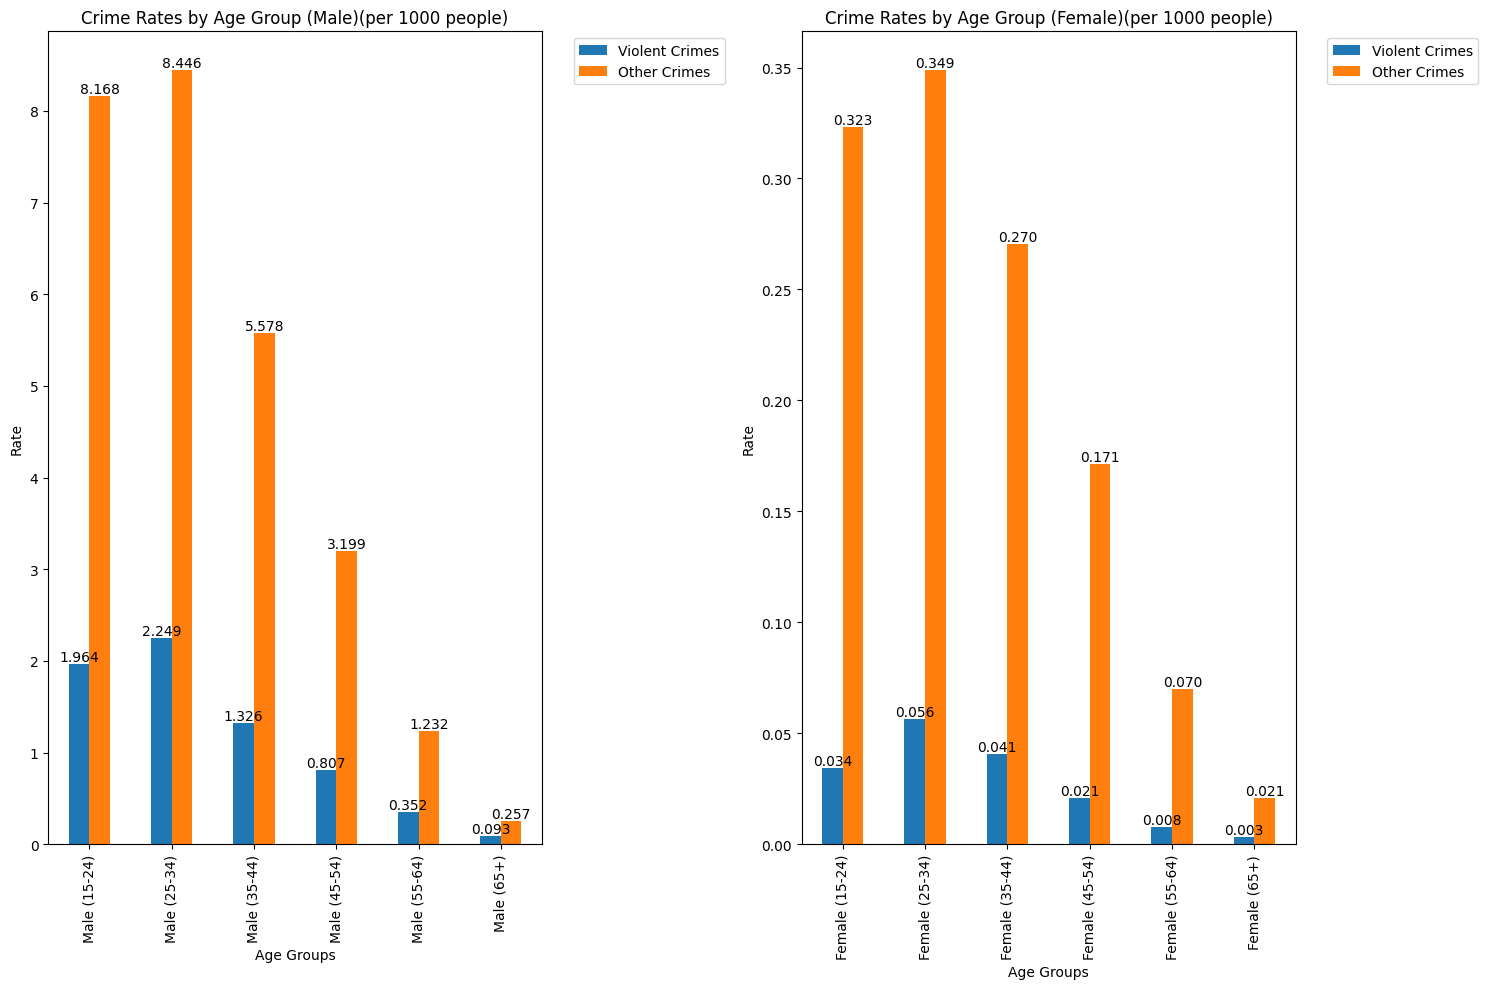

In [ ]:
plot_crime_ratios(c_df_2017)

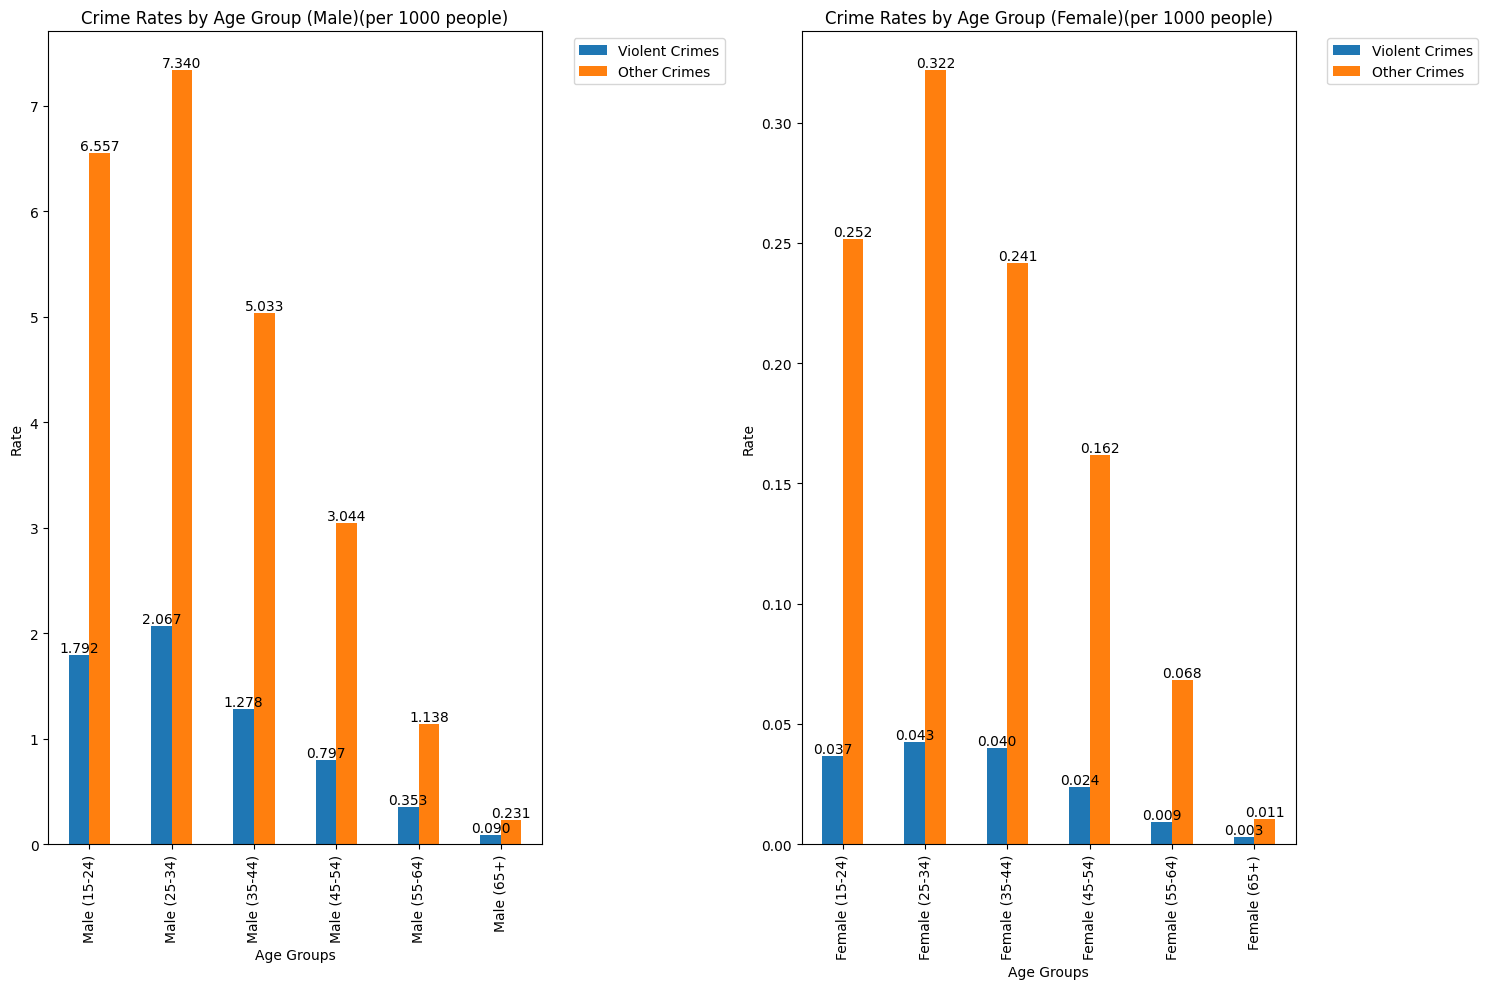

In [ ]:
plot_crime_ratios(c_df_2016)

In [ ]:
print("Crime Ratio Relationship Between Men and Women on 'Violent Crimes' (Men/Woman):",
      round(2.2/0.05, 1),
      round(3.07/0.08, 1),
      round(1.92/0.06, 1),
      round(1.10/0.03, 1),
      round(0.45/0.01, 1),
      round(0.11/0.002, 1))

print("Crime Ratio Relationship Between Men and Women on 'Other Crimes' (Men/Woman):",
      round(8.41/0.36, 1),
      round(9.84/0.48, 1),
      round(6.92/0.34, 1),
      round(3.99/0.19, 1),
      round(1.51/0.07, 1),
      round(0.29/0.02, 1))

Crime Ratio Relationship Between Men and Women on 'Violent Crimes' (Men/Woman): 44.0 38.4 32.0 36.7 45.0 55.0
Crime Ratio Relationship Between Men and Women on 'Other Crimes' (Men/Woman): 23.4 20.5 20.4 21.0 21.6 14.5


# Exploring the Effect of Other Parameters

In [ ]:
df_age_gender.head()

,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female
Total,1528,74,8374,258,61782,2443,83871,3645,56812,2576,26091,1114,7960,334,1446,73
Homicide,32,1,320,2,1580,44,1817,56,1203,38,619,18,272,3,71,2
Assault,19,0,329,11,9105,191,15037,388,9413,285,4087,114,1197,38,223,5
Sexual crimes,174,1,393,4,1073,6,1273,7,952,7,618,4,289,0,88,0
Kidnapping,69,0,281,8,1481,39,1583,59,769,34,295,21,76,8,26,0


In [ ]:
df_education_2020_total_only.head()

,Illiterate,Literate but not graduated,Primary School,Primary Education,Junior highschool Level,Highschool Level,Higher Education
Crime Type,,,,,,,
Total,1655.0,8667,35388,46297,81041,62733,20333


In [ ]:
#Getting the total number of crimes only
df_age_for_heatmap_total =  df_age_for_heatmap.iloc[0:1]
df_age_for_heatmap_total.head()

,12 - 14,15 - 17,18 - 24,25 - 34,35 - 44,45 - 54,55 - 64,65 +
Total,1602,8632,64225,87516,59388,27205,8294,1519


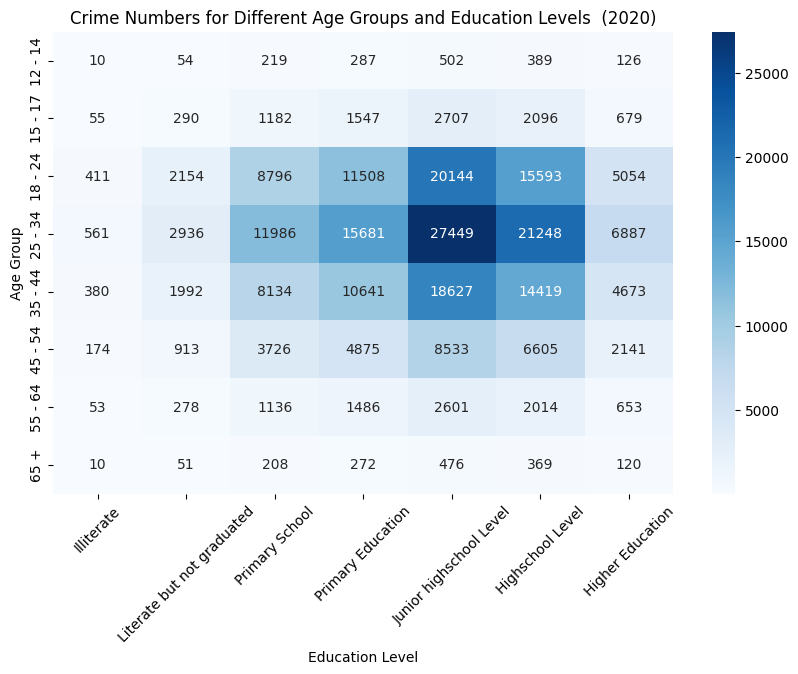

In [ ]:
#Since we have two distinct dataframes for the same sample, heatmap is 
#a good plot type to see where the sample is intense.
import numpy as np
# Extract the crime numbers for age groups and education levels
age_groups = df_age_for_heatmap_total.columns
education_levels = df_education_2020_total_only.columns
crime_numbers = np.zeros((len(age_groups), len(education_levels)))

total_value = df_age_for_heatmap_total.loc['Total'].sum()

for i, age_group in enumerate(age_groups):
    for j, education_level in enumerate(education_levels):
        crime_numbers[i, j] = (df_age_for_heatmap_total[age_group].values[0]/total_value) * df_education_2020_total_only[education_level].values[0]

# Create a DataFrame for the crime numbers
crime_df = pd.DataFrame(crime_numbers, index=age_groups, columns=education_levels)

# Plotting the heat map
plt.figure(figsize=(10, 6))
sns.heatmap(crime_df, cmap='Blues', annot=True, fmt='.0f')
plt.xlabel('Education Level')
plt.ylabel('Age Group')
plt.title('Crime Numbers for Different Age Groups and Education Levels  (2020)')
plt.xticks(rotation=45)
plt.show()

# Conducting Hypothesis Testing

In [ ]:
import math
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [ ]:
# Returns mean
def findMean(data):
  return sum(data/len(data))

# Returns variance
def findVar(i ,df_year):
  data = df_year[i]
  return sum([(i-findMean(data)) ** 2 for i in data]) / len(data)


datas = [c_df_2016.transpose(), c_df_2017.transpose(), c_df_2018.transpose(), c_df_2019.transpose(), c_df_2020.transpose()]
contingency_table = pd.crosstab(c_df_2020['Male (15-24)'], c_df_2020['Male (25-34)'])


In [ ]:
print("Mean Values:")
for i in range(5):
  meanViolent = findMean(datas[i]['Violent Crimes'])
  formatted_Violent = "{:.3f}".format(meanViolent)
  meanOther = findMean(datas[i]['Other Crimes'])
  formatted_Other = "{:.3f}".format(meanOther)

  print(str(2016+i))
  print("Violent Crimes: " + formatted_Violent)
  print("Other Crimes: " + formatted_Other + "\n")

Mean Values:
2016
Violent Crimes: 0.544
Other Crimes: 2.033

2017
Violent Crimes: 0.580
Other Crimes: 2.340

2018
Violent Crimes: 0.699
Other Crimes: 2.879

2019
Violent Crimes: 0.717
Other Crimes: 3.038

2020
Violent Crimes: 0.754
Other Crimes: 2.703



In [ ]:
print("Variance Values: ")
for i in range(5):
  varViolent = findVar("Violent Crimes", datas[i])
  formatted_Violent = "{:.3f}".format(varViolent)
  varOther = findVar("Other Crimes", datas[i])
  formatted_Other = "{:.3f}".format(varOther)

  print(str(2016+i))
  print("Violent Crimes: " + formatted_Violent)
  print("Other Crimes: " + formatted_Other + "\n")

Variance Values: 
2016
Violent Crimes: 0.528
Other Crimes: 6.955

2017
Violent Crimes: 0.620
Other Crimes: 9.632

2018
Violent Crimes: 0.872
Other Crimes: 14.682

2019
Violent Crimes: 0.900
Other Crimes: 15.818

2020
Violent Crimes: 1.028
Other Crimes: 12.221



In [ ]:
print("Standard Distribution Values: ")
for i in range(5):
  stdViolent = math.sqrt(findVar("Violent Crimes", datas[i]))
  formatted_Violent = "{:.3f}".format(stdViolent)
  stdOther = math.sqrt(findVar("Other Crimes", datas[i]))
  formatted_Other = "{:.3f}".format(stdOther)

  print(str(2016+i))
  print("Violent Crimes: " + formatted_Violent)
  print("Other Crimes: " + formatted_Other + "\n")

Standard Distribution Values: 
2016
Violent Crimes: 0.727
Other Crimes: 2.637

2017
Violent Crimes: 0.787
Other Crimes: 3.104

2018
Violent Crimes: 0.934
Other Crimes: 3.832

2019
Violent Crimes: 0.949
Other Crimes: 3.977

2020
Violent Crimes: 1.014
Other Crimes: 3.496



In [ ]:
# Create the observed contingency table for the 2020 data
observed = np.array([[2.203018, 0.046142, 3.027159, 0.078328, 1.922802, 0.056732, 1.098915, 0.030705, 0.454182, 0.012135, 0.116111, 0.001992],
                     [8.408898, 0.362480, 9.842952, 0.481335, 6.920186, 0.344131, 3.993761, 0.187162, 1.511382, 0.070579, 0.294261, 0.018498]])

# Chi-square test
chi2, p, dof, expected = stats.chi2_contingency(observed)

# Print the test statistic and p-value
print("Chi-square test statistic:", chi2)
print("P-value:", p)

Chi-square test statistic: 0.11335368421194193
P-value: 0.9999999995390051


In [ ]:
alpha = 0.05  # Set the significance level

if p < alpha:
    print("Reject H0. Age and likelihood of committing a crime are significantly associated.")
else:
    print("Fail to reject H0. There is not enough evidence to conclude that age and likelihood of committing a crime are associated.")


Fail to reject H0. There is not enough evidence to conclude that age and likelihood of committing a crime are associated.


# Machine Learning

In [ ]:
df_combine_list = [df2016, df2017, df2018, df2019, df2020]
year_list = [ '2016', '2017', '2018', '2019', '2020']

# Concatenate all of year dataframes
df_all_year = pd.concat([df_temp.assign(Year=year) for df_temp, year in zip(df_combine_list, year_list)], axis=0) 
df_all_year.reset_index(inplace=True)
df_all_year.rename(columns = {'index':'Crime Type'}, inplace = True)
df_all_year.head()

,Crime Type,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female,Year
0,Total,1259,32,7701,209,47810.0,1707,60619.0,2349,38555.0,1719,18412.0,889,5207,271,938,40,2016
1,Homicide,46,2,412,12,2076.0,49,2544.0,44,1244.0,38,645.0,11,257,6,58,0,2016
2,Assault,33,0,325,1,5870.0,129,8300.0,184,5240.0,162,2451.0,73,683,17,111,7,2016
3,Sexual crimes,238,0,668,5,1438.0,7,1383.0,13,863.0,17,538.0,9,239,2,86,0,2016
4,Kidnapping,18,0,105,4,1022.0,36,1091.0,34,460.0,27,185.0,21,55,7,8,2,2016


In [ ]:
from sklearn.linear_model import LinearRegression
import warnings

# Create an empty dataframe to hold the predictions
df_next_3_years = pd.DataFrame()

# Get a list of unique crime types
crime_types = df_all_year['Crime Type'].unique()

with warnings.catch_warnings():
    # This will ignore all warning messages
    warnings.simplefilter("ignore")
    # Loop over the crime types
    for crime in crime_types:
        # Filter the dataset to include only rows where 'Crime Type' is the current crime type
        df_crime = df_all_year[df_all_year['Crime Type'] == crime]

        # Sum across the demographic groups to get the total number of crimes of this type in each year
        df_crime['Total'] = df_crime.iloc[:, 2:-1].sum(axis=1)

        # Keep only the 'Year' and 'Total' columns
        df_crime = df_crime[['Year', 'Total']]

        # Create a Linear Regression model
        model = LinearRegression()

        # Fit the model to the data
        model.fit(df_crime[['Year']], df_crime['Total'])

        # Predict the number of crimes of this type in 2021, 2022, and 2023
        predictions = model.predict([[2021], [2022], [2023]])

        # Append the predictions to the dataframe
        df_next_3_years[crime] = predictions

# Transpose the dataframe so that the crime types are rows and the years are columns
df_next_3_years = df_next_3_years.T

# Set the column names
df_next_3_years.columns = [2021, 2022, 2023]

df_next_3_years.head().round()


,2021,2022,2023
Total,302212.0,322838.0,343465.0
Homicide,7687.0,7569.0,7450.0
Assault,44288.0,48498.0,52707.0
Sexual crimes,5043.0,4995.0,4946.0
Kidnapping,4518.0,4865.0,5212.0


In [ ]:
from sklearn.linear_model import LinearRegression


# Initialize dataframes for 2021, 2022, and 2023
df2021_prediction = pd.DataFrame(columns=df_all_year.columns)
df2022_prediction = pd.DataFrame(columns=df_all_year.columns)
df2023_prediction = pd.DataFrame(columns=df_all_year.columns)

with warnings.catch_warnings():
    # This will ignore all warning messages
    warnings.simplefilter("ignore")
    # For each crime type
    for crime_type in df_all_year['Crime Type'].unique():
        # Subset the dataframe for the current crime type
        df_crime = df_all_year[df_all_year['Crime Type'] == crime_type].drop('Crime Type', axis=1)
        
        # Define features X (years) and targets y (crime rates for different age groups)
        X = df_crime[['Year']]
        y = df_crime.drop('Year', axis=1)

        # Create a linear regression model
        model = LinearRegression()

        # Fit the model to the data
        model.fit(X, y)

        # Predict the crime rates for 2021, 2022, and 2023 for each age group
        predictions_2021 = model.predict([[2021]])
        predictions_2022 = model.predict([[2022]])
        predictions_2023 = model.predict([[2023]])

        # Create dataframes for the predictions and transpose (to match original dataframe structure)
        df_2021 = pd.DataFrame(np.ceil(predictions_2021), columns=y.columns).assign(**{'Year':2021, 
                                                                            'Crime Type':crime_type})
        df_2022 = pd.DataFrame(np.ceil(predictions_2022), columns=y.columns).assign(**{'Year':2022, 
                                                                            'Crime Type':crime_type})
        df_2023 = pd.DataFrame(np.ceil(predictions_2023), columns=y.columns).assign(**{'Year':2023, 
                                                                            'Crime Type':crime_type})


        # Append the prediction dataframes to the initialized dataframes
        df2021_prediction = df2021_prediction.append(df_2021, ignore_index=True)
        df2022_prediction = df2022_prediction.append(df_2022, ignore_index=True)
        df2023_prediction = df2023_prediction.append(df_2023, ignore_index=True)

# Set 'Crime Type' and 'Year' as the first two columns
df2021_prediction = df2021_prediction.set_index(['Crime Type']).reset_index()
df2022_prediction = df2022_prediction.set_index(['Crime Type']).reset_index()
df2023_prediction = df2023_prediction.set_index(['Crime Type']).reset_index()

df_all_year.head()


,Crime Type,12 - 14 Erkek - Male,12 - 14 Kadın - Female,15 - 17 Erkek - Male,15 - 17 Kadın - Female,18 - 24 Erkek - Male,18 - 24 Kadın - Female,25 - 34 Erkek - Male,25 - 34 Kadın - Female,35 - 44 Erkek - Male,35 - 44 Kadın - Female,45 - 54 Erkek - Male,45 - 54 Kadın - Female,55 - 64 Erkek - Male,55 - 64 Kadın - Female,65 + Erkek - Male,65 + Kadın - Female,Year
0,Total,1259,32,7701,209,47810.0,1707,60619.0,2349,38555.0,1719,18412.0,889,5207,271,938,40,2016
1,Homicide,46,2,412,12,2076.0,49,2544.0,44,1244.0,38,645.0,11,257,6,58,0,2016
2,Assault,33,0,325,1,5870.0,129,8300.0,184,5240.0,162,2451.0,73,683,17,111,7,2016
3,Sexual crimes,238,0,668,5,1438.0,7,1383.0,13,863.0,17,538.0,9,239,2,86,0,2016
4,Kidnapping,18,0,105,4,1022.0,36,1091.0,34,460.0,27,185.0,21,55,7,8,2,2016


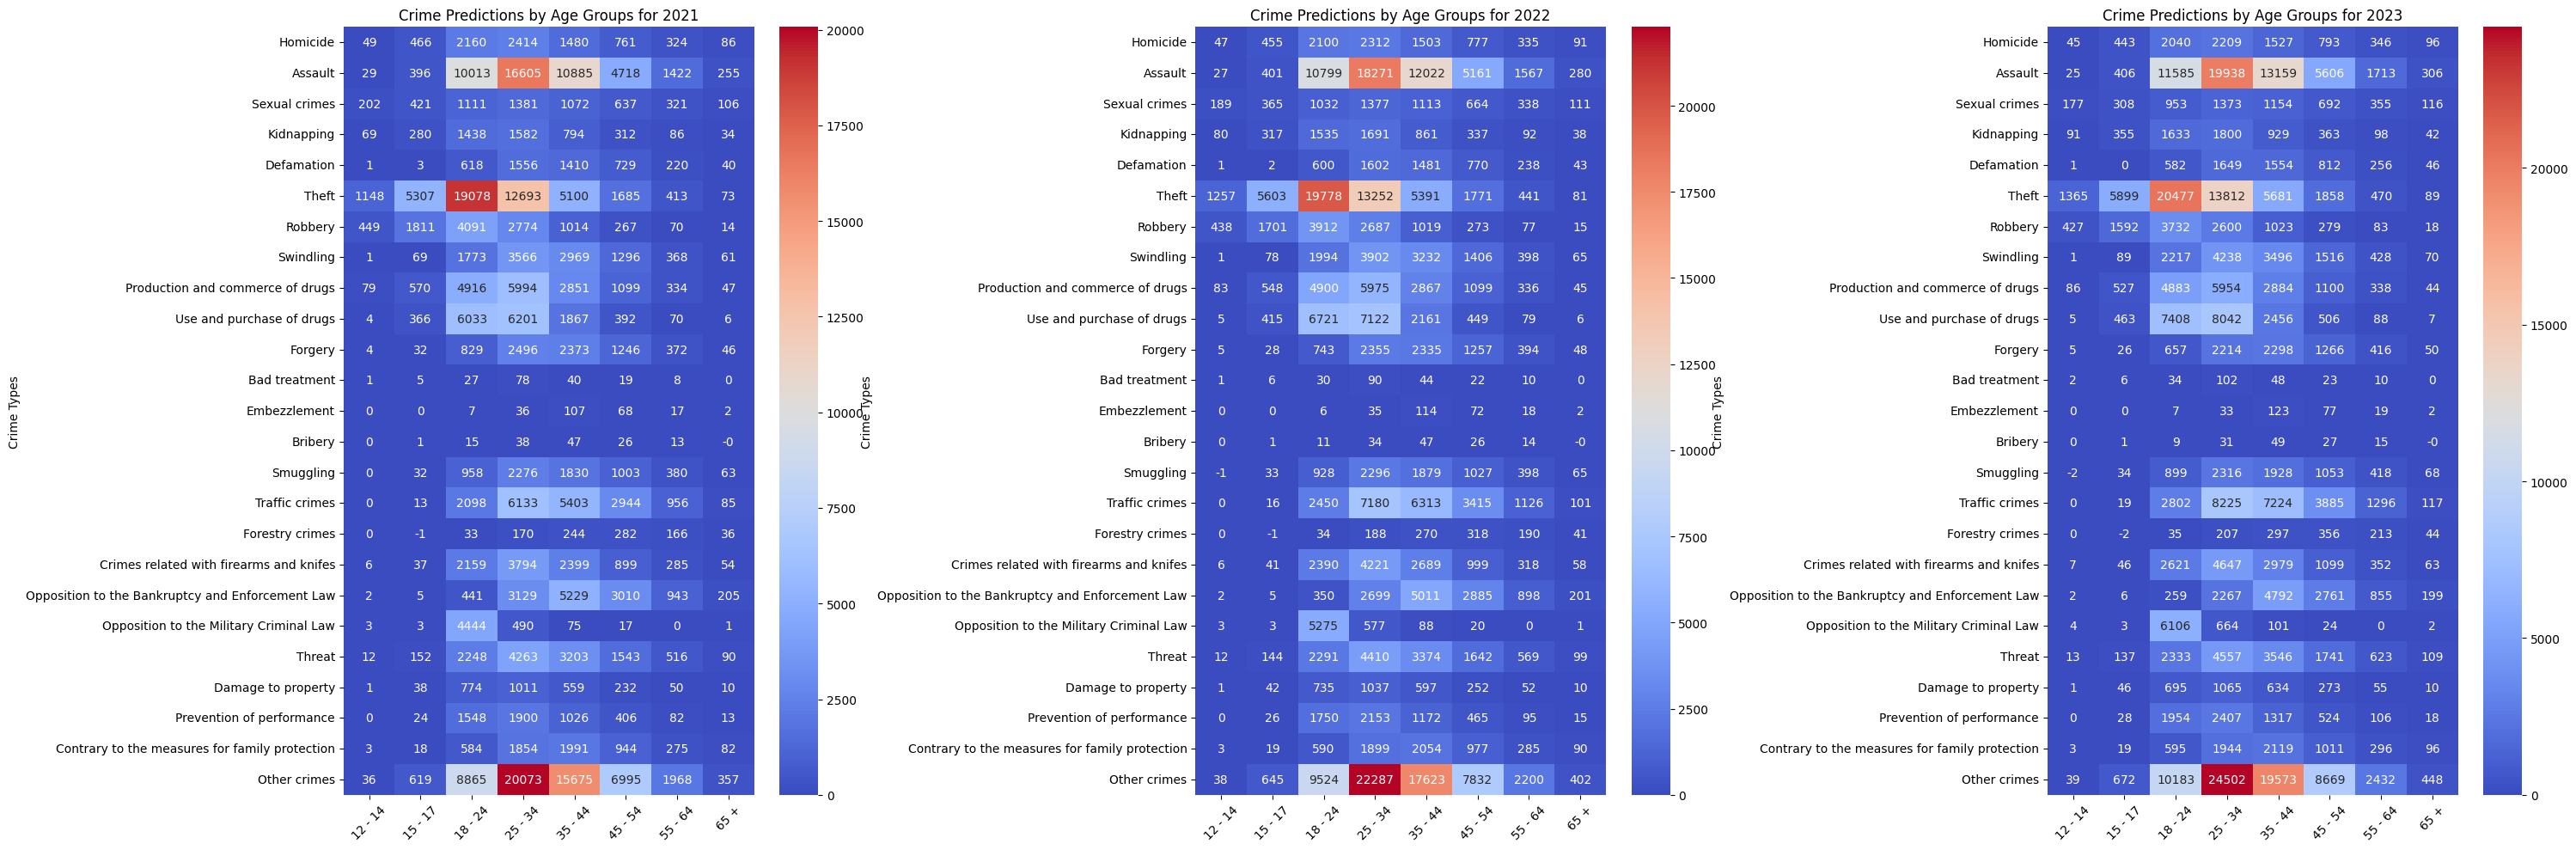

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, figsize=(30, 10))

# Set 'Crime Type' as index and drop the 'Total' row and 'Year' column
df2021_heatmap = df2021_prediction.set_index('Crime Type').drop(columns=['Year']).drop(['Total'])
# Set 'Crime Type' as index and drop the 'Total' row and 'Year' column
df2022_heatmap = df2022_prediction.set_index('Crime Type').drop(columns=['Year']).drop(['Total'])
# Set 'Crime Type' as index and drop the 'Total' row and 'Year' column
df2023_heatmap = df2023_prediction.set_index('Crime Type').drop(columns=['Year']).drop(['Total'])

dataframes = [df2021_heatmap, df2022_heatmap, df2023_heatmap]
years = [2021, 2022, 2023]

for i in range(3):
    df_heatmap = dataframes[i]
    
    sns.heatmap(combine_gender_cols(df_heatmap), annot=True, fmt=".0f", cmap='coolwarm', cbar=True, ax=axs[i])
    
    axs[i].set_title(f'Crime Predictions by Age Groups for {years[i]}')
    axs[i].set_ylabel('Crime Types')
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()     

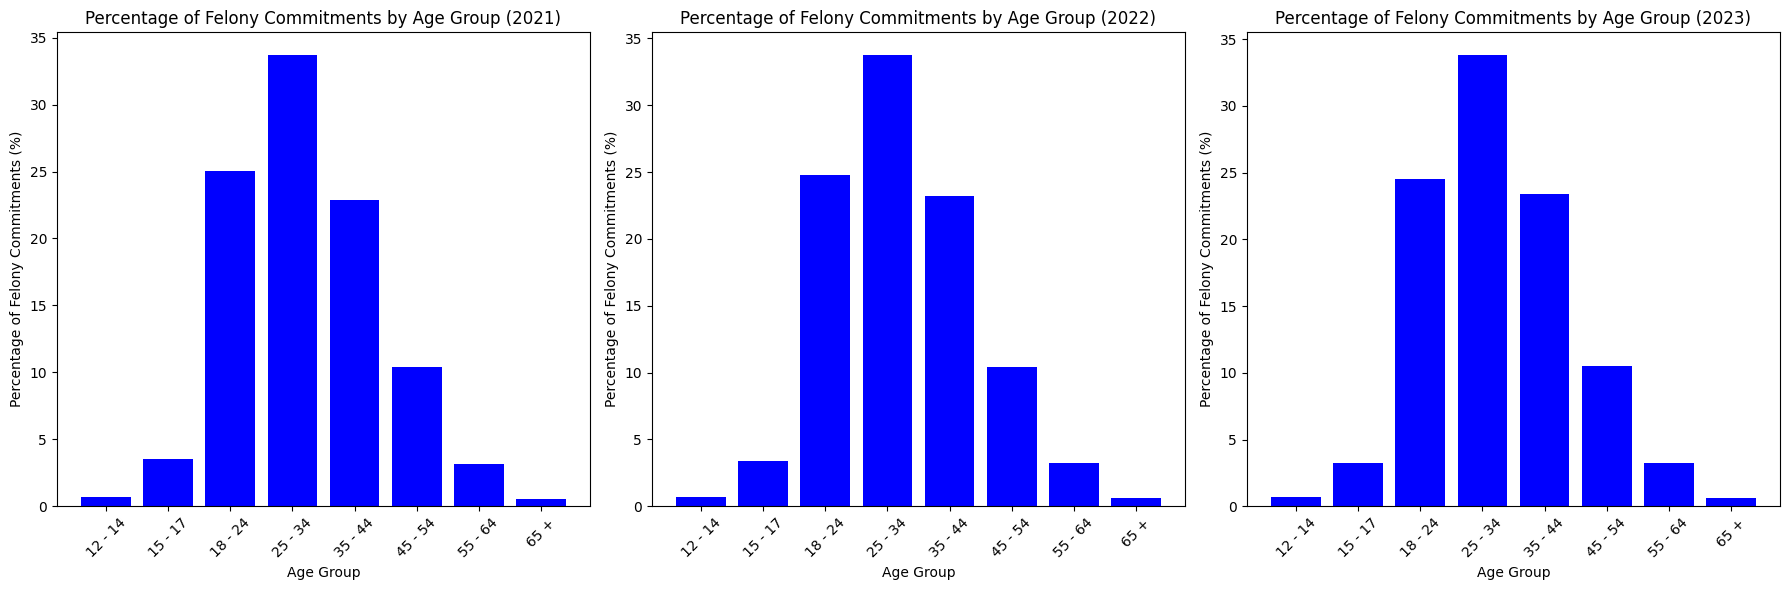

In [ ]:
df_list_prediction = [combine_gender_cols(df2021_prediction.set_index('Crime Type').drop(columns=['Year'])),
                      combine_gender_cols(df2022_prediction.set_index('Crime Type').drop(columns=['Year'])), 
                      combine_gender_cols(df2023_prediction.set_index('Crime Type').drop(columns=['Year']))]
years = [2021, 2022, 2023]

plt.figure(figsize=(18, 6))

for i in range(3):
    df_crime_plot = df_list_prediction[i]
    
    # Remove gender and total information from column names
    age_groups = df_crime_plot.columns
    
    # Calculate total crime count
    total_crimes = df_crime_plot.sum().sum()
    
    # Calculate the total crime per age group
    totals = df_crime_plot.sum()
    
    # Calculate percentages for each age group
    percentages = (totals / total_crimes) * 100
    
    plt.subplot(1, 3, i+1)
    plt.bar(age_groups, percentages, color='blue')
    plt.title(f'Percentage of Felony Commitments by Age Group ({years[i]})')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage of Felony Commitments (%)')
    plt.xticks(rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [ ]:

# Concatenate all dataframes
df_all_years_prediction = pd.concat(df_list_prediction)

# Keep only total crimes rows
df_total_predicted_felonies = df_all_years_prediction[df_all_years_prediction.index == 'Total']

# Now, compute the standard deviation for each age range across years
std_devs_prediction = df_total_predicted_felonies.std()
means_prediction = df_total_predicted_felonies.mean()

# Iterate over the age groups and print the results
for age_group, std_dev in std_devs_prediction.items():
    if not age_group == 'Year':
        mean = means_prediction.get(age_group)
        if mean is not None:
            print(f"Age group '{age_group}': \nPredicted Standard deviation of Felonies: {std_dev:.2f}, Predicted Mean of Felonies: {mean:.2f}\n")
        else:
            print(f"Age group '{age_group}': \bStandard deviation: {std_dev:.2f}")



Age group '12 - 14': 
Predicted Standard deviation of Felonies: 99.50, Predicted Mean of Felonies: 2185.67

Age group '15 - 17': 
Predicted Standard deviation of Felonies: 228.00, Predicted Mean of Felonies: 10878.00

Age group '18 - 24': 
Predicted Standard deviation of Felonies: 4222.00, Predicted Mean of Felonies: 80475.00

Age group '25 - 34': 
Predicted Standard deviation of Felonies: 7161.00, Predicted Mean of Felonies: 109717.00

Age group '35 - 44': 
Predicted Standard deviation of Felonies: 5639.50, Predicted Mean of Felonies: 75338.67

Age group '45 - 54': 
Predicted Standard deviation of Felonies: 2402.50, Predicted Mean of Felonies: 33961.33

Age group '55 - 64': 
Predicted Standard deviation of Felonies: 815.00, Predicted Mean of Felonies: 10474.00

Age group '65 +': 
Predicted Standard deviation of Felonies: 147.50, Predicted Mean of Felonies: 1899.33



In [ ]:
from sklearn.preprocessing import StandardScaler

df_cluster = df_all_year.loc[df_all_year["Crime Type"] !='Total']


df_crime_numeric = df_cluster.drop('Crime Type', axis=1)

# Normalize the data
scaler = StandardScaler()
df_crime_normalized = pd.DataFrame(scaler.fit_transform(df_crime_numeric), columns=df_crime_numeric.columns)


In [ ]:
from sklearn.cluster import KMeans

# Define the model
kmeans = KMeans(n_clusters=3)  # Choose the appropriate number of clusters

# Fit the model
kmeans.fit(df_crime_normalized)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df_cluster['Cluster'] = kmeans.labels_

<ipython-input-780-2abddd47933d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['Cluster'] = kmeans.labels_


In [ ]:
df_cluster_analysis = df_cluster.groupby('Cluster').mean()

<ipython-input-781-377d1f4bd1cb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_cluster_analysis = df_cluster.groupby('Cluster').mean()


In [ ]:
# Number of clusters
n_clusters = 3
# For each cluster number...
for i in range(n_clusters):
    # ...filter the dataframe by the current cluster number...
    cluster = df_cluster[df_cluster['Cluster'] == i]
    # ...get the unique crime types in this cluster
    crimes_in_cluster = cluster['Crime Type'].unique()
    
    print(f"Cluster {i} contains the following crimes:\n{crimes_in_cluster}\n")

Cluster 0 contains the following crimes:
['Homicide' 'Sexual crimes' 'Kidnapping' 'Defamation' 'Robbery'
 'Swindling' 'Production and commerce of drugs'
 'Use and purchase of drugs' 'Forgery' 'Bad treatment' 'Embezzlement'
 'Bribery' 'Smuggling' 'Traffic crimes' 'Forestry crimes'
 'Crimes related with firearms and knifes'
 'Opposition to the Military Criminal Law' 'Threat' 'Damage to property'
 'Prevention of performance'
 'Contrary to the measures for family protection']

Cluster 1 contains the following crimes:
['Assault' 'Opposition to the Bankruptcy and Enforcement Law'
 'Other crimes']

Cluster 2 contains the following crimes:
['Theft']



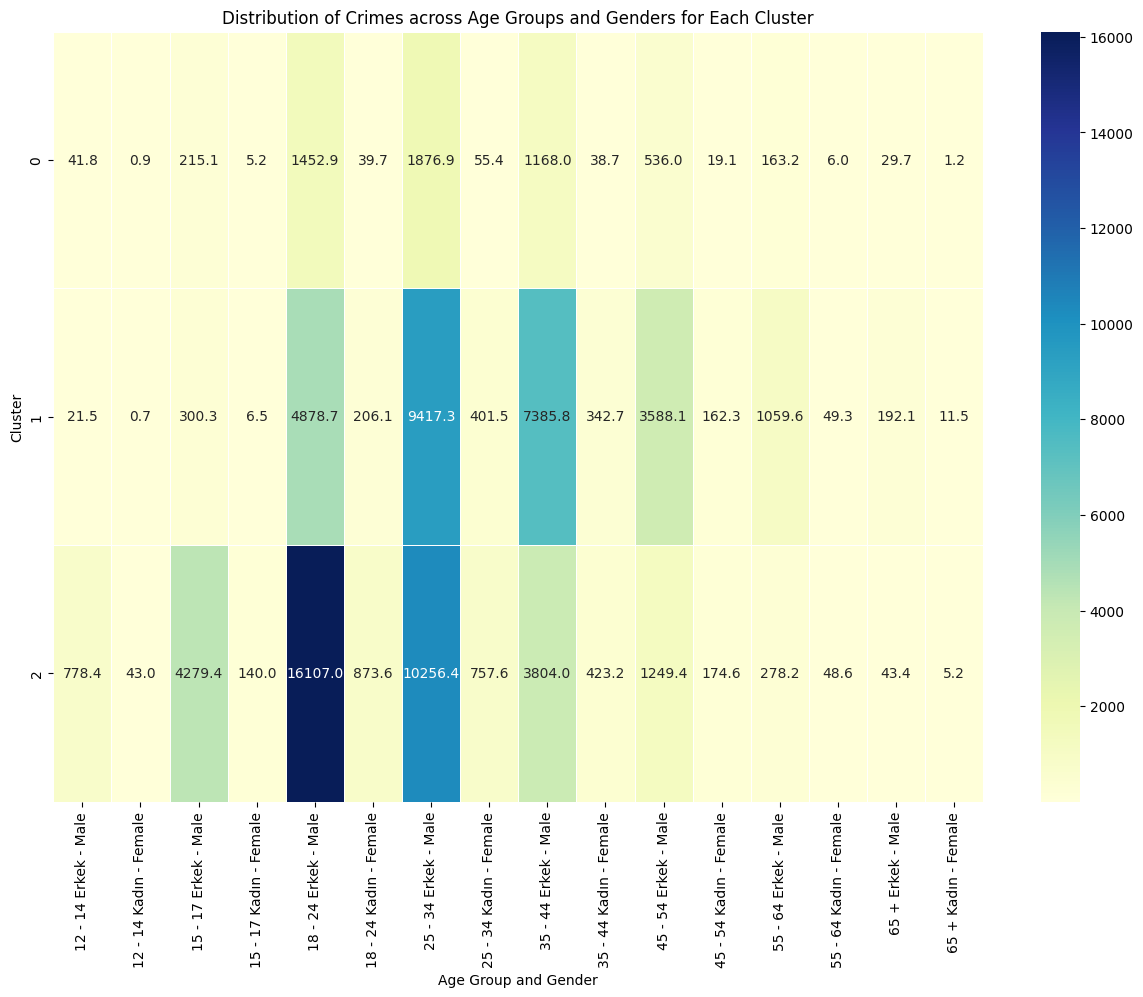

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Create a heatmap
sns.heatmap(df_cluster_analysis, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu")

# Set the title
plt.title('Distribution of Crimes across Age Groups and Genders for Each Cluster')

# Set x and y labels
plt.xlabel('Age Group and Gender')
plt.ylabel('Cluster')

plt.show()
